Last updated: 16 Feb 2023

# 👋 PyCaret Time Series Forecasting Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [615]:
# install pycaret
#!pip install pycaret[full]

# check installed version
import pycaret 
pycaret.__version__

'3.0.4'

# 🚀 Quick start

PyCaret's time series forecasting module is now available. The module currently is suitable for univariate / multivariate time series forecasting tasks. The API of time series module is consistent with other modules of PyCaret.

It comes built-in with preprocessing capabilities and over 30 algorithms comprising of statistical / time-series methods as well as machine learning based models. In addition to the model training, this module has lot of other capabilities such as automated hyperparameter tuning, ensembling, model analysis, model packaging and deployment capabilities. 

A typical workflow in PyCaret consist of following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model** <br/>

In [616]:
# import pandas module
import pandas as pd
import re
import numpy as np

# global variables
Soil_humi = []
Resistance = []
Soil_temp = []
total_amount = 0
rolling_mean_window_data = 15
rolling_mean_window_grouped = 5
min_length_df = 300 #was 50
slope_irrigation = -0.07
tension_threshold = 7
sample_rate = 60 #in min

# creating a data frame
data = pd.read_csv("binned_removed_new.csv",header=0)
data.head()

# create array with sensors strings
for col in data.columns:
    if re.findall(r"SoilHumiditySensor$", col):
        Soil_humi.append(col)
    elif re.findall(r"\/ $", col):
        Resistance.append(col)
    elif re.findall(r"SoilThermometer$", col):
        Soil_temp.append(col)

# print them to check
for i in range(len(Soil_humi)):
    total_amount += 1
    print(Soil_humi[i])
for i in range(len(Resistance)):
    total_amount += 1
    print(Resistance[i])
for i in range(len(Soil_temp)):
    total_amount += 1
    print(Soil_temp[i])
    
print("Total amount of values: ", total_amount)

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor
638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor
638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor
638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance / 
638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance / 
638de57568f31919048f189f; 63932c3668f319085df375ad / B4_solar_x1_03; Resistance / 
638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer
638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilThermometer
Total amount of values:  8


<Axes: >

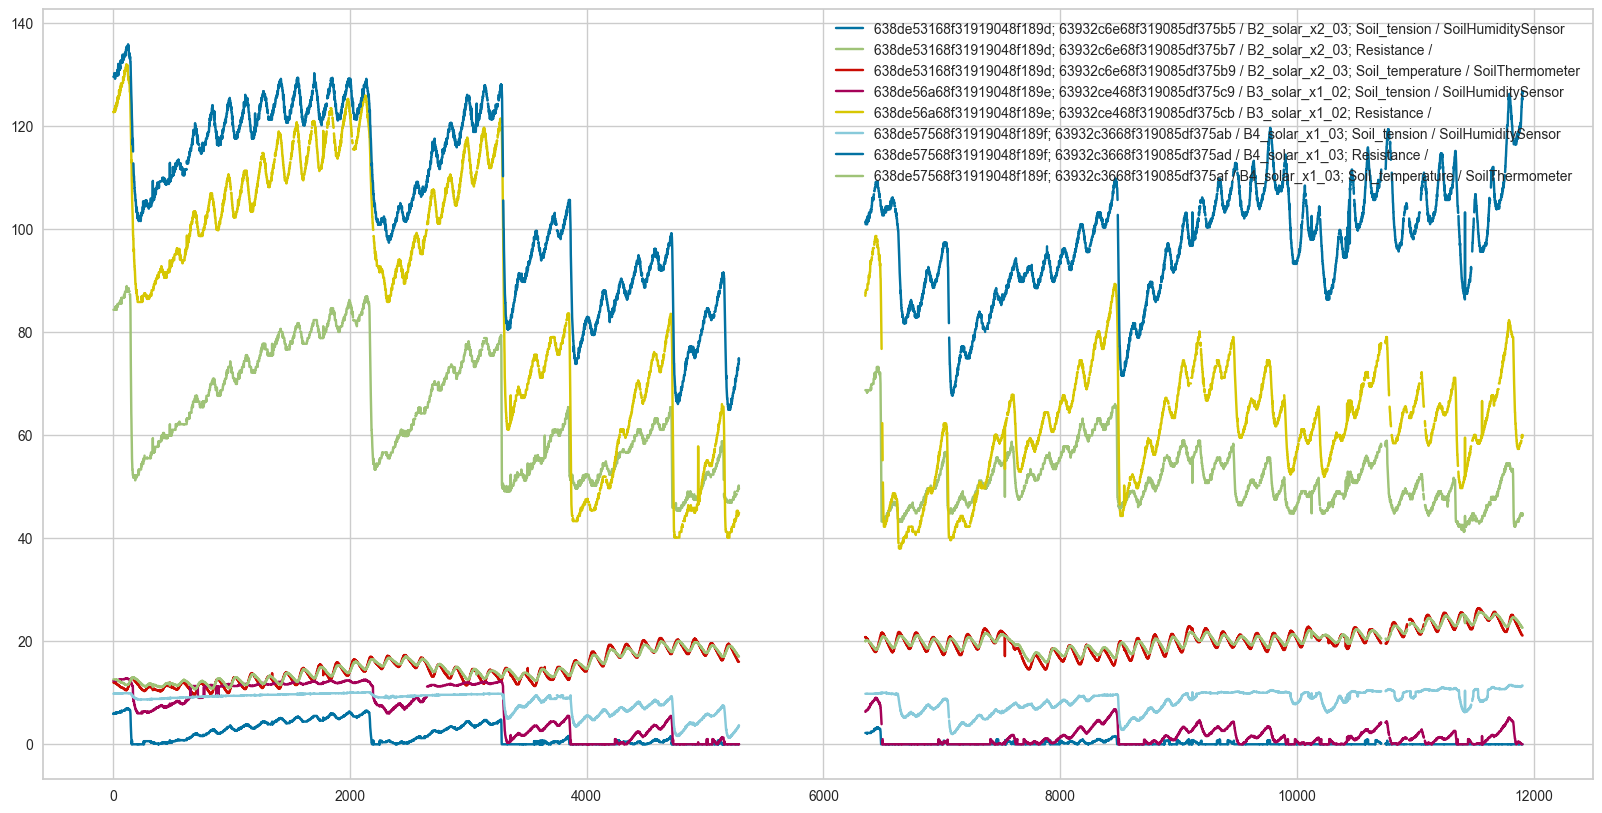

In [617]:
# plot the dataset
data.plot(figsize = (20,10))

In [618]:
# Show if there are any missing values inside the data
data.isna().any()

Time                                                                                                       False
638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor      True
638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /                           True
638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer     True
638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor      True
638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /                           True
638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor      True
638de57568f31919048f189f; 63932c3668f319085df375ad / B4_solar_x1_03; Resistance /                           True
638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilTher

array([<Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>], dtype=object)

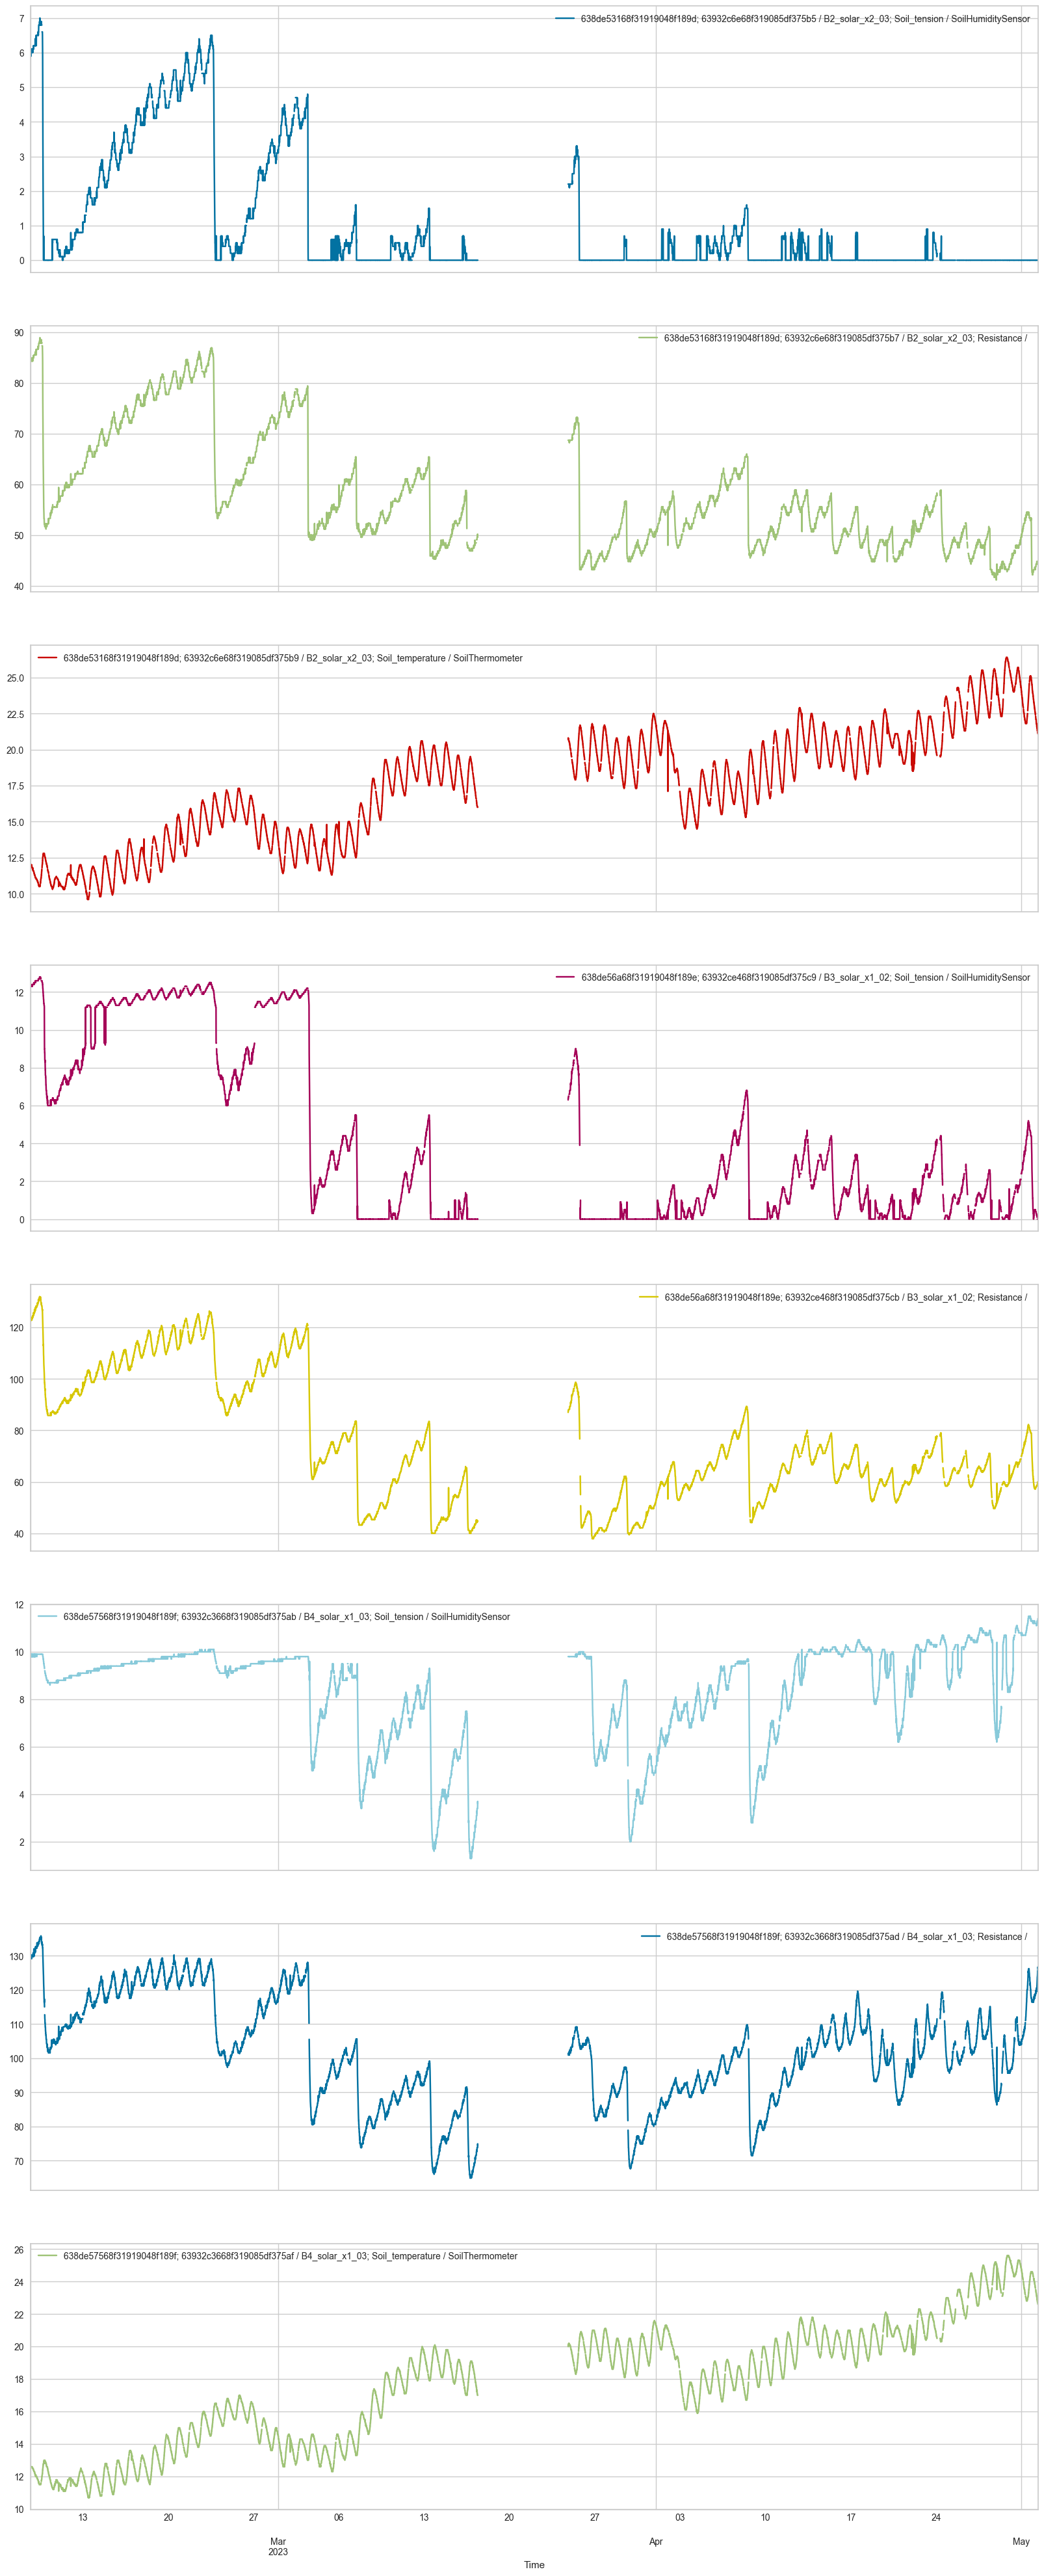

In [619]:
data['Time'] = data['Time'].str[:-9]
data['Time']=pd.to_datetime(data['Time'])
data = data.set_index('Time')

data.plot(subplots=True, figsize=(20,50))

In [620]:
data.loc['2023-03-24 22:00:00':]

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor  \
Time                                                                                                                          
2023-03-24 22:00:00                                                2.2                                                        
2023-03-24 22:10:00                                                2.1                                                        
2023-03-24 22:20:00                                                2.2                                                        
2023-03-24 22:30:00                                                2.2                                                        
2023-03-24 22:40:00                                                2.2                                                        
...                                                                ...                                                        
2023-05-02 08:20:00                                                0.0                                                        
2023-05-02 08:30:00                                                0.0                                                        
2023-05-02 08:40:00                                                0.0                                                        
2023-05-02 08:50:00                                                0.0                                                        
2023-05-02 09:00:00                                                0.0                                                        

                     638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /   \
Time                                                                                                      
2023-03-24 22:00:00                                               68.7                                    
2023-03-24 22:10:00                                               68.3                                    
2023-03-24 22:20:00                                               68.7                                    
2023-03-24 22:30:00                                               68.7                                    
2023-03-24 22:40:00                                               68.7                                    
...                                                                ...                                    
2023-05-02 08:20:00                                               44.8                                    
2023-05-02 08:30:00                                               44.8                                    
2023-05-02 08:40:00                                               44.3                                    
2023-05-02 08:50:00                                               44.8                                    
2023-05-02 09:00:00                                               44.8                                    

                     638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer  \
Time                                                                                                                           
2023-03-24 22:00:00                                               20.5                                                         
2023-03-24 22:10:00                                               20.5                                                         
2023-03-24 22:20:00                                               20.4                                                         
2023-03-24 22:30:00                                               20.4                                                         
2023-03-24 22:40:00                                               20.4                                                         
...                                                                ...           

array([<Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>], dtype=object)

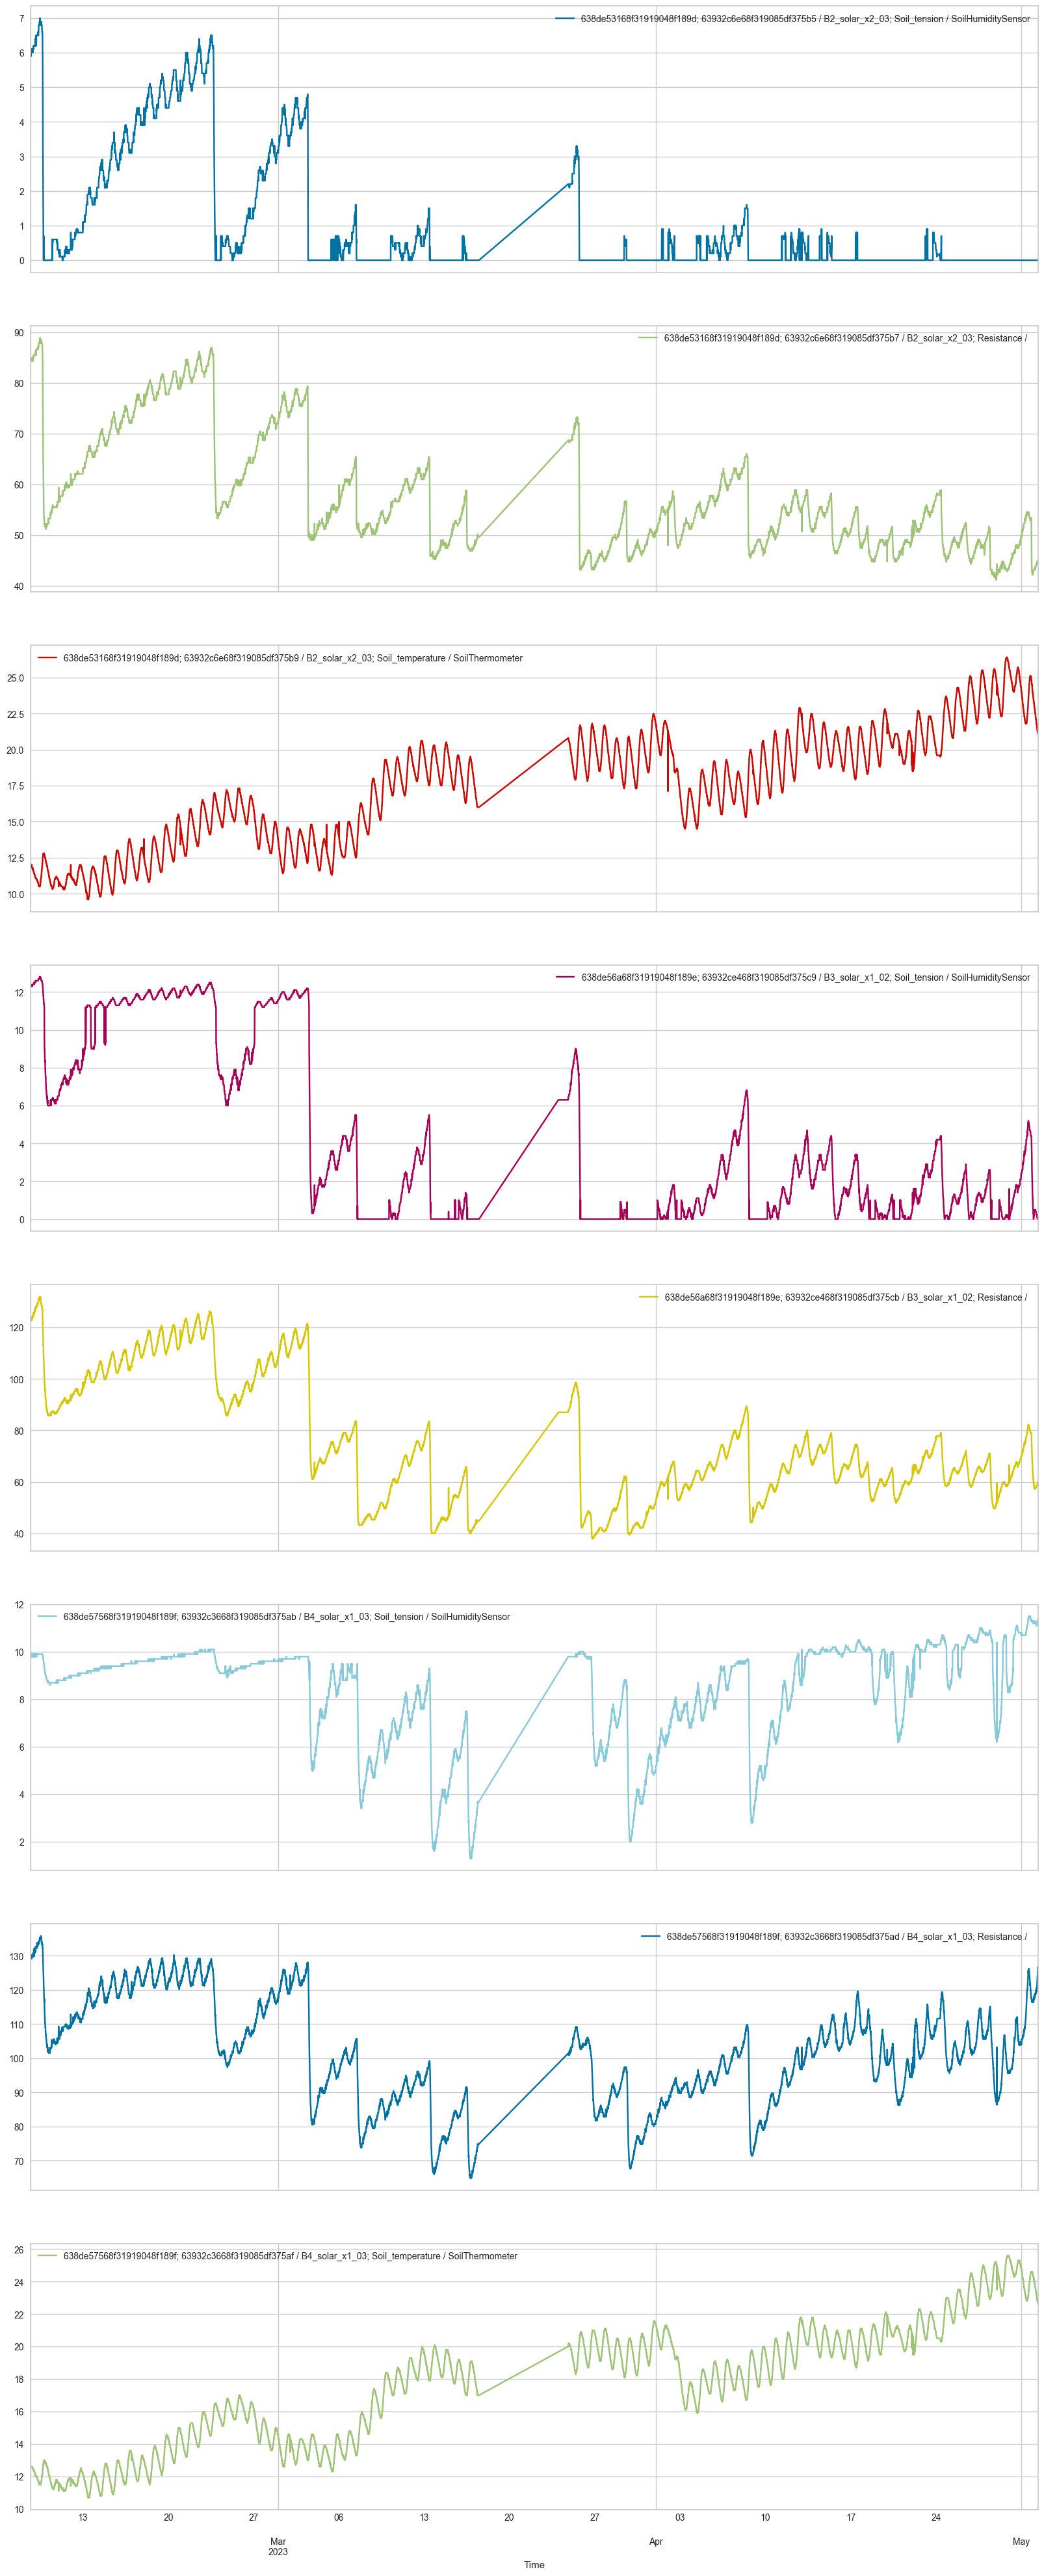

In [621]:
#data = data.fillna(method = 'bfill')
data = data.interpolate(method='linear')
data.plot(subplots=True, figsize=(20,50))

In [622]:
# resample using timespan of 30min -> hopefully reduces overfitting
if sample_rate != 10:
    data_re = data.resample(str(sample_rate)+'T').median()
    data = data_re

In [623]:
data.head()

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor  \
Time                                                                                                                          
2023-02-08 16:00:00                                               5.90                                                        
2023-02-08 17:00:00                                               6.00                                                        
2023-02-08 18:00:00                                               6.00                                                        
2023-02-08 19:00:00                                               6.05                                                        
2023-02-08 20:00:00                                               6.00                                                        

                     638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /   \
Time                                                                                                      
2023-02-08 16:00:00                                              84.30                                    
2023-02-08 17:00:00                                              84.30                                    
2023-02-08 18:00:00                                              84.30                                    
2023-02-08 19:00:00                                              84.55                                    
2023-02-08 20:00:00                                              84.30                                    

                     638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer  \
Time                                                                                                                           
2023-02-08 16:00:00                                              12.00                                                         
2023-02-08 17:00:00                                              12.00                                                         
2023-02-08 18:00:00                                              12.00                                                         
2023-02-08 19:00:00                                              11.85                                                         
2023-02-08 20:00:00                                              11.80                                                         

                     638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor  \
Time                                                                                                                          
2023-02-08 16:00:00                                              12.30                                                        
2023-02-08 17:00:00                                              12.30                                                        
2023-02-08 18:00:00                                              12.30                                                        
2023-02-08 19:00:00                                              12.30                                                        
2023-02-08 20:00:00                                              12.35                                                        

                     638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /   \
Time                                                                                                      
2023-02-08 16:00:00                                             122.70                                    
2023-02-08 17:00:00                                             122.70                                    
2023-02-08 18:00:00                                             122.75                                    
2023-02-08 19:00:00                                        

## Weather data from station on site

In [451]:
# creating a data frame
data_weather = pd.read_csv("april_weather.csv", header=0, sep=";")
data_weather.head()

NO.                 Heure  Intervalle  Température intérieure(°C)  \
0    1   01/04/2023 00:03:43           5                        15.6   
1    2   01/04/2023 00:08:43           5                        15.6   
2    3   01/04/2023 00:13:43           5                        15.5   
3    4   01/04/2023 00:18:43           5                        15.5   
4    5   01/04/2023 00:23:43           5                        15.5   

   Humidité intérieure(%) Température extérieure(°C) Humidité extérieure(%)  \
0                      41                       10.2                     58   
1                      41                       10.3                     58   
2                      40                       10.4                     55   
3                      40                       10.3                     54   
4                      40                       10.3                     54   

   Pression relative(hpa)  Pression absolue(hpa) Vitesse du vent(km/h)  ...  \
0                  1015.6                  953.3                   2.5  ...   
1                  1015.5                  953.2                   3.6  ...   
2                  1015.5                  953.2                   2.5  ...   
3                  1015.6                  953.3                   3.6  ...   
4                  1015.5                  953.2                   3.6  ...   

  Direction du vent Point de rosée(°C) Facteur vent(°C)  \
0                 W                2.3             10.2   
1                NW                2.4             10.3   
2                 W                1.8             10.4   
3                 W                1.4             10.3   
4                NW                1.4             10.3   

  Précipitations dernière heure(mm)  Précipitations dernières 24 h(mm)  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                0.0   

   Précipitations de la semaine(mm)  Précipitations du mois(mm)  \
0                               7.5                         0.0   
1                               7.5                         0.0   
2                               7.5                         0.0   
3                               7.5                         0.0   
4                               7.5                         0.0   

   Précipitations totales(mm)  Lumière(lux) UVI  
0                        14.4           0.0   0  
1                        14.4           0.0   0  
2                        14.4           0.0   0  
3                        14.4           0.0   0  
4                        14.4           0.0   0  

[5 rows x 21 columns]

In [452]:
# Convert the datetime column to a datetime object
data_weather['Heure'] = pd.to_datetime(data_weather['Heure'], format=' %d/%m/%Y %H:%M:%S')#, errors='coerce')
#print("After datetime, before ISO:  \n", data_weather, "\n", data_weather.dtypes, "\n")

# Format the datetime object as an ISO time string
data_weather['Heure'] = data_weather['Heure'].dt.strftime('%Y-%m-%dT%H:%M:%S')

#change name
data_weather = data_weather.rename(columns={'Heure':'Time'})

# change datatype
data_weather['Time'] = pd.to_datetime(data_weather['Time'])

# set the index of the DataFrame to the timestamp column
data_weather = data_weather.set_index('Time')

In [453]:
# Drop useless
data_weather = data_weather.drop(['Température intérieure(°C)', 'Humidité intérieure(%)', 'Intervalle', 'NO.', 'Pression relative(hpa)', 'Rafale(km/h)', 'Point de rosée(°C)', 'UVI'], axis=1)#, 'Précipitations dernière heure(mm)', 'Précipitations de la semaine(mm)', 'Précipitations du mois(mm)', 'Précipitations totales(mm)'], axis=1)

Wenn es darum geht, den nächsten Bewässerungszeitpunkt für ein Feld im Freien vorherzusagen, kann die Einbeziehung des relativen Luftdrucks sinnvoller sein. Hier sind einige Gründe:

Wettervorhersage: Der relative Luftdruck ist ein wichtiger Faktor bei der Wettervorhersage und wird häufig in Wetterberichten und -vorhersagen verwendet. Er kann Ihnen helfen, Veränderungen in den atmosphärischen Bedingungen zu erkennen, die auf Wetteränderungen hindeuten könnten. Dies kann bei der Entscheidung für den Bewässerungszeitpunkt hilfreich sein, da bestimmte Wetterbedingungen die Bewässerungsanforderungen beeinflussen können.

Einfluss auf Pflanzen: Veränderungen im Luftdruck können auch Auswirkungen auf Pflanzen haben. Beispielsweise kann ein plötzlicher Anstieg oder Abfall des Luftdrucks auf Wetteränderungen wie Stürme oder Wetterfronten hinweisen. Solche Veränderungen können den Wasserbedarf der Pflanzen beeinflussen und somit den optimalen Bewässerungszeitpunkt beeinflussen.

Kombination mit anderen Daten: Der relative Luftdruck kann auch mit anderen Umweltdaten wie Temperatur, Luftfeuchtigkeit und Niederschlag kombiniert werden, um ein umfassenderes Bild der atmosphärischen Bedingungen zu erhalten. Dies kann zur Verbesserung der Vorhersage des Bewässerungszeitpunkts beitragen.

----------------------------------------
Bei der Auswahl der Niederschlagsmessungen für Ihr Training könnten Sie sich auf eine oder mehrere Messungen konzentrieren, die am besten zu Ihrem Anwendungsfall passen. Hier sind einige Optionen, die Sie in Betracht ziehen könnten:

Précipitations dernière heure (Niederschlag der letzten Stunde): Diese Messung könnte relevant sein, um den aktuellen Niederschlag zu berücksichtigen und möglicherweise kurzfristige Änderungen im Bewässerungsbedarf zu erkennen. Wenn Sie jedoch andere Messungen bevorzugen, die eine längere Zeitspanne abdecken, könnten Sie diese ausschließen.

Précipitations dernières 24 h (Niederschlag der letzten 24 Stunden): Dies ist eine gängige und relevante Messung für den Bewässerungsbedarf. Sie gibt Auskunft über den Niederschlag in den letzten 24 Stunden und ermöglicht eine Einschätzung des längerfristigen Feuchtigkeitszustands des Bodens.

Précipitations de la semaine (Niederschlag der letzten Woche): Diese Messung könnte interessant sein, um den kumulierten Niederschlag über die Woche hinweg zu berücksichtigen. Sie kann helfen, den längerfristigen Feuchtigkeitsverlauf zu verstehen und den Bewässerungsbedarf anzupassen.

Précipitations du mois (Niederschlag des aktuellen Monats): Wenn Sie den Niederschlag über einen längeren Zeitraum betrachten möchten, kann diese Messung nützlich sein. Sie kann Ihnen helfen, den saisonalen Feuchtigkeitsverlauf zu verstehen und den Bewässerungsbedarf entsprechend anzupassen.

Précipitations totales (Gesamtniederschlag): Diese Messung erfasst den kumulierten Niederschlag über einen längeren Zeitraum, möglicherweise seit Beginn der Datenerfassung. Sie kann nützlich sein, um den historischen Niederschlagstrend zu berücksichtigen und mögliche Muster im Bewässerungsbedarf zu identifizieren.

In Bezug auf das Training könnten Sie entweder eine einzelne Niederschlagsmessung auswählen, die am besten zu Ihrem Anwendungsfall passt, oder verschiedene Kombinationen von Messungen ausprobieren, um ihre Auswirkungen auf die Vorhersageleistung des Modells zu bewerten. Es kann hilfreich sein, verschiedene Konfigurationen zu testen und die beste Auswahl basierend auf den Bewertungsmetriken des Modells zu treffen.






In [454]:
data_weather.head()

Température extérieure(°C) Humidité extérieure(%)  \
Time                                                                    
2023-04-01 00:03:43                       10.2                     58   
2023-04-01 00:08:43                       10.3                     58   
2023-04-01 00:13:43                       10.4                     55   
2023-04-01 00:18:43                       10.3                     54   
2023-04-01 00:23:43                       10.3                     54   

                     Pression absolue(hpa) Vitesse du vent(km/h)  \
Time                                                               
2023-04-01 00:03:43                  953.3                   2.5   
2023-04-01 00:08:43                  953.2                   3.6   
2023-04-01 00:13:43                  953.2                   2.5   
2023-04-01 00:18:43                  953.3                   3.6   
2023-04-01 00:23:43                  953.2                   3.6   

                    Direction du vent Facteur vent(°C)  \
Time                                                     
2023-04-01 00:03:43                 W             10.2   
2023-04-01 00:08:43                NW             10.3   
2023-04-01 00:13:43                 W             10.4   
2023-04-01 00:18:43                 W             10.3   
2023-04-01 00:23:43                NW             10.3   

                     Précipitations dernière heure(mm)  \
Time                                                     
2023-04-01 00:03:43                                0.0   
2023-04-01 00:08:43                                0.0   
2023-04-01 00:13:43                                0.0   
2023-04-01 00:18:43                                0.0   
2023-04-01 00:23:43                                0.0   

                     Précipitations dernières 24 h(mm)  \
Time                                                     
2023-04-01 00:03:43                                0.0   
2023-04-01 00:08:43                                0.0   
2023-04-01 00:13:43                                0.0   
2023-04-01 00:18:43                                0.0   
2023-04-01 00:23:43                                0.0   

                     Précipitations de la semaine(mm)  \
Time                                                    
2023-04-01 00:03:43                               7.5   
2023-04-01 00:08:43                               7.5   
2023-04-01 00:13:43                               7.5   
2023-04-01 00:18:43                               7.5   
2023-04-01 00:23:43                               7.5   

                     Précipitations du mois(mm)  Précipitations totales(mm)  \
Time                                                                          
2023-04-01 00:03:43                         0.0                        14.4   
2023-04-01 00:08:43                         0.0                        14.4   
2023-04-01 00:13:43                         0.0                        14.4   
2023-04-01 00:18:43                         0.0                        14.4   
2023-04-01 00:23:43                         0.0                        14.4   

                    Lumière(lux)  
Time                              
2023-04-01 00:03:43          0.0  
2023-04-01 00:08:43          0.0  
2023-04-01 00:13:43          0.0  
2023-04-01 00:18:43          0.0  
2023-04-01 00:23:43          0.0

In [455]:
# Convert wind direction to integer
directions = [" N", " NNE", " NE", " ENE", " E", " ESE", " SE", " SSE", " S", " SSW", " SW", " WSW", " W", " WNW", " NW", " NNW"]
target_col = 'Direction du vent'

for index, value in data_weather[target_col].iteritems():
    # Calculate wind direction in degrees -> TODO : convert to int and round
    if value == " ---":
        data_weather[target_col][index] = np.nan
    else:
        data_weather[target_col][index] = directions.index(value) * 22.5
        
data_weather[target_col] = data_weather[target_col].astype("float64")

In [456]:
# convert to float64
def convert_cols(data,ref_dtype):
    obj_dtype = 'object'
    
    for col in data.columns:
        if data[col].dtype == obj_dtype:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        print("This is :",col, "it has the following dtype: ", data[col].dtype)

convert_cols(data_weather, 'float64')

This is : Température extérieure(°C) it has the following dtype:  float64
This is : Humidité extérieure(%) it has the following dtype:  float64
This is : Pression absolue(hpa) it has the following dtype:  float64
This is : Vitesse du vent(km/h) it has the following dtype:  float64
This is : Direction du vent it has the following dtype:  float64
This is : Facteur vent(°C) it has the following dtype:  float64
This is : Précipitations dernière heure(mm) it has the following dtype:  float64
This is : Précipitations dernières 24 h(mm) it has the following dtype:  float64
This is : Précipitations de la semaine(mm) it has the following dtype:  float64
This is : Précipitations du mois(mm) it has the following dtype:  float64
This is : Précipitations totales(mm) it has the following dtype:  float64
This is : Lumière(lux) it has the following dtype:  float64


In [457]:
# preserve old datetimeindex
timestamps = data_weather.index
data_weather.reset_index(drop=True)

Température extérieure(°C)  Humidité extérieure(%)  \
0                           10.2                    58.0   
1                           10.3                    58.0   
2                           10.4                    55.0   
3                           10.3                    54.0   
4                           10.3                    54.0   
...                          ...                     ...   
1855                        28.8                    30.0   
1856                        24.0                    59.0   
1857                        19.9                    80.0   
1858                        20.1                    74.0   
1859                        17.4                    73.0   

      Pression absolue(hpa)  Vitesse du vent(km/h)  Direction du vent  \
0                     953.3                    2.5              270.0   
1                     953.2                    3.6              315.0   
2                     953.2                    2.5              270.0   
3                     953.3                    3.6              270.0   
4                     953.2                    3.6              315.0   
...                     ...                    ...                ...   
1855                  946.2                    3.6              225.0   
1856                  946.3                    9.7               90.0   
1857                  947.4                    0.0              315.0   
1858                  949.0                    1.1                0.0   
1859                  949.8                   11.2                0.0   

      Facteur vent(°C)  Précipitations dernière heure(mm)  \
0                 10.2                                0.0   
1                 10.3                                0.0   
2                 10.4                                0.0   
3                 10.3                                0.0   
4                 10.3                                0.0   
...                ...                                ...   
1855              28.8                                0.0   
1856              23.0                                1.2   
1857              19.9                                0.9   
1858              20.1                                0.0   
1859              15.2                                0.0   

      Précipitations dernières 24 h(mm)  Précipitations de la semaine(mm)  \
0                                   0.0                               7.5   
1                                   0.0                               7.5   
2                                   0.0                               7.5   
3                                   0.0                               7.5   
4                                   0.0                               7.5   
...                                 ...                               ...   
1855                                0.3                               0.3   
1856                                1.5                               1.5   
1857                                2.4                               2.4   
1858                                2.4                               2.4   
1859                                2.4                               2.4   

      Précipitations du mois(mm)  Précipitations totales(mm)  Lumière(lux)  
0                            0.0                        14.4           0.0  
1                            0.0                        14.4           0.0  
2                            0.0                        14.4           0.0  
3                            0.0                        14.4           0.0  
4                            0.0                        14.4           0.0  
...                          ...                         ...           ...  
1855                         0.3                        14.7       47827.6  
1856                         1.5                        15.9       30108.6  
1857                         2.4                        1

In [458]:
# TODO: compare them with orig data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Init the transformer
reg_imp = IterativeImputer(estimator=Ridge())

# Fit/transform
data_weather = pd.DataFrame(reg_imp.fit_transform(data_weather), columns=data_weather.columns)

# restore old index
data_weather['Time'] = timestamps
data_weather = data_weather.set_index('Time')
data_weather.index = pd.to_datetime(data_weather.index)

In [459]:
#ref_dtype = 'float64'
# iterate through the columns and compare their data types to the reference data type
#for col in data_weather.columns:
#    print("This is :",col)
#    if data_weather[col].dtype == 'datetime64[ns]':
#        data_weather[col] = data_weather[col].resample('10T').ffill()
#    if data_weather[col].dtype == ref_dtype:
#        data_weather[col] = data_weather[col].resample('10T').mean()
#    else:
#        data_weather[col] = data_weather[col].resample('10T').ffill()

In [460]:
data_weather.head()

Température extérieure(°C)  Humidité extérieure(%)  \
Time                                                                      
2023-04-01 00:03:43                        10.2                    58.0   
2023-04-01 00:08:43                        10.3                    58.0   
2023-04-01 00:13:43                        10.4                    55.0   
2023-04-01 00:18:43                        10.3                    54.0   
2023-04-01 00:23:43                        10.3                    54.0   

                     Pression absolue(hpa)  Vitesse du vent(km/h)  \
Time                                                                
2023-04-01 00:03:43                  953.3                    2.5   
2023-04-01 00:08:43                  953.2                    3.6   
2023-04-01 00:13:43                  953.2                    2.5   
2023-04-01 00:18:43                  953.3                    3.6   
2023-04-01 00:23:43                  953.2                    3.6   

                     Direction du vent  Facteur vent(°C)  \
Time                                                       
2023-04-01 00:03:43              270.0              10.2   
2023-04-01 00:08:43              315.0              10.3   
2023-04-01 00:13:43              270.0              10.4   
2023-04-01 00:18:43              270.0              10.3   
2023-04-01 00:23:43              315.0              10.3   

                     Précipitations dernière heure(mm)  \
Time                                                     
2023-04-01 00:03:43                                0.0   
2023-04-01 00:08:43                                0.0   
2023-04-01 00:13:43                                0.0   
2023-04-01 00:18:43                                0.0   
2023-04-01 00:23:43                                0.0   

                     Précipitations dernières 24 h(mm)  \
Time                                                     
2023-04-01 00:03:43                                0.0   
2023-04-01 00:08:43                                0.0   
2023-04-01 00:13:43                                0.0   
2023-04-01 00:18:43                                0.0   
2023-04-01 00:23:43                                0.0   

                     Précipitations de la semaine(mm)  \
Time                                                    
2023-04-01 00:03:43                               7.5   
2023-04-01 00:08:43                               7.5   
2023-04-01 00:13:43                               7.5   
2023-04-01 00:18:43                               7.5   
2023-04-01 00:23:43                               7.5   

                     Précipitations du mois(mm)  Précipitations totales(mm)  \
Time                                                                          
2023-04-01 00:03:43                         0.0                        14.4   
2023-04-01 00:08:43                         0.0                        14.4   
2023-04-01 00:13:43                         0.0                        14.4   
2023-04-01 00:18:43                         0.0                        14.4   
2023-04-01 00:23:43                         0.0                        14.4   

                     Lumière(lux)  
Time                               
2023-04-01 00:03:43           0.0  
2023-04-01 00:08:43           0.0  
2023-04-01 00:13:43           0.0  
2023-04-01 00:18:43           0.0  
2023-04-01 00:23:43           0.0

In [461]:
data_weather_re = data_weather.resample('10T').fillna(method = 'bfill') #TODO: fill with mean!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
data_weather_re.index

DatetimeIndex(['2023-04-01 00:00:00', '2023-04-01 00:10:00',
               '2023-04-01 00:20:00', '2023-04-01 00:30:00',
               '2023-04-01 00:40:00', '2023-04-01 00:50:00',
               '2023-04-01 01:00:00', '2023-04-01 01:10:00',
               '2023-04-01 01:20:00', '2023-04-01 01:30:00',
               ...
               '2023-04-30 21:20:00', '2023-04-30 21:30:00',
               '2023-04-30 21:40:00', '2023-04-30 21:50:00',
               '2023-04-30 22:00:00', '2023-04-30 22:10:00',
               '2023-04-30 22:20:00', '2023-04-30 22:30:00',
               '2023-04-30 22:40:00', '2023-04-30 22:50:00'],
              dtype='datetime64[ns]', name='Time', length=4314, freq='10T')

In [462]:
data_weather_re.head(10)

Température extérieure(°C)  Humidité extérieure(%)  \
Time                                                                      
2023-04-01 00:00:00                        10.2                    58.0   
2023-04-01 00:10:00                        10.4                    55.0   
2023-04-01 00:20:00                        10.3                    54.0   
2023-04-01 00:30:00                        10.4                    54.0   
2023-04-01 00:40:00                        10.4                    53.0   
2023-04-01 00:50:00                        10.3                    53.0   
2023-04-01 01:00:00                        10.3                    53.0   
2023-04-01 01:10:00                        10.5                    53.0   
2023-04-01 01:20:00                        10.7                    52.0   
2023-04-01 01:30:00                        10.7                    51.0   

                     Pression absolue(hpa)  Vitesse du vent(km/h)  \
Time                                                                
2023-04-01 00:00:00                  953.3                    2.5   
2023-04-01 00:10:00                  953.2                    2.5   
2023-04-01 00:20:00                  953.2                    3.6   
2023-04-01 00:30:00                  953.3                    5.0   
2023-04-01 00:40:00                  953.3                    2.5   
2023-04-01 00:50:00                  953.2                    3.6   
2023-04-01 01:00:00                  953.2                    5.0   
2023-04-01 01:10:00                  953.3                    3.6   
2023-04-01 01:20:00                  953.1                    3.6   
2023-04-01 01:30:00                  953.0                    2.5   

                     Direction du vent  Facteur vent(°C)  \
Time                                                       
2023-04-01 00:00:00              270.0              10.2   
2023-04-01 00:10:00              270.0              10.4   
2023-04-01 00:20:00              315.0              10.3   
2023-04-01 00:30:00              270.0              10.4   
2023-04-01 00:40:00              315.0              10.4   
2023-04-01 00:50:00              247.5              10.3   
2023-04-01 01:00:00              315.0              10.3   
2023-04-01 01:10:00              225.0              10.5   
2023-04-01 01:20:00              270.0              10.7   
2023-04-01 01:30:00              315.0              10.7   

                     Précipitations dernière heure(mm)  \
Time                                                     
2023-04-01 00:00:00                                0.0   
2023-04-01 00:10:00                                0.0   
2023-04-01 00:20:00                                0.0   
2023-04-01 00:30:00                                0.0   
2023-04-01 00:40:00                                0.0   
2023-04-01 00:50:00                                0.0   
2023-04-01 01:00:00                                0.0   
2023-04-01 01:10:00                                0.0   
2023-04-01 01:20:00                                0.0   
2023-04-01 01:30:00                                0.0   

                     Précipitations dernières 24 h(mm)  \
Time                                                     
2023-04-01 00:00:00                                0.0   
2023-04-01 00:10:00                                0.0   
2023-04-01 00:20:00                                0.0   
2023-04-01 00:30:00                                0.0   
2023-04-01 00:40:00                                0.0   
2023-04-01 00:50:00                                0.0   
2023-04-01 01:00:00                                0.0   
2023-04-01 01:10:00                                0.0   
2023-04-01 01:20:00                                0.0   
2023-04-01 01:30:00                                0.0   

                     Précipitations de la semaine(mm)  \
Time                                                    
2023-04-01 00:00:00                               7.5   
2023-

## Weather API as Source
Here we use the API of open-meteo.com. 

In [463]:
import subprocess
import json
from datetime import date

lattitude, longitude = 35.222866, 9.090245
start_date, end_date = '2022-12-08', '2023-07-04'
today = date.today()

def get_historical_weather_api(lattitude, longitude, start_date, end_date):
    dct = subprocess.check_output(['curl', f'https://archive-api.open-meteo.com/v1/era5?latitude={lattitude}&longitude={longitude}&start_date={start_date}&end_date={today.strftime("%Y-%m-%d")}&hourly=temperature_2m,relativehumidity_2m,rain,cloudcover,shortwave_radiation,windspeed_10m,winddirection_10m,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,et0_fao_evapotranspiration']).decode()
    dct = json.loads(dct)
    # I also convert it to a pandas dataframe
    
    data = (pd.DataFrame([dct['hourly']['temperature_2m'], 
                          dct['hourly']['relativehumidity_2m'], 
                          dct['hourly']['rain'], 
                          dct['hourly']['cloudcover'], 
                          dct['hourly']['shortwave_radiation'],
                          dct['hourly']['windspeed_10m'], 
                          dct['hourly']['winddirection_10m'], 
                          dct['hourly']['soil_temperature_7_to_28cm'], 
                          dct['hourly']['soil_moisture_0_to_7cm'], 
                          dct['hourly']['et0_fao_evapotranspiration'],
                          dct['hourly']['time']], 
                         index = ['Temperature', 'Humidity', 'Rain', 'Cloudcover', 'Shortwave_Radiation', 'Windspeed', 'Winddirection', 'Soil_temperature_7-28', 'Soil_moisture_0-7', 'Et0_evapotranspiration', 'date'])
            .T
            .assign(date = lambda x : pd.to_datetime(x.date, format='%Y-%m-%dT%H:%M'))
            .set_index(['date']).dropna())

    return data

data_weather_api = get_historical_weather_api(lattitude, longitude, start_date, end_date)

In [464]:
today.strftime("%y-%m-%d")

'23-09-27'

In [465]:
data_weather_api.tail(20)

Temperature Humidity Rain Cloudcover Shortwave_Radiation  \
date                                                                           
2023-09-20 04:00:00        23.2       36  0.0         29                 0.0   
2023-09-20 05:00:00        22.4       39  0.0         33                 0.0   
2023-09-20 06:00:00        22.0       41  0.0         42                31.0   
2023-09-20 07:00:00        25.0       46  0.0         58               154.0   
2023-09-20 08:00:00        28.8       28  0.0         55               277.0   
2023-09-20 09:00:00        30.8       25  0.0         44               404.0   
2023-09-20 10:00:00        32.2       23  0.0         34               523.0   
2023-09-20 11:00:00        33.0       21  0.0         35               571.0   
2023-09-20 12:00:00        33.7       21  0.0         34               606.0   
2023-09-20 13:00:00        34.2       20  0.0         33               710.0   
2023-09-20 14:00:00        34.2       20  0.0         36               631.0   
2023-09-20 15:00:00        33.6       20  0.0         34               462.0   
2023-09-20 16:00:00        32.5       22  0.0         33               192.0   
2023-09-20 17:00:00        31.1       24  0.0         35                61.0   
2023-09-20 18:00:00        29.6       26  0.0         40                 3.0   
2023-09-20 19:00:00        28.6       29  0.0         53                 0.0   
2023-09-20 20:00:00        27.8       31  0.0         59                 0.0   
2023-09-20 21:00:00        27.1       33  0.0         59                 0.0   
2023-09-20 22:00:00        26.3       36  0.0         33                 0.0   
2023-09-20 23:00:00        25.2       40  0.0          9                 0.0   

                    Windspeed Winddirection Soil_temperature_7-28  \
date                                                                
2023-09-20 04:00:00       7.5           235                  27.4   
2023-09-20 05:00:00       7.7           242                  27.2   
2023-09-20 06:00:00       5.2           245                  27.0   
2023-09-20 07:00:00       6.0           237                  26.8   
2023-09-20 08:00:00       7.3           213                  26.9   
2023-09-20 09:00:00      10.1           207                  26.9   
2023-09-20 10:00:00      11.8           200                  27.1   
2023-09-20 11:00:00      12.9           198                  27.2   
2023-09-20 12:00:00      14.3           198                  27.4   
2023-09-20 13:00:00      15.9           198                  27.6   
2023-09-20 14:00:00      16.4           199                  27.8   
2023-09-20 15:00:00      16.5           196                  28.0   
2023-09-20 16:00:00      13.7           194                  28.1   
2023-09-20 17:00:00       9.8           188                  28.2   
2023-09-20 18:00:00       7.3           189                  28.3   
2023-09-20 19:00:00       6.4           196                  28.3   
2023-09-20 20:00:00       5.9           194                  28.2   
2023-09-20 21:00:00       6.6           193                  28.2   
2023-09-20 22:00:00       6.4           232                  28.1   
2023-09-20 23:00:00       5.6           243                  28.0   

                    Soil_moisture_0-7 Et0_evapotranspiration  
date                                                          
2023-09-20 04:00:00              0.16                   0.07  
2023-09-20 05:00:00              0.16                   0.06  
2023-09-20 06:00:00              0.16                   0.06  
2023-09-20 07:00:00              0.16                   0.14  
2023-09-20 08:00:00              0.16                   0.26  
2023-09-20 09:00:00             0.159                   0.39  
2023-09-20 10:00:00             0.159                    0.5  
2023-09-20 11:00:00             0.159                   0.56  
2023-09-20 12:00:00             0.159                    0.6  
2023-09-20 13:00:00             0.159          

In [466]:
convert_cols(data_weather_api, 'float64')

This is : Temperature it has the following dtype:  float64
This is : Humidity it has the following dtype:  int64
This is : Rain it has the following dtype:  float64
This is : Cloudcover it has the following dtype:  int64
This is : Shortwave_Radiation it has the following dtype:  float64
This is : Windspeed it has the following dtype:  float64
This is : Winddirection it has the following dtype:  int64
This is : Soil_temperature_7-28 it has the following dtype:  float64
This is : Soil_moisture_0-7 it has the following dtype:  float64
This is : Et0_evapotranspiration it has the following dtype:  float64


In [467]:
# Fill is not as good as interpolate -> do not use
data_weather_api = data_weather_api.resample('30T')#.fillna(method = 'bfill') #TODO: fill with mean!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Convert cols datatype to float64


# Interpolate missing values using linear interpolation
data_weather_api = data_weather_api.interpolate(method='linear')
data_weather_api.index

DatetimeIndex(['2022-12-08 00:00:00', '2022-12-08 00:30:00',
               '2022-12-08 01:00:00', '2022-12-08 01:30:00',
               '2022-12-08 02:00:00', '2022-12-08 02:30:00',
               '2022-12-08 03:00:00', '2022-12-08 03:30:00',
               '2022-12-08 04:00:00', '2022-12-08 04:30:00',
               ...
               '2023-09-20 18:30:00', '2023-09-20 19:00:00',
               '2023-09-20 19:30:00', '2023-09-20 20:00:00',
               '2023-09-20 20:30:00', '2023-09-20 21:00:00',
               '2023-09-20 21:30:00', '2023-09-20 22:00:00',
               '2023-09-20 22:30:00', '2023-09-20 23:00:00'],
              dtype='datetime64[ns]', name='date', length=13775, freq='30T')

In [468]:
data_weather_api.tail(20)

Temperature  Humidity  Rain  Cloudcover  \
date                                                           
2023-09-20 13:30:00        34.20      20.0   0.0        34.5   
2023-09-20 14:00:00        34.20      20.0   0.0        36.0   
2023-09-20 14:30:00        33.90      20.0   0.0        35.0   
2023-09-20 15:00:00        33.60      20.0   0.0        34.0   
2023-09-20 15:30:00        33.05      21.0   0.0        33.5   
2023-09-20 16:00:00        32.50      22.0   0.0        33.0   
2023-09-20 16:30:00        31.80      23.0   0.0        34.0   
2023-09-20 17:00:00        31.10      24.0   0.0        35.0   
2023-09-20 17:30:00        30.35      25.0   0.0        37.5   
2023-09-20 18:00:00        29.60      26.0   0.0        40.0   
2023-09-20 18:30:00        29.10      27.5   0.0        46.5   
2023-09-20 19:00:00        28.60      29.0   0.0        53.0   
2023-09-20 19:30:00        28.20      30.0   0.0        56.0   
2023-09-20 20:00:00        27.80      31.0   0.0        59.0   
2023-09-20 20:30:00        27.45      32.0   0.0        59.0   
2023-09-20 21:00:00        27.10      33.0   0.0        59.0   
2023-09-20 21:30:00        26.70      34.5   0.0        46.0   
2023-09-20 22:00:00        26.30      36.0   0.0        33.0   
2023-09-20 22:30:00        25.75      38.0   0.0        21.0   
2023-09-20 23:00:00        25.20      40.0   0.0         9.0   

                     Shortwave_Radiation  Windspeed  Winddirection  \
date                                                                 
2023-09-20 13:30:00                670.5      16.15          198.5   
2023-09-20 14:00:00                631.0      16.40          199.0   
2023-09-20 14:30:00                546.5      16.45          197.5   
2023-09-20 15:00:00                462.0      16.50          196.0   
2023-09-20 15:30:00                327.0      15.10          195.0   
2023-09-20 16:00:00                192.0      13.70          194.0   
2023-09-20 16:30:00                126.5      11.75          191.0   
2023-09-20 17:00:00                 61.0       9.80          188.0   
2023-09-20 17:30:00                 32.0       8.55          188.5   
2023-09-20 18:00:00                  3.0       7.30          189.0   
2023-09-20 18:30:00                  1.5       6.85          192.5   
2023-09-20 19:00:00                  0.0       6.40          196.0   
2023-09-20 19:30:00                  0.0       6.15          195.0   
2023-09-20 20:00:00                  0.0       5.90          194.0   
2023-09-20 20:30:00                  0.0       6.25          193.5   
2023-09-20 21:00:00                  0.0       6.60          193.0   
2023-09-20 21:30:00                  0.0       6.50          212.5   
2023-09-20 22:00:00                  0.0       6.40          232.0   
2023-09-20 22:30:00                  0.0       6.00          237.5   
2023-09-20 23:00:00                  0.0       5.60          243.0   

                     Soil_temperature_7-28  Soil_moisture_0-7  \
date                                                            
2023-09-20 13:30:00                  27.70             0.1590   
2023-09-20 14:00:00                  27.80             0.1590   
2023-09-20 14:30:00                  27.90             0.1585   
2023-09-20 15:00:00                  28.00             0.1580   
2023-09-20 15:30:00                  28.05             0.1580   
2023-09-20 16:00:00                  28.10             0.1580   
2023-09-20 16:30:00                  28.15             0.1580   
2023-09-20 17:00:00                  28.20             0.1580   
2023-09-20 17:30:00                  28.25             0.1580   
2023-09-20 18:00:00                  28.30             0.1580   
2023-09-20 18:30:00                  28.30             0.1580   
2023-09-20 19:00:00                  28.30             0.1580   
2023-09-20 19:30:00                  28.25             0.1580   
2023-09-20 20:00:00                  28.20             0.1580   
2023-09-20 20:30:00            

In [469]:
data_weather_api.isna().any()

Temperature               False
Humidity                  False
Rain                      False
Cloudcover                False
Shortwave_Radiation       False
Windspeed                 False
Winddirection             False
Soil_temperature_7-28     False
Soil_moisture_0-7         False
Et0_evapotranspiration    False
dtype: bool

In [470]:
# concatenate the DataFrames vertically
#data_comb = pd.concat([data, data_weather_re], axis=0)
data_comb = pd.merge(data, data_weather_api, left_index=True, right_index=True, how='outer')

# print the resulting DataFrame
data_comb.tail(10)

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor  \
2023-09-20 18:30:00                                                NaN                                                        
2023-09-20 19:00:00                                                NaN                                                        
2023-09-20 19:30:00                                                NaN                                                        
2023-09-20 20:00:00                                                NaN                                                        
2023-09-20 20:30:00                                                NaN                                                        
2023-09-20 21:00:00                                                NaN                                                        
2023-09-20 21:30:00                                                NaN                                                        
2023-09-20 22:00:00                                                NaN                                                        
2023-09-20 22:30:00                                                NaN                                                        
2023-09-20 23:00:00                                                NaN                                                        

                     638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /   \
2023-09-20 18:30:00                                                NaN                                    
2023-09-20 19:00:00                                                NaN                                    
2023-09-20 19:30:00                                                NaN                                    
2023-09-20 20:00:00                                                NaN                                    
2023-09-20 20:30:00                                                NaN                                    
2023-09-20 21:00:00                                                NaN                                    
2023-09-20 21:30:00                                                NaN                                    
2023-09-20 22:00:00                                                NaN                                    
2023-09-20 22:30:00                                                NaN                                    
2023-09-20 23:00:00                                                NaN                                    

                     638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer  \
2023-09-20 18:30:00                                                NaN                                                         
2023-09-20 19:00:00                                                NaN                                                         
2023-09-20 19:30:00                                                NaN                                                         
2023-09-20 20:00:00                                                NaN                                                         
2023-09-20 20:30:00                                                NaN                                                         
2023-09-20 21:00:00                                                NaN                                                         
2023-09-20 21:30:00                                                NaN                                                         
2023-09-20 22:00:00                                                NaN                                                         
2023-09-20 22:30:00                                                NaN                                                         
2023-09-20 23:00:00                                                NaN                                                         

                     638de56a68f3191

<Axes: >

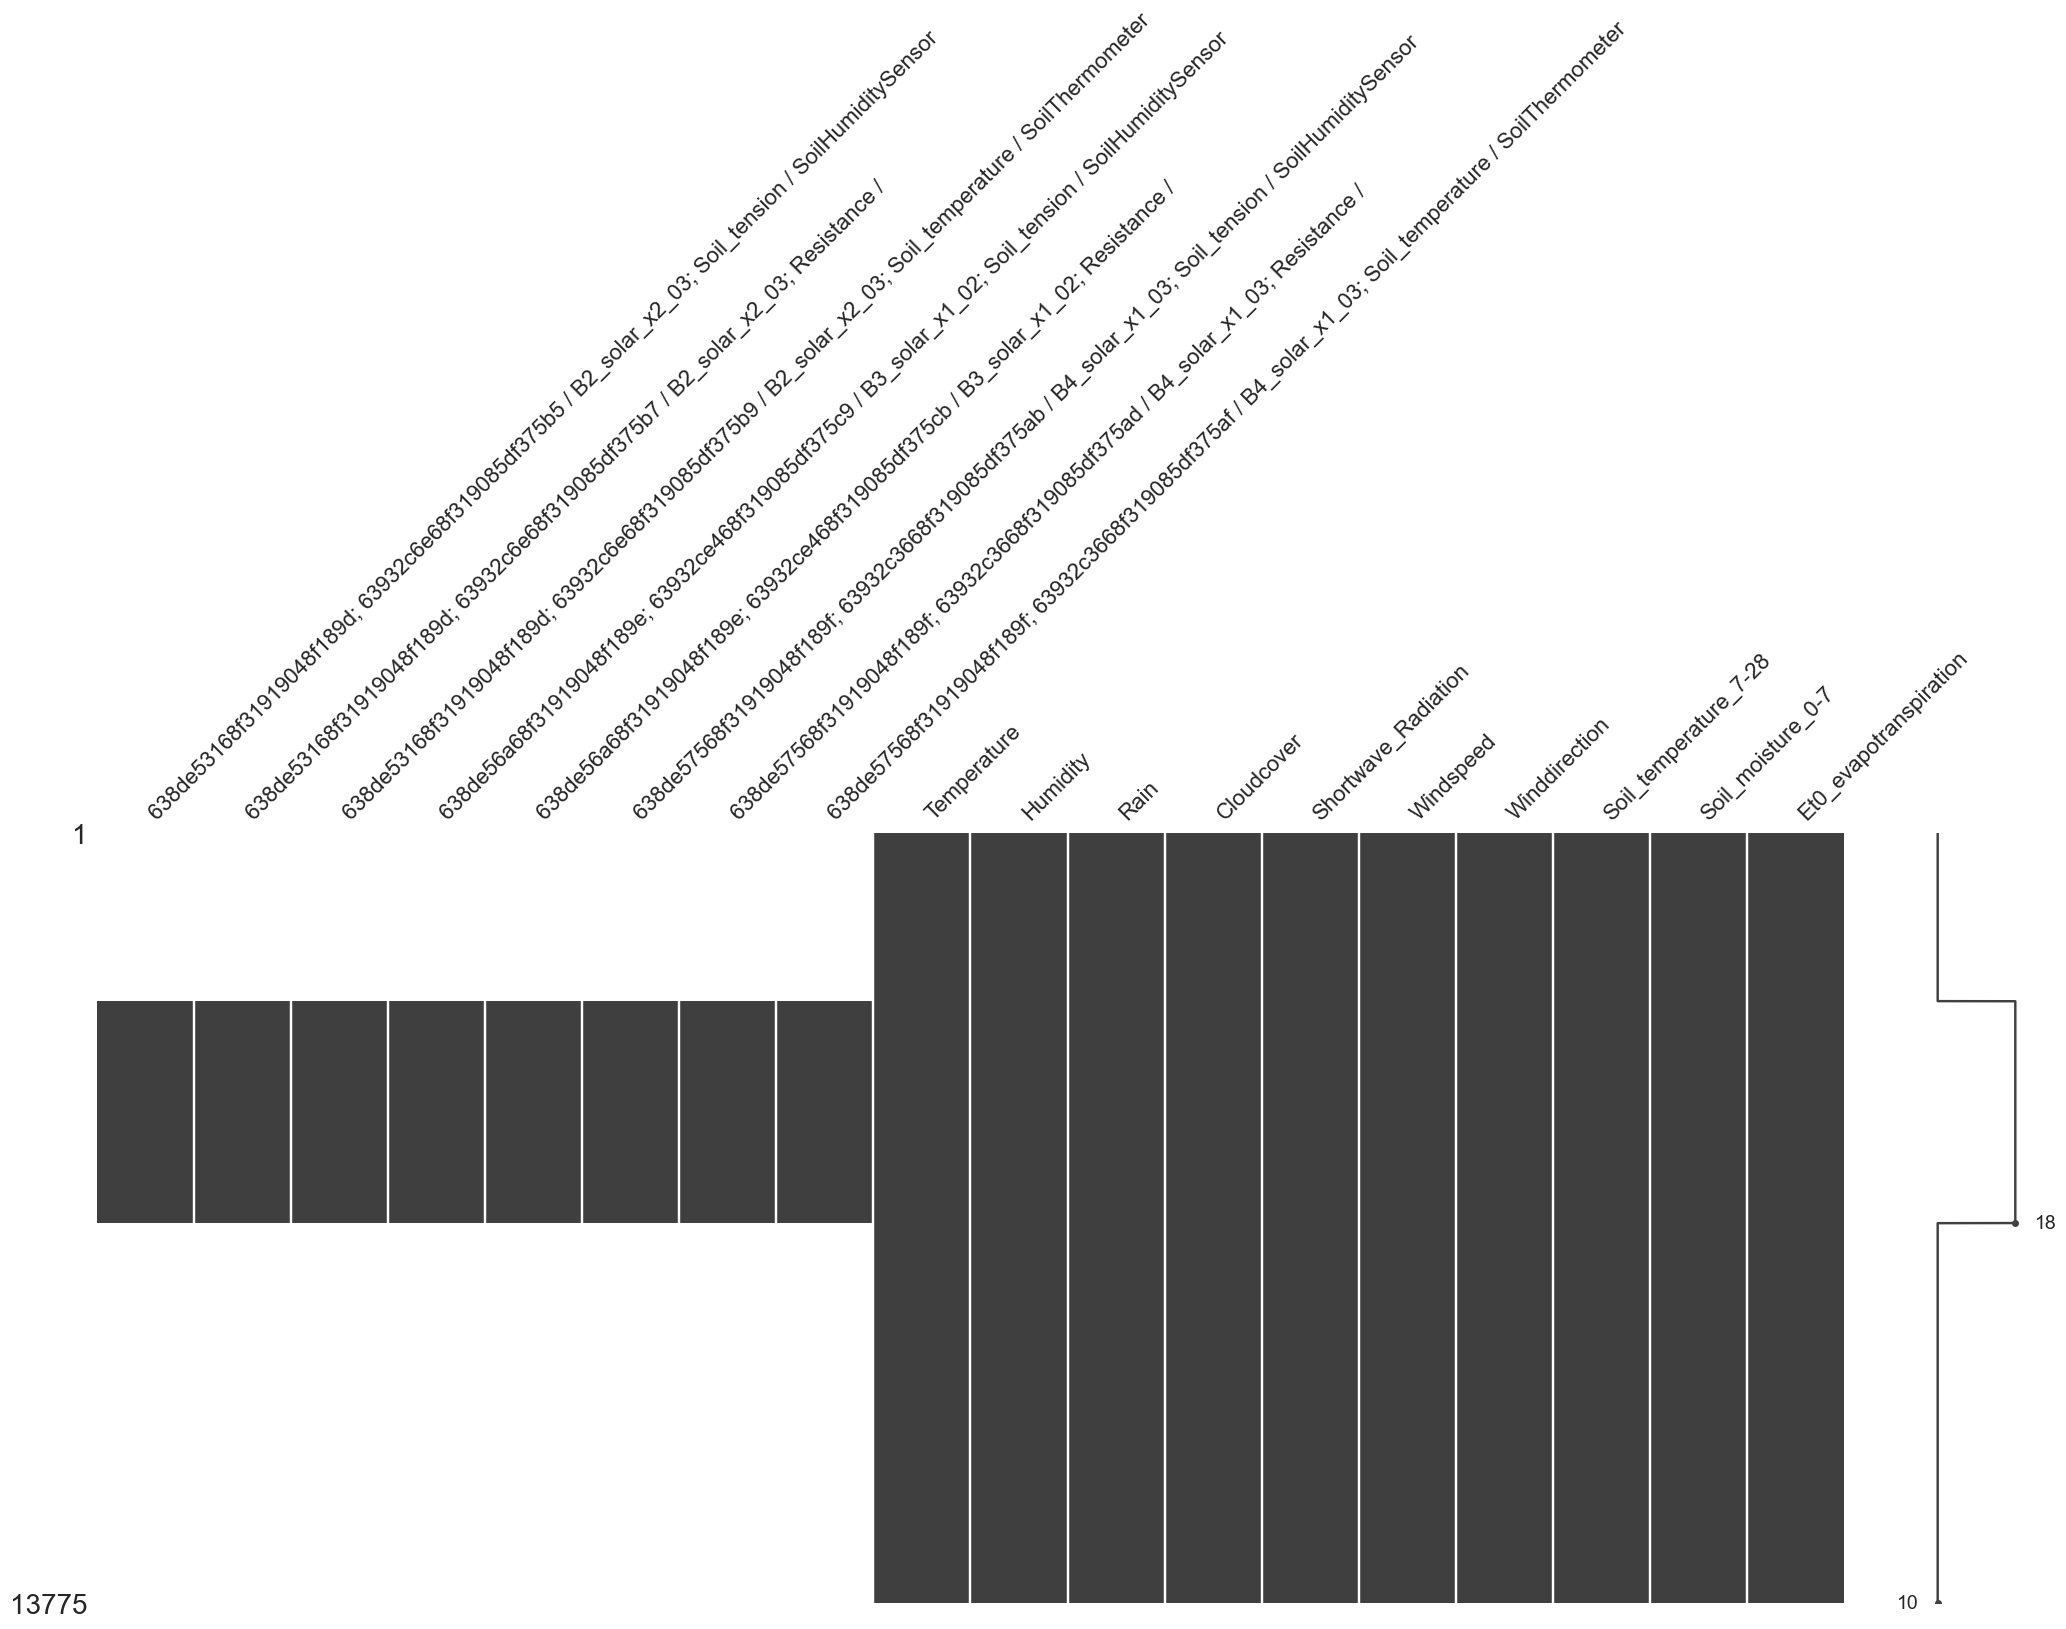

In [471]:
import missingno as msno 
# Plot correlation heatmap of missingness
msno.matrix(data_comb)

In [472]:
data.tail()

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor  \
Time                                                                                                                          
2023-05-02 07:00:00                                                0.0                                                        
2023-05-02 07:30:00                                                0.0                                                        
2023-05-02 08:00:00                                                0.0                                                        
2023-05-02 08:30:00                                                0.0                                                        
2023-05-02 09:00:00                                                0.0                                                        

                     638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /   \
Time                                                                                                      
2023-05-02 07:00:00                                               44.8                                    
2023-05-02 07:30:00                                               44.8                                    
2023-05-02 08:00:00                                               44.8                                    
2023-05-02 08:30:00                                               44.8                                    
2023-05-02 09:00:00                                               44.8                                    

                     638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer  \
Time                                                                                                                           
2023-05-02 07:00:00                                               21.5                                                         
2023-05-02 07:30:00                                               21.3                                                         
2023-05-02 08:00:00                                               21.2                                                         
2023-05-02 08:30:00                                               21.1                                                         
2023-05-02 09:00:00                                               21.1                                                         

                     638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor  \
Time                                                                                                                          
2023-05-02 07:00:00                                               0.10                                                        
2023-05-02 07:30:00                                               0.05                                                        
2023-05-02 08:00:00                                               0.00                                                        
2023-05-02 08:30:00                                               0.00                                                        
2023-05-02 09:00:00                                               0.00                                                        

                     638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /   \
Time                                                                                                      
2023-05-02 07:00:00                                               58.9                                    
2023-05-02 07:30:00                                               59.2                                    
2023-05-02 08:00:00                                               60.0                                    
2023-05-02 08:30:00                                        

In [473]:
# Select the rows between two dates => cut dataframe
start_date = '2023-03-24 22:00:00'#str(data_weather_re.index[0])
end_date = str(data.index[-1])#str(data_weather_re.index[-1])
data_comb_cut = data_comb.loc[start_date:end_date]

data = data_comb_cut

<Axes: >

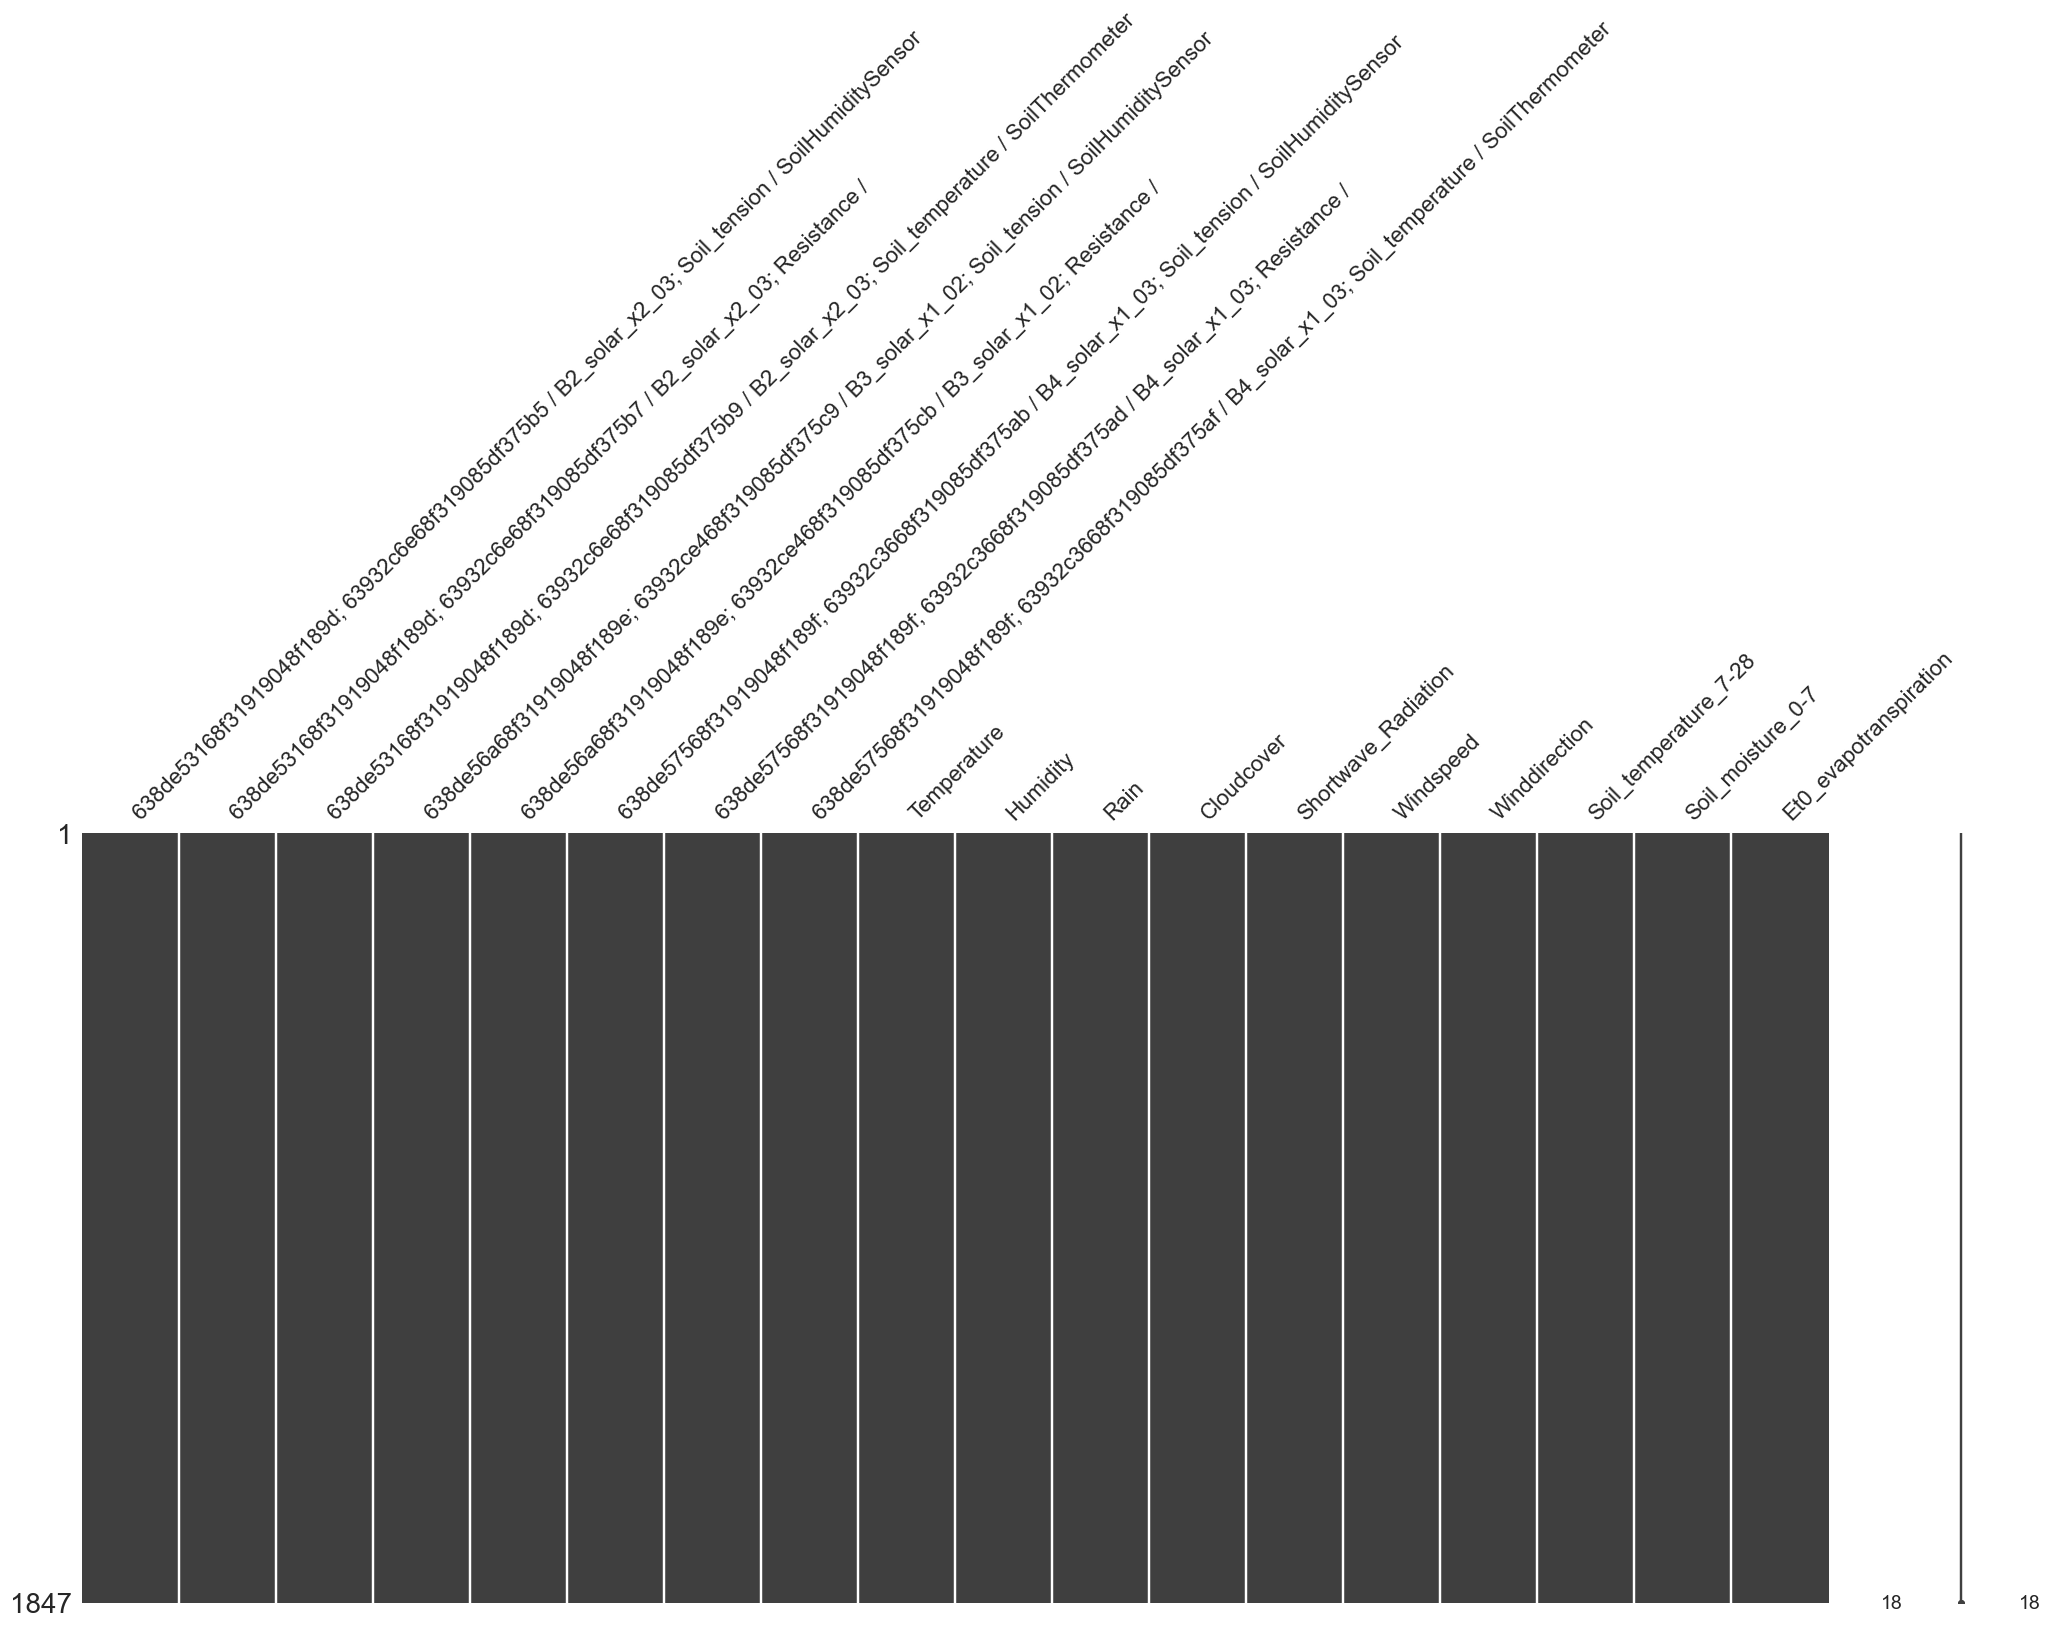

In [474]:
msno.matrix(data)

In [475]:
print("Dataframe starts at:", data.index[0], "and ends at:",data.index[-1])

Dataframe starts at: 2023-03-24 22:00:00 and ends at: 2023-05-02 09:00:00


<Axes: >

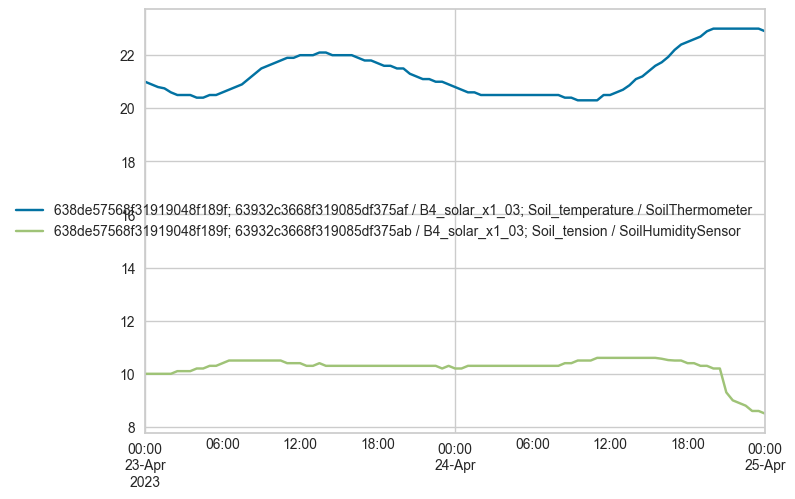

In [476]:
data[['638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilThermometer','638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor']].loc['2023-04-23 00:00:00':'2023-04-25 00:00:00'].plot()

In [477]:
data.dtypes

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor     float64
638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /                          float64
638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer    float64
638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor     float64
638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /                          float64
638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor     float64
638de57568f31919048f189f; 63932c3668f319085df375ad / B4_solar_x1_03; Resistance /                          float64
638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilThermometer    float64
Temperature                                                                     

In [478]:
ref_dtype = 'float64'
obj_dtype = 'object'

for col in data.columns:
    if data[col].dtype == obj_dtype:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    #if data[col].dtype == ref_dtype:
        #data[col] = data[col].rolling(window=rolling_mean_window_data, win_type='gaussian').mean(std=rolling_mean_window_data)
        
    print("This is :",col, "it has the following dtype: ", data[col].dtype)

This is : 638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor it has the following dtype:  float64
This is : 638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /  it has the following dtype:  float64
This is : 638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer it has the following dtype:  float64
This is : 638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor it has the following dtype:  float64
This is : 638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /  it has the following dtype:  float64
This is : 638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor it has the following dtype:  float64
This is : 638de57568f31919048f189f; 63932c3668f319085df375ad / B4_solar_x1_03; Resistance /  it has the following dtype:  float64
This is :

<Axes: >

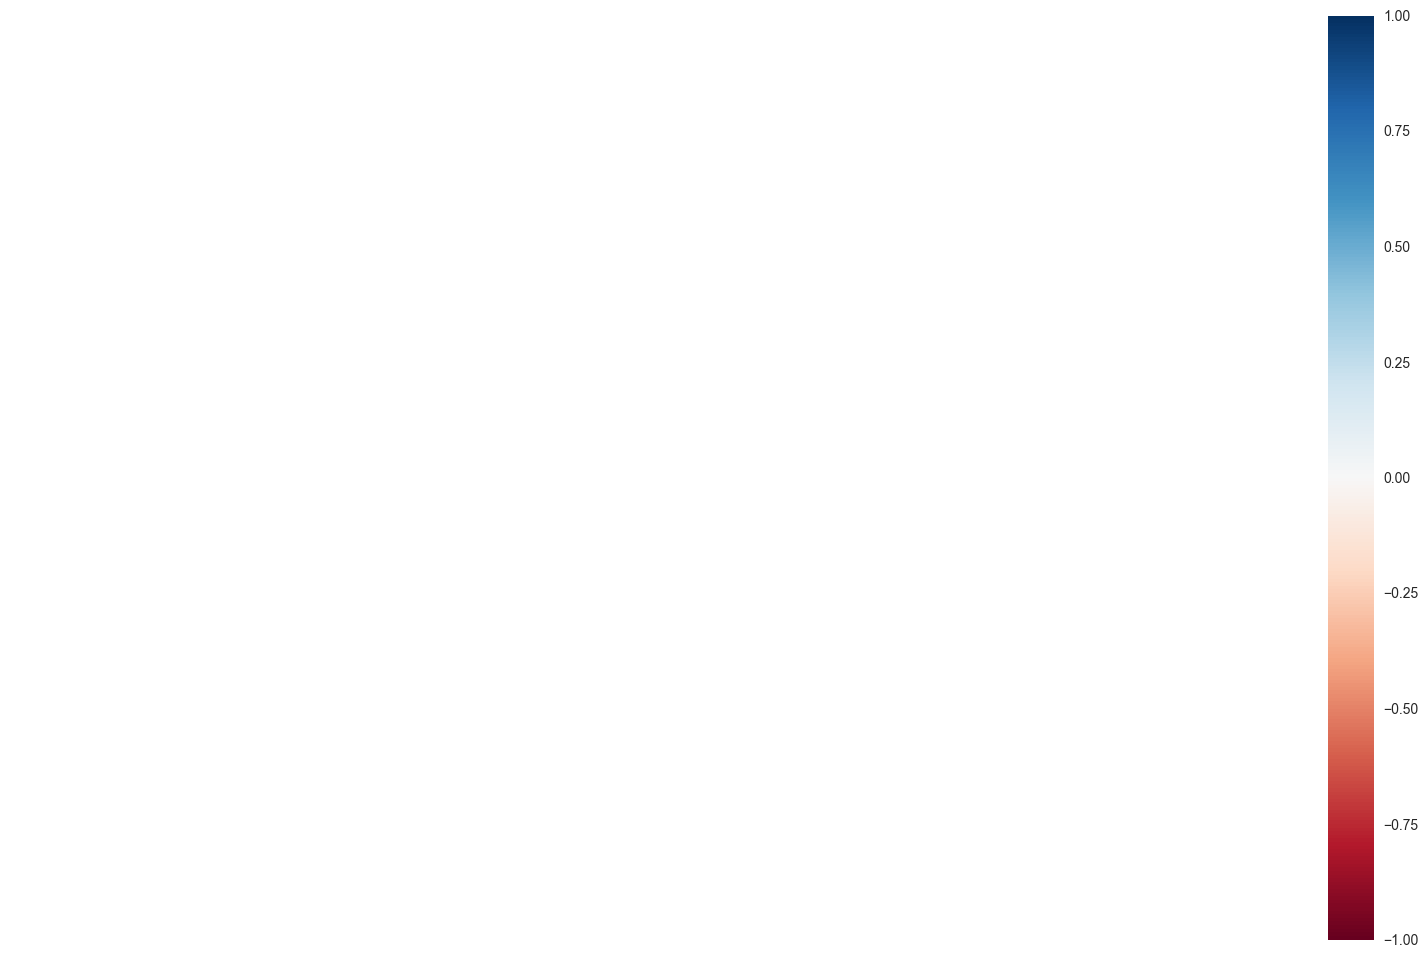

In [479]:
msno.heatmap(data)

<Axes: >

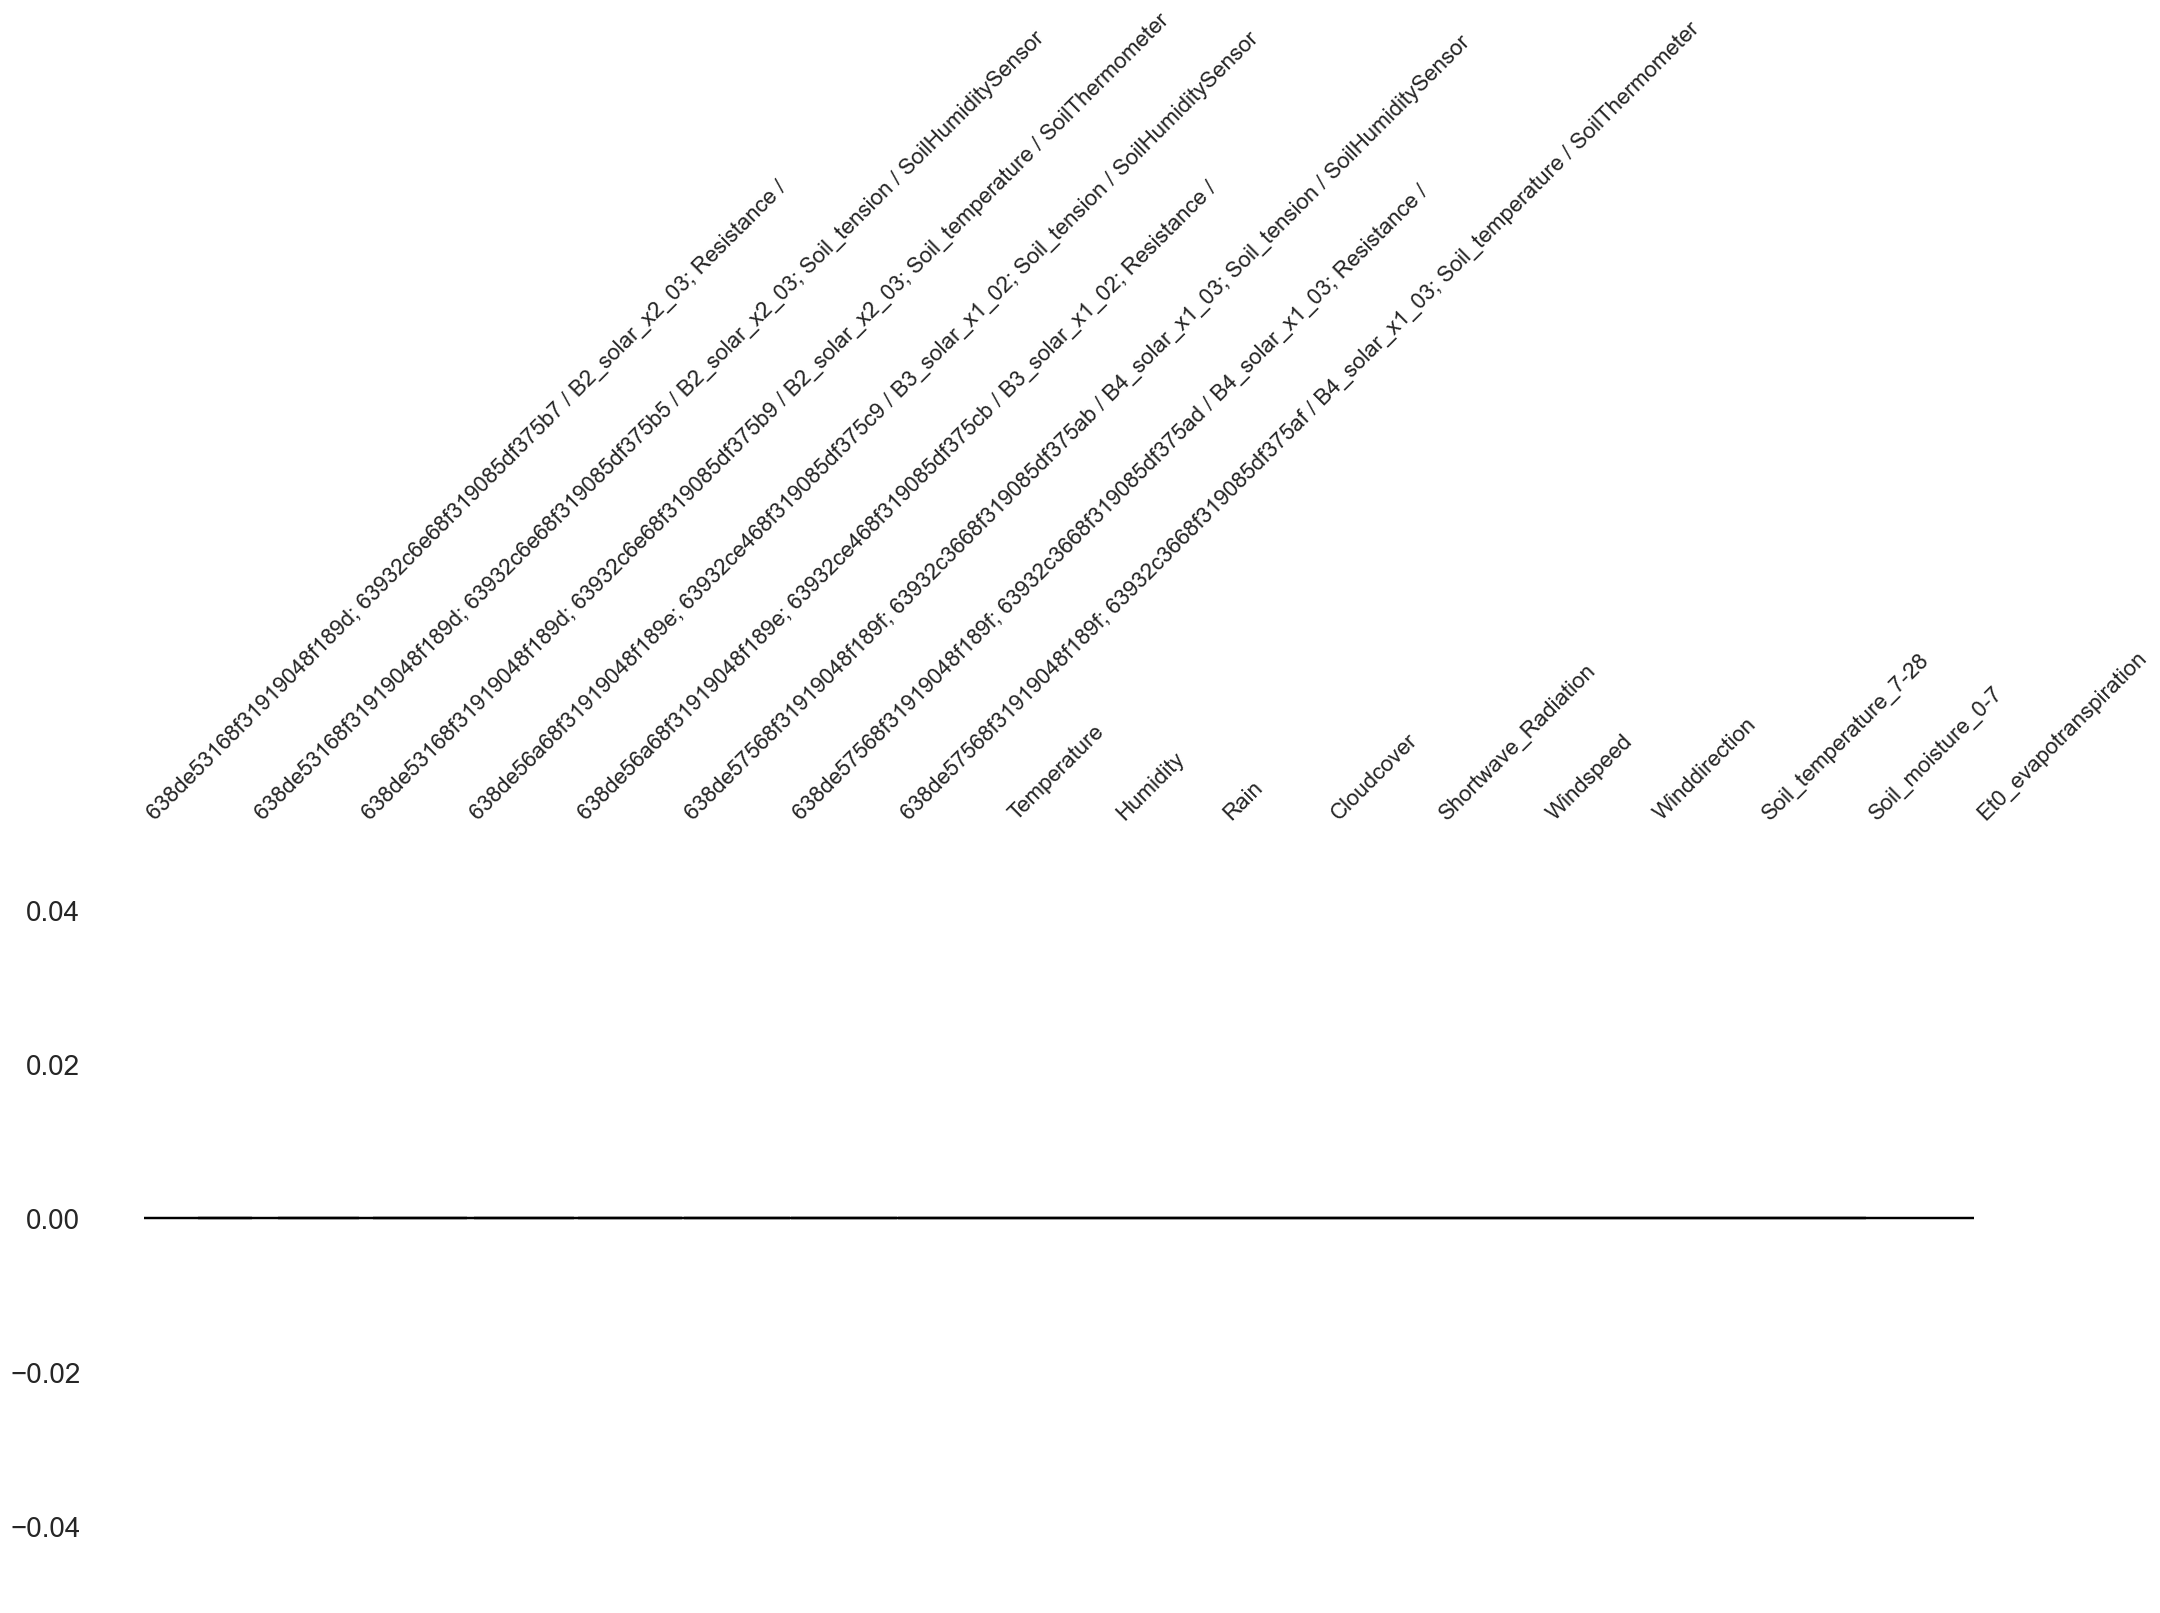

In [480]:
msno.dendrogram(data)

In [481]:
data.isna().any()

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor     False
638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /                          False
638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer    False
638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor     False
638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /                          False
638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor     False
638de57568f31919048f189f; 63932c3668f319085df375ad / B4_solar_x1_03; Resistance /                          False
638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilThermometer    False
Temperature                                                                                     

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

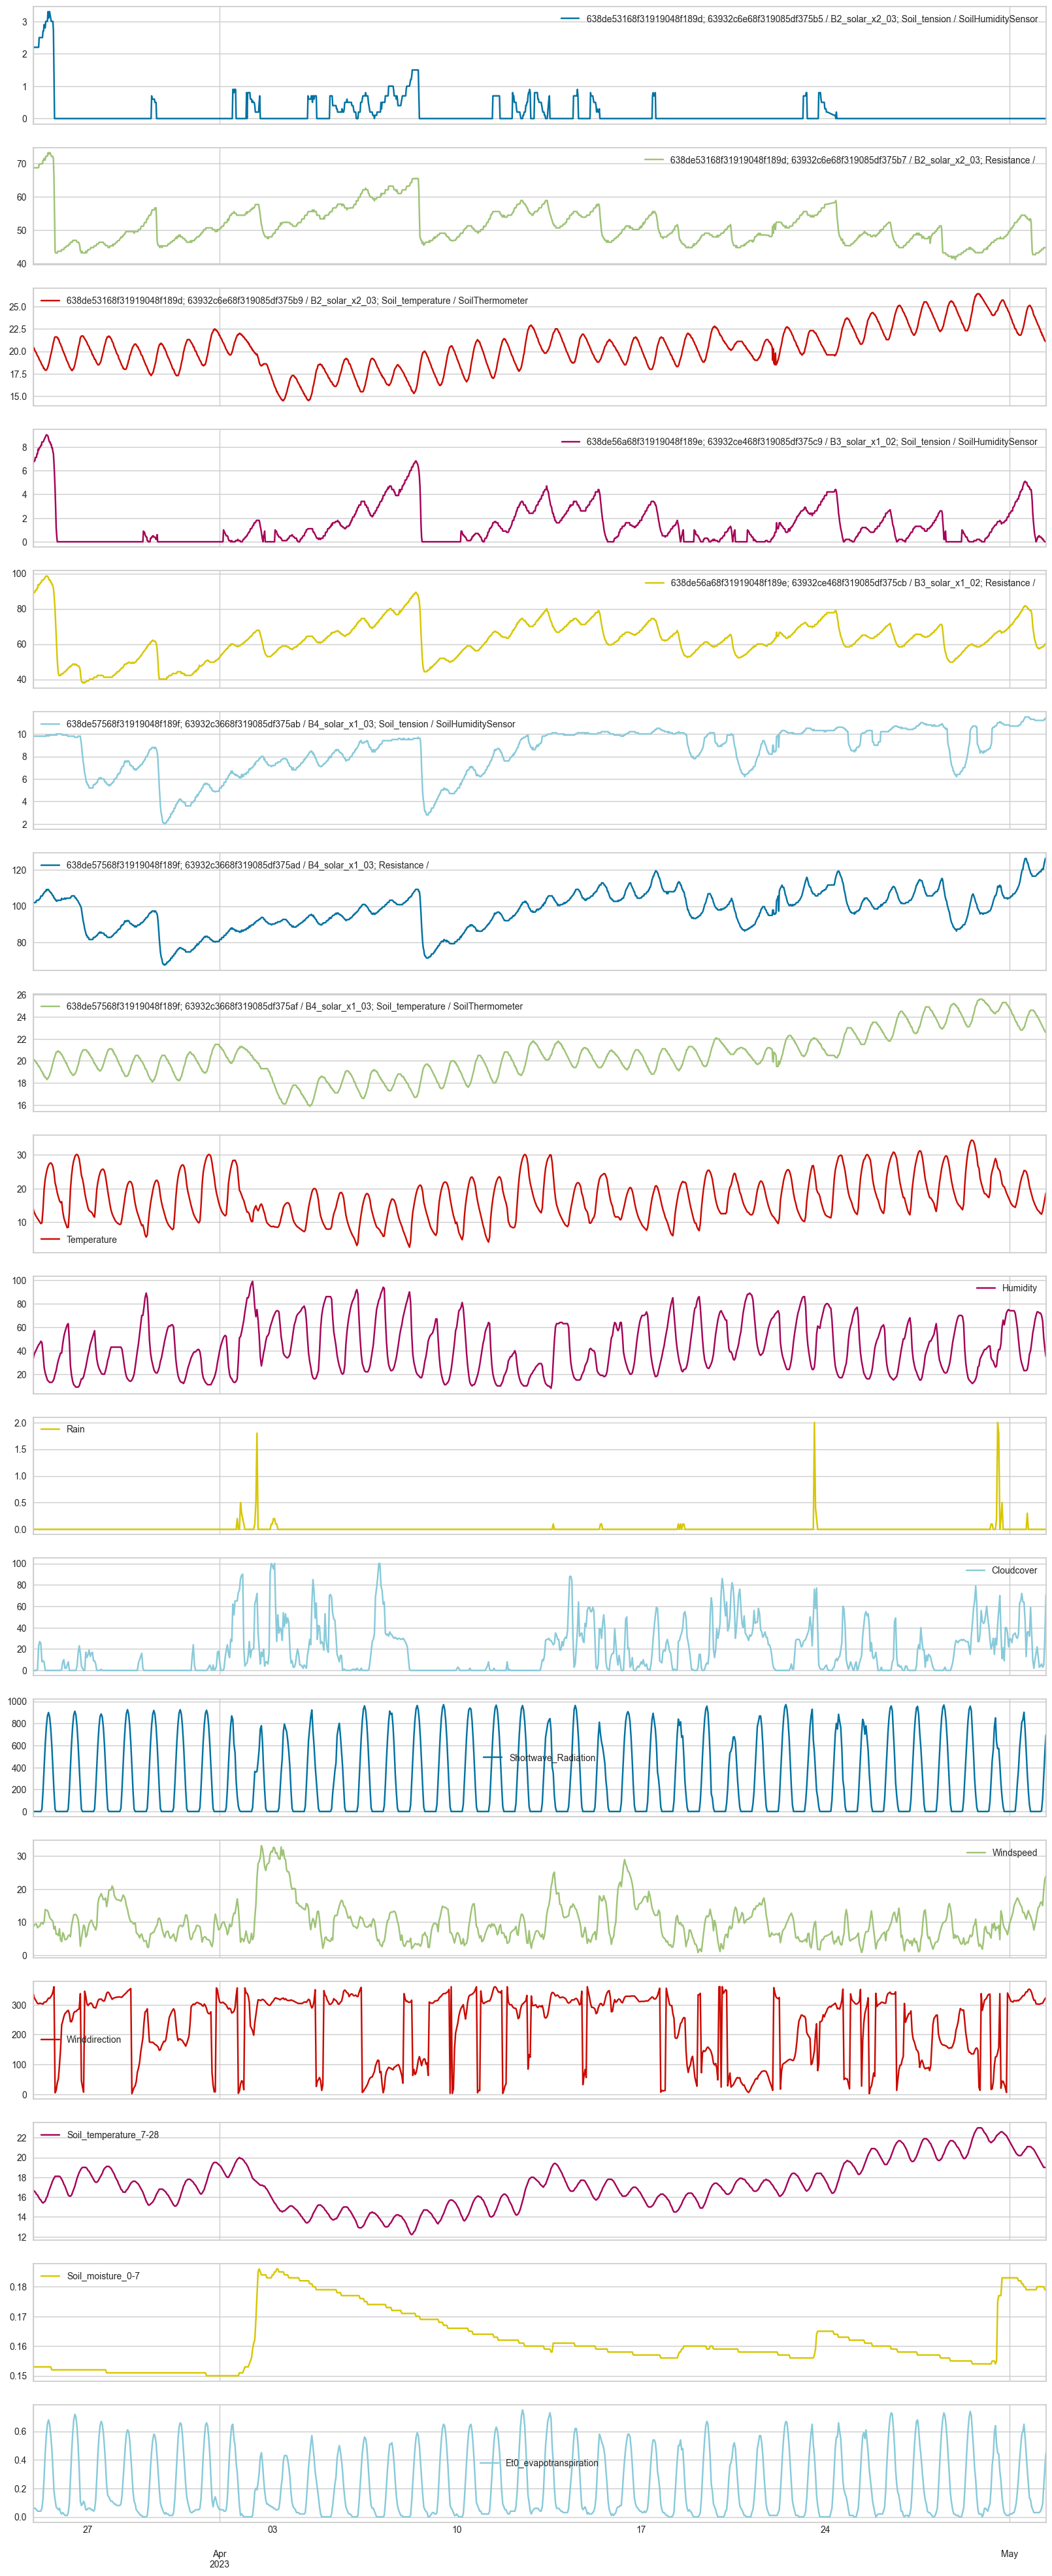

In [482]:
data.plot(subplots=True, figsize=(20,50))

We can use the following estimators:
-----------------------------------
LinearRegression: LinearRegression

BayesianRidge: Regularized linear regression.

DecisionTreeRegressor: Decision tree regression. => no

ExtraTreesRegressor: Extremely randomized trees regression. => slow

KNeighborsRegressor: k-Nearest Neighbors regression. => no

RandomForestRegressor: Random forest regression. => slow

Ridge: Linear least squares with l2 regularization. => best?

SVR: Support vector regression. => slow, no

In [483]:
# TODO: compare them with orig data

# Fit/transform
#for col in data.columns:
#    # Init the transformer
#    reg_imp = IterativeImputer(estimator=SVR())
#    # Fit/transform
#    data_imp[col] = pd.DataFrame(reg_imp.fit_transform(data[[col]]), columns=[col])

In [484]:
# Check for missing values
print(data.isna().any())


638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor     False
638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /                          False
638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer    False
638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor     False
638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /                          False
638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor     False
638de57568f31919048f189f; 63932c3668f319085df375ad / B4_solar_x1_03; Resistance /                          False
638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilThermometer    False
Temperature                                                                                     

In [485]:
#from sklearn.impute import KNNImputer

#for col in data.columns:
#    if data[col].dtype == ref_dtype:
#        #data_imp[col] = data[col].rolling(window=rolling_mean_window_data, win_type='gaussian').mean(std=rolling_mean_window_data)
#        # Init the imputer
#        imputer = KNNImputer(n_neighbors=rolling_mean_window_data)
#
#        # Impute the missing values in column col
#        data[col] = imputer.fit_transform(data[[col]])

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

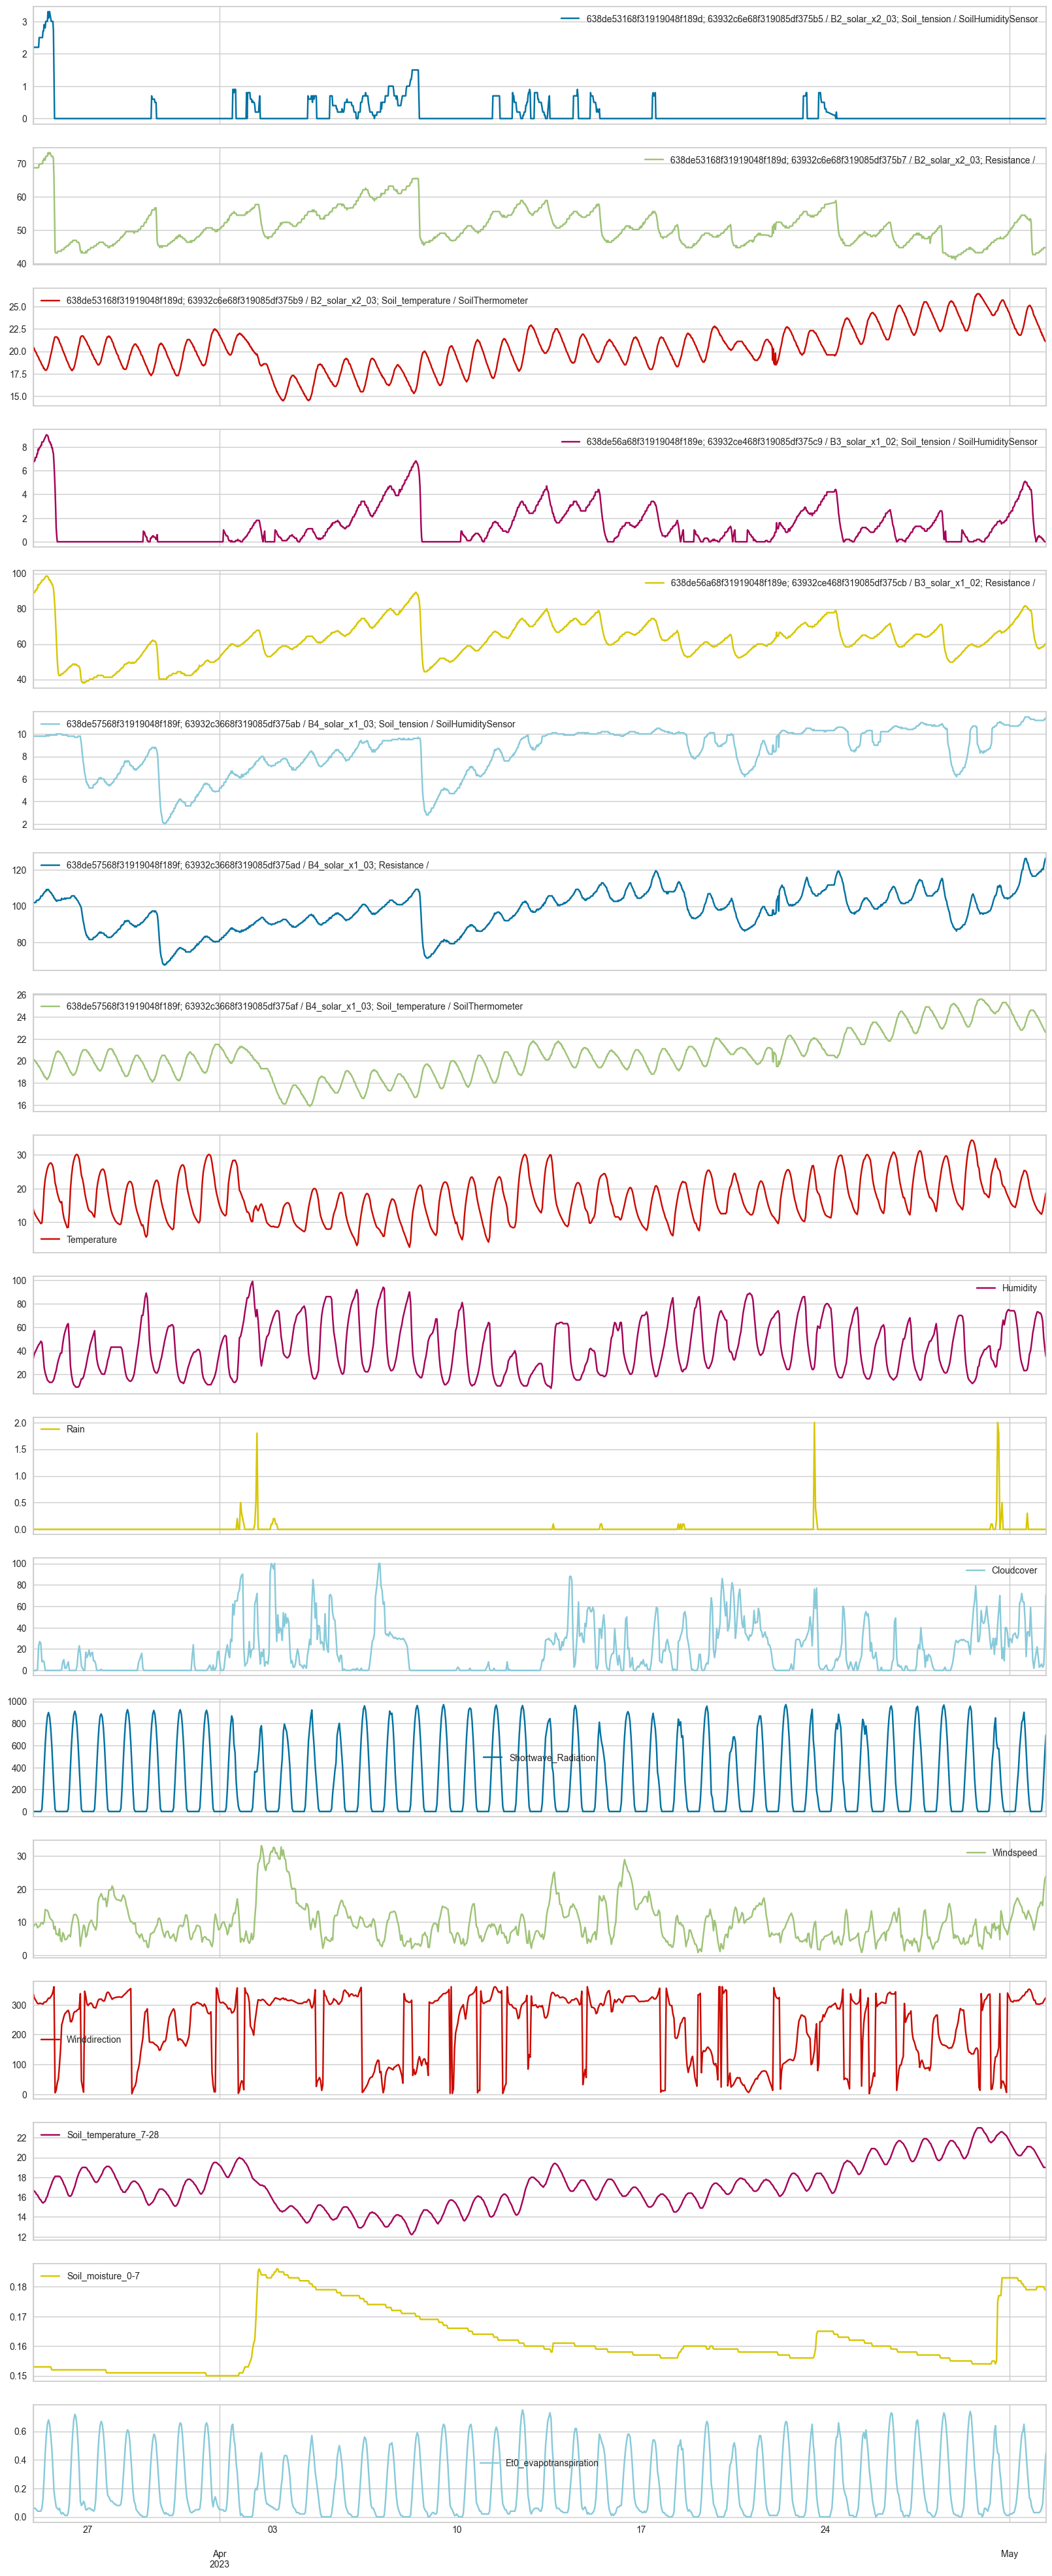

In [486]:
data.plot(subplots=True, figsize=(20,50))

In [487]:
data.head()

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor  \
2023-03-24 22:00:00                                                2.2                                                        
2023-03-24 22:30:00                                                2.2                                                        
2023-03-24 23:00:00                                                2.2                                                        
2023-03-24 23:30:00                                                2.2                                                        
2023-03-25 00:00:00                                                2.2                                                        

                     638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /   \
2023-03-24 22:00:00                                               68.7                                    
2023-03-24 22:30:00                                               68.7                                    
2023-03-24 23:00:00                                               68.7                                    
2023-03-24 23:30:00                                               68.7                                    
2023-03-25 00:00:00                                               68.7                                    

                     638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer  \
2023-03-24 22:00:00                                               20.5                                                         
2023-03-24 22:30:00                                               20.4                                                         
2023-03-24 23:00:00                                               20.3                                                         
2023-03-24 23:30:00                                               20.1                                                         
2023-03-25 00:00:00                                               20.0                                                         

                     638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor  \
2023-03-24 22:00:00                                                6.6                                                        
2023-03-24 22:30:00                                                6.8                                                        
2023-03-24 23:00:00                                                6.8                                                        
2023-03-24 23:30:00                                                6.8                                                        
2023-03-25 00:00:00                                                7.1                                                        

                     638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /   \
2023-03-24 22:00:00                                               88.2                                    
2023-03-24 22:30:00                                               89.3                                    
2023-03-24 23:00:00                                               89.3                                    
2023-03-24 23:30:00                                               89.3                                    
2023-03-25 00:00:00                                               90.4                                    

                     638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor  \
2023-03-24 22:00:00                                                9.8                                                        
2023-03-24 22:30:00                                                9.8                                                        
2023-03-24 23:00:00                                        

In [488]:
def compare_dataframes(df1, df2):
    # Verify column names
    if not set(df1.columns) == set(df2.columns):
        print("Column names are not the same in both dataframes.")
        return

    # Find the common columns between the two dataframes
    common_columns = df1.columns.intersection(df2.columns)

    # Compare the available values in the common columns
    for column in common_columns:
        values1 = df1[column].dropna()
        values2 = df2[column].dropna()

        min_length = min(len(values1), len(values2))
        values1 = values1[:min_length]
        values2 = values2[:min_length]

        diff = np.abs(values1.values - values2.values)
        mae = np.mean(diff)
        rmse = np.sqrt(np.mean(diff ** 2))
        mpe = np.mean(diff / values1.values) * 100

        print(f"Column: {column}")
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MPE: {mpe:.2f}%")
        print("df1 len:",len(values1),"df2 len:",len(values2))
        print()

#compare_dataframes(data, data_imp)

In [489]:
#data_imp.index = data.index
#data = data_imp

In [490]:
#data_imp.plot(subplots=True, figsize=(20,50))

In [491]:
#impute data
#from sklearn.impute import KNNImputer

##data_knn_imputed = data_knn_imputed.drop(['Time'], axis=1)

# Init the transformer
#knn_imp = KNNImputer(n_neighbors=10)

# Fit/transform
#data_imp.iloc[:,0:len(data)] = knn_imp.fit_transform(data_imp.iloc[:,0:len(data)])

In [492]:
#data_imp.plot(subplots=True, figsize=(20,50))

<Axes: >

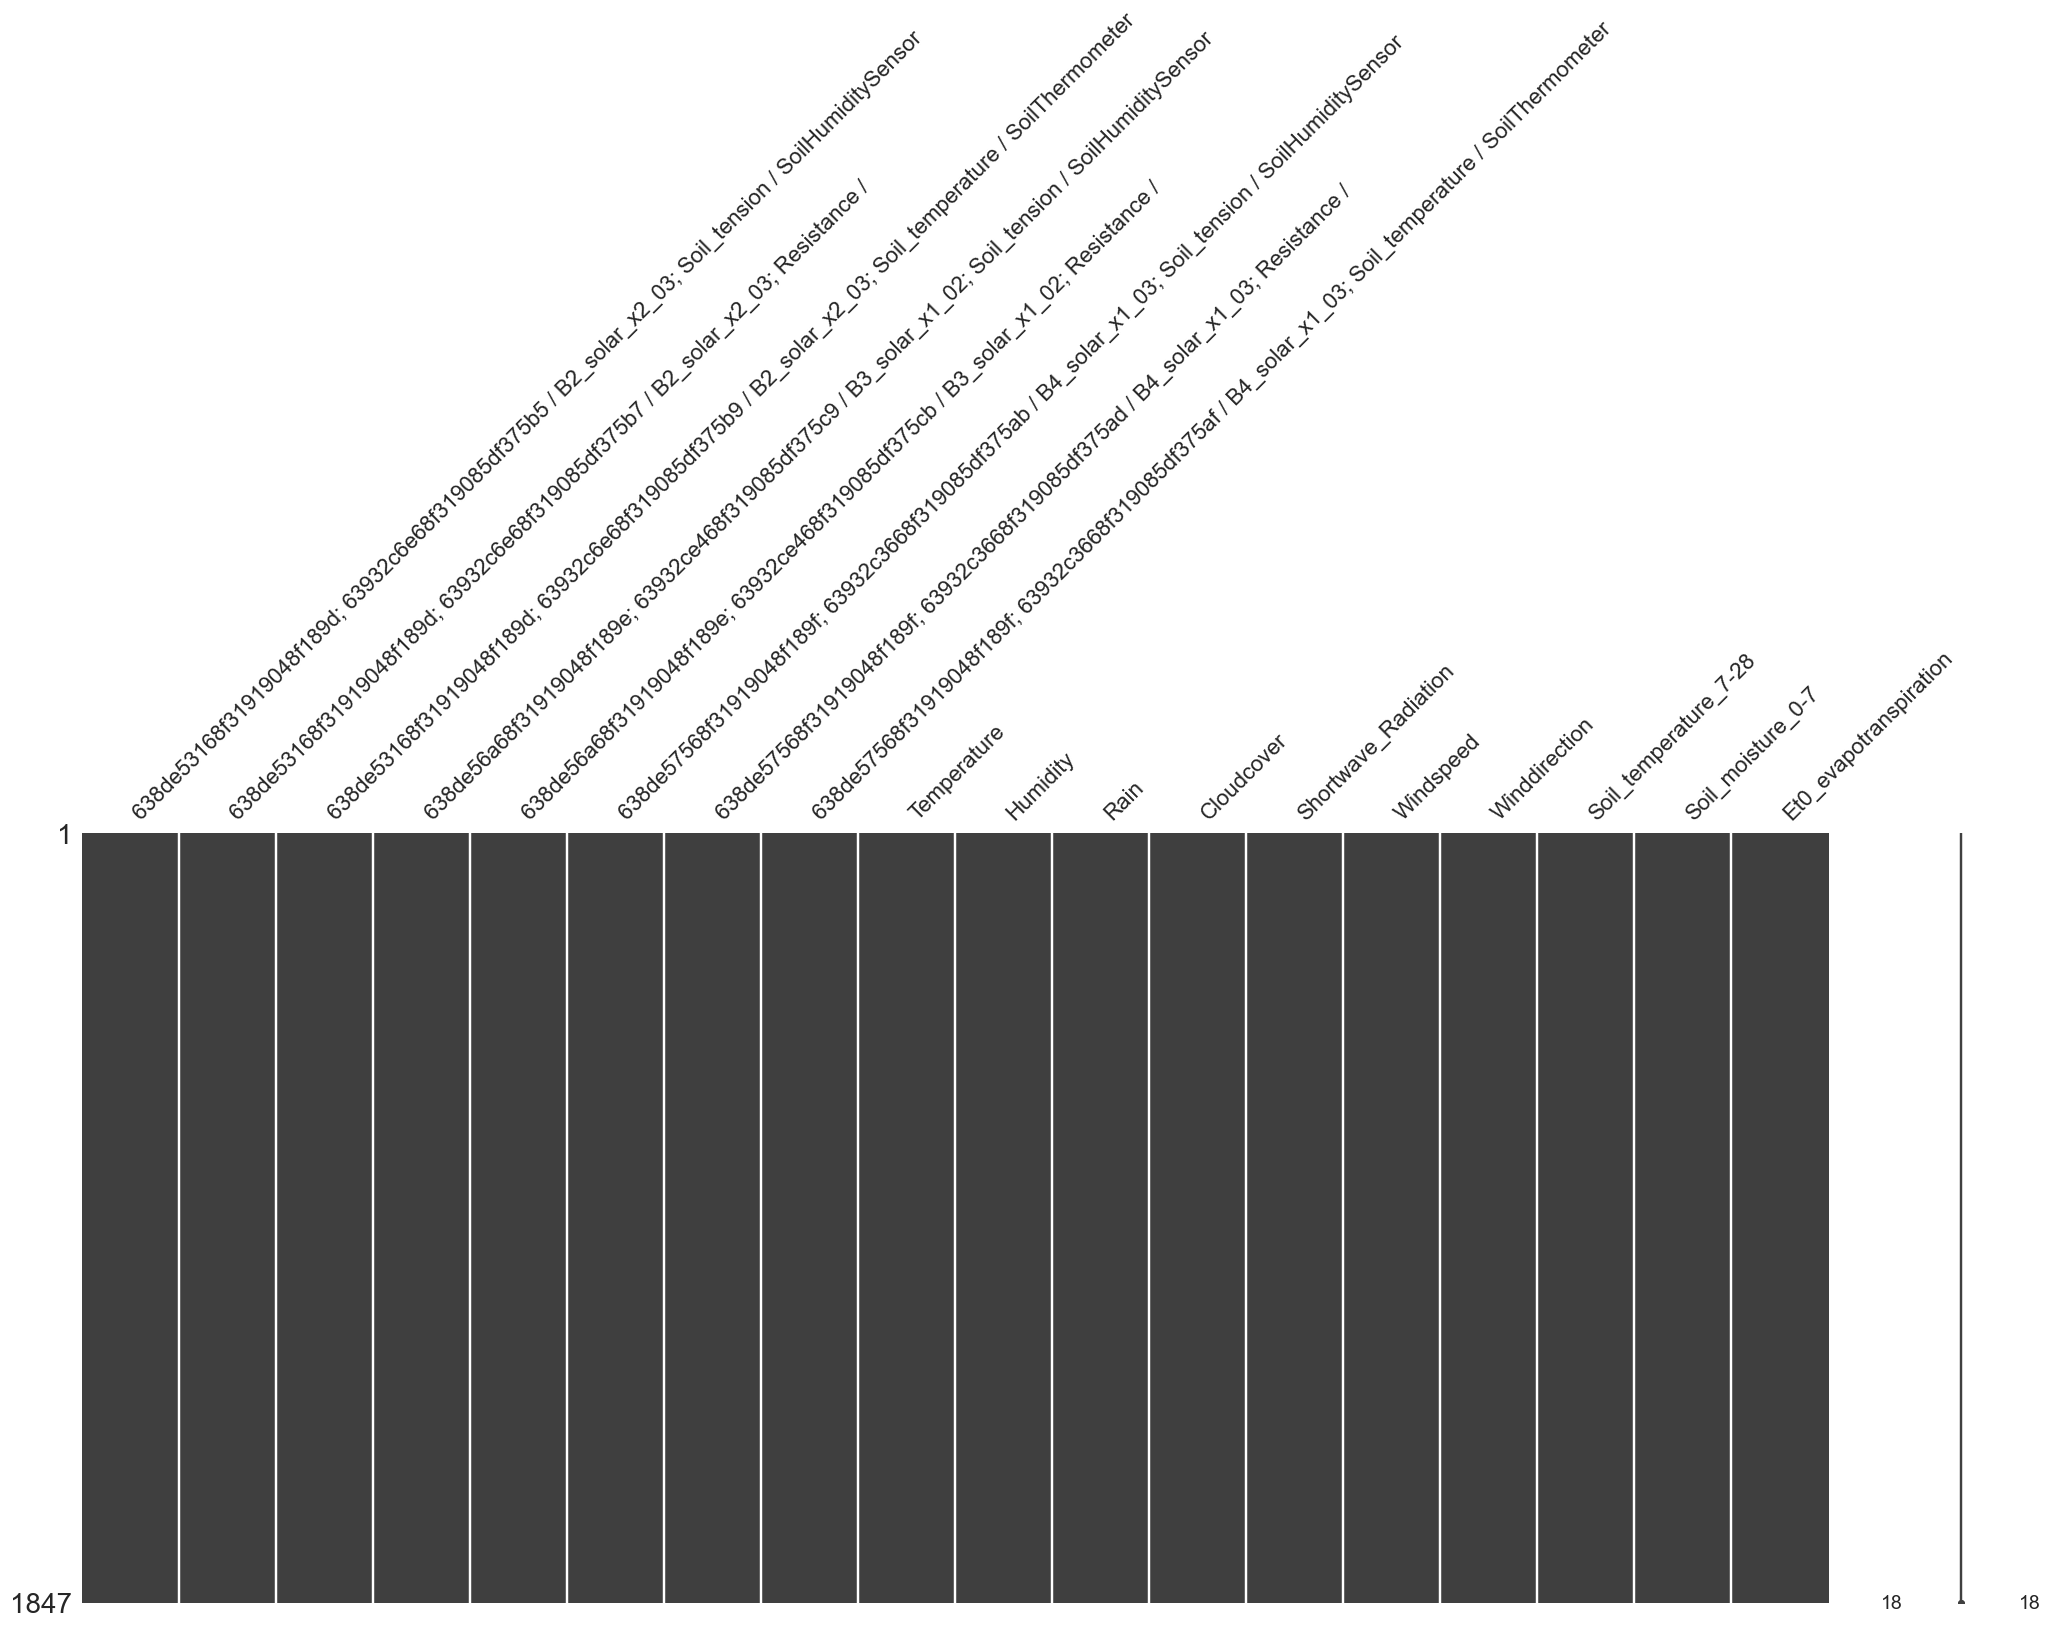

In [493]:
# Plot correlation heatmap of missingness
msno.matrix(data)

In [494]:
# Show if there are any missing values inside the data
data.isna().any()

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor     False
638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /                          False
638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer    False
638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor     False
638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /                          False
638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor     False
638de57568f31919048f189f; 63932c3668f319085df375ad / B4_solar_x1_03; Resistance /                          False
638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilThermometer    False
Temperature                                                                                     

In [495]:
# create average cols
data['grouped_soil'] = data[Soil_humi].mean(axis=1)
data['grouped_resistance'] = data[Resistance].mean(axis=1)
data['grouped_soil_temp'] = data[Soil_temp].mean(axis=1)

In [496]:
data.index.dtype

dtype('<M8[ns]')

In [497]:
#data['Time'] = data['Time'].str[:-9]
#data.head()

In [498]:
#data['Time']=pd.to_datetime(data['Time'])

#data.head()

In [499]:
# after concat => need to convert to datetimeindex once more:
#data.index=pd.to_datetime(data.index, format='%Y-%m-%d %H:%M:%S') #2023-04-01 00:50:00

In [500]:
## Create Features
## create rolling mean: introduces NaN again -> later just cut off
data['rolling_mean_grouped_soil'] = data['grouped_soil'].rolling(window=rolling_mean_window_grouped, win_type='gaussian').mean(std=rolling_mean_window_grouped)
data['rolling_mean_grouped_soil_temp'] = data['grouped_soil_temp'].rolling(window=rolling_mean_window_grouped, win_type='gaussian').mean(std=rolling_mean_window_grouped)

data['hour'] = data.index.hour#.astype("float64")
data['minute'] = data.index.minute#.astype("float64")
data['date'] = data.index.day#.astype("float64")
data['month'] = data.index.month#.astype("float64")
data['day_of_year'] = data.index.dayofyear#.astype("float64")

In [501]:
# soil-water retention curve for sandy clay
soil_water_retention_curve = [
    (0, 0.45),
    (5, 0.40),
    (10, 0.37),
    (20, 0.30),
    (50, 0.25),
    (100, 0.20),
    (200, 0.15),
    (500, 0.10),
    (1000, 0.05),               
]
# this is basically made up to match the weather apis values
soil_water_retention_curve2 = [
    (0, 0.225),
    (5, 0.2),
    (10, 0.185),
    (20, 0.15),
    (50, 0.125),
    (100, 0.1),
    (200, 0.075),
    (500, 0.05),
    (1000, 0.025),               
]

def soil_tension_to_volumetric_water_content(soil_tension, soil_water_retention_curve):
    """
    Convert soil tension (kPa) to volumetric water content (fraction) using a given soil-water retention curve.
    
    Parameters:
        soil_tension (float): Soil tension value in kPa.
        soil_water_retention_curve (list of tuples): A list of tuples containing points on the soil-water retention curve.
            Each tuple contains two elements: (soil_tension_value, volumetric_water_content_value).
    
    Returns:
        float: Volumetric water content as a fraction (between 0 and 1).
    """
    # Sort the soil-water retention curve points by soil tension in ascending order
    sorted_curve = sorted(soil_water_retention_curve, key=lambda x: x[0])
    
    # Find the two points on the curve that bound the given soil tension value
    lower_point, upper_point = None, None
    for tension, water_content in sorted_curve:
        if tension <= soil_tension:
            lower_point = (tension, water_content)
        else:
            upper_point = (tension, water_content)
            break
    
    # If the soil tension is lower than the first point on the curve, use the first point
    if lower_point is None:
        return sorted_curve[0][1]
    
    # If the soil tension is higher than the last point on the curve, use the last point
    if upper_point is None:
        return sorted_curve[-1][1]
    
    # Interpolate to find the volumetric water content at the given soil tension
    tension_diff = upper_point[0] - lower_point[0]
    water_content_diff = upper_point[1] - lower_point[1]
    interpolated_water_content = lower_point[1] + ((soil_tension - lower_point[0]) / tension_diff) * water_content_diff
    
    return interpolated_water_content

def add_volumetric_col_to_df(df, col_name):
    # Iterate over the rows of the dataframe and calculate volumetric water content
    for index, row in df.iterrows():
        soil_tension = row[col_name]
        # Calculate volumetric water content
        volumetric_water_content = soil_tension_to_volumetric_water_content(soil_tension, soil_water_retention_curve2)
        # Assign the calculated value to a new column in the dataframe
        df.at[index, col_name + '_vol'] = volumetric_water_content

    return df

data = add_volumetric_col_to_df(data, 'rolling_mean_grouped_soil')

In [502]:
data.head()

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor  \
2023-03-24 22:00:00                                                2.2                                                        
2023-03-24 22:30:00                                                2.2                                                        
2023-03-24 23:00:00                                                2.2                                                        
2023-03-24 23:30:00                                                2.2                                                        
2023-03-25 00:00:00                                                2.2                                                        

                     638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /   \
2023-03-24 22:00:00                                               68.7                                    
2023-03-24 22:30:00                                               68.7                                    
2023-03-24 23:00:00                                               68.7                                    
2023-03-24 23:30:00                                               68.7                                    
2023-03-25 00:00:00                                               68.7                                    

                     638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer  \
2023-03-24 22:00:00                                               20.5                                                         
2023-03-24 22:30:00                                               20.4                                                         
2023-03-24 23:00:00                                               20.3                                                         
2023-03-24 23:30:00                                               20.1                                                         
2023-03-25 00:00:00                                               20.0                                                         

                     638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor  \
2023-03-24 22:00:00                                                6.6                                                        
2023-03-24 22:30:00                                                6.8                                                        
2023-03-24 23:00:00                                                6.8                                                        
2023-03-24 23:30:00                                                6.8                                                        
2023-03-25 00:00:00                                                7.1                                                        

                     638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /   \
2023-03-24 22:00:00                                               88.2                                    
2023-03-24 22:30:00                                               89.3                                    
2023-03-24 23:00:00                                               89.3                                    
2023-03-24 23:30:00                                               89.3                                    
2023-03-25 00:00:00                                               90.4                                    

                     638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor  \
2023-03-24 22:00:00                                                9.8                                                        
2023-03-24 22:30:00                                                9.8                                                        
2023-03-24 23:00:00                                        

In [503]:
# feature scaling
data.dtypes

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor     float64
638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /                          float64
638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer    float64
638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor     float64
638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /                          float64
638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor     float64
638de57568f31919048f189f; 63932c3668f319085df375ad / B4_solar_x1_03; Resistance /                          float64
638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilThermometer    float64
Temperature                                                                     

In [504]:
# Min-Max Normalization
def max_min_norm(df_all):
    df = df_all.drop(['rolling_mean_grouped_soil', 'hour', 'minute', 'date', 'month', 'day_of_year'], axis=1)
    index = df.index
    df_norm = pd.DataFrame()
    for col in df.columns:
        print("Current col: ", col)
        if df[col].dtype == ref_dtype:
            print("Normalize:   ", col, "Max value: ", df[col].max())
            df_norm[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
    df_norm = pd.concat([df_norm,  df_all.rolling_mean_grouped_soil, df_all['hour'], df_all['minute'], df_all['date'], df_all['month'], df_all['day_of_year']], 1)
    return df_norm

#data = max_min_norm(data)

In [505]:
data.dtypes

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor     float64
638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /                          float64
638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer    float64
638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor     float64
638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /                          float64
638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor     float64
638de57568f31919048f189f; 63932c3668f319085df375ad / B4_solar_x1_03; Resistance /                          float64
638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilThermometer    float64
Temperature                                                                     

In [506]:
print(str(Soil_temp).replace("[", "").replace("]", ""))

'638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer', '638de57568f31919048f189f; 63932c3668f319085df375af / B4_solar_x1_03; Soil_temperature / SoilThermometer'


In [507]:
int(5/2 + 0.5)

3

In [508]:
data.head()

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor  \
2023-03-24 22:00:00                                                2.2                                                        
2023-03-24 22:30:00                                                2.2                                                        
2023-03-24 23:00:00                                                2.2                                                        
2023-03-24 23:30:00                                                2.2                                                        
2023-03-25 00:00:00                                                2.2                                                        

                     638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /   \
2023-03-24 22:00:00                                               68.7                                    
2023-03-24 22:30:00                                               68.7                                    
2023-03-24 23:00:00                                               68.7                                    
2023-03-24 23:30:00                                               68.7                                    
2023-03-25 00:00:00                                               68.7                                    

                     638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer  \
2023-03-24 22:00:00                                               20.5                                                         
2023-03-24 22:30:00                                               20.4                                                         
2023-03-24 23:00:00                                               20.3                                                         
2023-03-24 23:30:00                                               20.1                                                         
2023-03-25 00:00:00                                               20.0                                                         

                     638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor  \
2023-03-24 22:00:00                                                6.6                                                        
2023-03-24 22:30:00                                                6.8                                                        
2023-03-24 23:00:00                                                6.8                                                        
2023-03-24 23:30:00                                                6.8                                                        
2023-03-25 00:00:00                                                7.1                                                        

                     638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /   \
2023-03-24 22:00:00                                               88.2                                    
2023-03-24 22:30:00                                               89.3                                    
2023-03-24 23:00:00                                               89.3                                    
2023-03-24 23:30:00                                               89.3                                    
2023-03-25 00:00:00                                               90.4                                    

                     638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor  \
2023-03-24 22:00:00                                                9.8                                                        
2023-03-24 22:30:00                                                9.8                                                        
2023-03-24 23:00:00                                        

In [509]:
#data = data[['Time', 'hour', 'minute', 'date', 'month', 'grouped_soil', 'grouped_resistance', 'grouped_soil_temp', 'rolling_mean_grouped_soil', 'rolling_mean_grouped_soil_temp', 
#             str(Soil_humi).replace("[", "").replace("]", "").replace("\\",""),
#             str(Resistance).replace("[", "").replace("]", "").replace("\\",""),
#             str(Soil_temp).replace("[", "").replace("]", "").replace("\\","")
#            ]]

# drop those values without rolling_mean
#data = data[rolling_mean_window_data+int(rolling_mean_window_grouped/2 + 0.5):]
data = data[4:]
data.head()

# reset changed index(due to drop)
#data = data.reset_index()

#data = data.drop(['index'],axis=1)

638de53168f31919048f189d; 63932c6e68f319085df375b5 / B2_solar_x2_03; Soil_tension / SoilHumiditySensor  \
2023-03-25 00:00:00                                                2.2                                                        
2023-03-25 00:30:00                                                2.2                                                        
2023-03-25 01:00:00                                                2.2                                                        
2023-03-25 01:30:00                                                2.2                                                        
2023-03-25 02:00:00                                                2.2                                                        

                     638de53168f31919048f189d; 63932c6e68f319085df375b7 / B2_solar_x2_03; Resistance /   \
2023-03-25 00:00:00                                               68.7                                    
2023-03-25 00:30:00                                               68.7                                    
2023-03-25 01:00:00                                               68.7                                    
2023-03-25 01:30:00                                               68.7                                    
2023-03-25 02:00:00                                               68.7                                    

                     638de53168f31919048f189d; 63932c6e68f319085df375b9 / B2_solar_x2_03; Soil_temperature / SoilThermometer  \
2023-03-25 00:00:00                                               20.0                                                         
2023-03-25 00:30:00                                               19.9                                                         
2023-03-25 01:00:00                                               19.8                                                         
2023-03-25 01:30:00                                               19.6                                                         
2023-03-25 02:00:00                                               19.5                                                         

                     638de56a68f31919048f189e; 63932ce468f319085df375c9 / B3_solar_x1_02; Soil_tension / SoilHumiditySensor  \
2023-03-25 00:00:00                                                7.1                                                        
2023-03-25 00:30:00                                                7.1                                                        
2023-03-25 01:00:00                                                7.1                                                        
2023-03-25 01:30:00                                                7.4                                                        
2023-03-25 02:00:00                                                7.4                                                        

                     638de56a68f31919048f189e; 63932ce468f319085df375cb / B3_solar_x1_02; Resistance /   \
2023-03-25 00:00:00                                               90.4                                    
2023-03-25 00:30:00                                               90.5                                    
2023-03-25 01:00:00                                               90.5                                    
2023-03-25 01:30:00                                               91.6                                    
2023-03-25 02:00:00                                               91.6                                    

                     638de57568f31919048f189f; 63932c3668f319085df375ab / B4_solar_x1_03; Soil_tension / SoilHumiditySensor  \
2023-03-25 00:00:00                                                9.8                                                        
2023-03-25 00:30:00                                                9.8                                                        
2023-03-25 01:00:00                                        

In [510]:
# Drop the first eight columns 
#->better without raw values-> overfitting
data = data.iloc[:, total_amount:]

In [511]:
print(data.iloc[0])

data.head(10)

Temperature                        12.200000
Humidity                           39.000000
Rain                                0.000000
Cloudcover                          0.000000
Shortwave_Radiation                 0.000000
Windspeed                           9.400000
Winddirection                     317.000000
Soil_temperature_7-28              16.500000
Soil_moisture_0-7                   0.153000
Et0_evapotranspiration              0.060000
grouped_soil                        6.366667
grouped_resistance                 87.033333
grouped_soil_temp                  20.000000
rolling_mean_grouped_soil           6.273068
rolling_mean_grouped_soil_temp     20.160402
hour                                0.000000
minute                              0.000000
date                               25.000000
month                               3.000000
day_of_year                        84.000000
rolling_mean_grouped_soil_vol       0.196181
Name: 2023-03-25 00:00:00, dtype: float64


Temperature  Humidity  Rain  Cloudcover  \
2023-03-25 00:00:00        12.20      39.0   0.0         0.0   
2023-03-25 00:30:00        11.90      40.0   0.0         0.0   
2023-03-25 01:00:00        11.60      41.0   0.0         0.0   
2023-03-25 01:30:00        11.35      42.0   0.0         0.5   
2023-03-25 02:00:00        11.10      43.0   0.0         1.0   
2023-03-25 02:30:00        10.85      44.0   0.0        12.0   
2023-03-25 03:00:00        10.60      45.0   0.0        23.0   
2023-03-25 03:30:00        10.35      45.5   0.0        25.0   
2023-03-25 04:00:00        10.10      46.0   0.0        27.0   
2023-03-25 04:30:00         9.85      47.0   0.0        26.0   

                     Shortwave_Radiation  Windspeed  Winddirection  \
2023-03-25 00:00:00                  0.0       9.40          317.0   
2023-03-25 00:30:00                  0.0       9.40          313.5   
2023-03-25 01:00:00                  0.0       9.40          310.0   
2023-03-25 01:30:00                  0.0       8.85          307.0   
2023-03-25 02:00:00                  0.0       8.30          304.0   
2023-03-25 02:30:00                  0.0       8.45          303.5   
2023-03-25 03:00:00                  0.0       8.60          303.0   
2023-03-25 03:30:00                  0.0       8.70          304.0   
2023-03-25 04:00:00                  0.0       8.80          305.0   
2023-03-25 04:30:00                  0.0       9.20          304.5   

                     Soil_temperature_7-28  Soil_moisture_0-7  \
2023-03-25 00:00:00                  16.50              0.153   
2023-03-25 00:30:00                  16.40              0.153   
2023-03-25 01:00:00                  16.30              0.153   
2023-03-25 01:30:00                  16.25              0.153   
2023-03-25 02:00:00                  16.20              0.153   
2023-03-25 02:30:00                  16.10              0.153   
2023-03-25 03:00:00                  16.00              0.153   
2023-03-25 03:30:00                  15.90              0.153   
2023-03-25 04:00:00                  15.80              0.153   
2023-03-25 04:30:00                  15.75              0.153   

                     Et0_evapotranspiration  ...  grouped_resistance  \
2023-03-25 00:00:00                   0.060  ...           87.033333   
2023-03-25 00:30:00                   0.055  ...           87.066667   
2023-03-25 01:00:00                   0.050  ...           87.433333   
2023-03-25 01:30:00                   0.045  ...           87.833333   
2023-03-25 02:00:00                   0.040  ...           87.833333   
2023-03-25 02:30:00                   0.040  ...           88.533333   
2023-03-25 03:00:00                   0.040  ...           88.400000   
2023-03-25 03:30:00                   0.040  ...           89.133333   
2023-03-25 04:00:00                   0.040  ...           89.200000   
2023-03-25 04:30:00                   0.040  ...           89.566667   

                     grouped_soil_temp  rolling_mean_grouped_soil  \
2023-03-25 00:00:00               20.0                   6.273068   
2023-03-25 00:30:00               19.9                   6.306264   
2023-03-25 01:00:00               19.8                   6.327069   
2023-03-25 01:30:00               19.7                   6.366667   
2023-03-25 02:00:00               19.6                   6.406264   
2023-03-25 02:30:00               19.5                   6.452676   
2023-03-25 03:00:00               19.4                   6.493857   
2023-03-25 03:30:00               19.3                   6.566012   
2023-03-25 04:00:00               19.2                   6.620255   
2023-03-25 04:30:00               19.1                   6.680141   

                     rolling_mean_grouped_soil_temp  hour  minute  date  \
2023-03-25 00:00:00                       20.160402     0       0    25   
2023-03-25 00:30:00                       20.079995     0      30    25   
2023-03-25 01:00:00                       19.989804

In [512]:
#data_plot = data.drop(['hour','minute','date','month','grouped_soil','grouped_resistance','grouped_soil_temp', Soil_humi, Resistance, Soil_temp], axis=1)
#data_plot.tail(20)

In [513]:
#data_plot.set_index('Time').plot(figsize = (20,10))

In [514]:
import numpy as np
# calculate slope of "rolling_mean_grouped_soil"
f = data.rolling_mean_grouped_soil
data['gradient'] = np.gradient(f)
data['pump_state'] = int(0)
#data.iloc[3270:3330]
data.head(10)

Temperature  Humidity  Rain  Cloudcover  \
2023-03-25 00:00:00        12.20      39.0   0.0         0.0   
2023-03-25 00:30:00        11.90      40.0   0.0         0.0   
2023-03-25 01:00:00        11.60      41.0   0.0         0.0   
2023-03-25 01:30:00        11.35      42.0   0.0         0.5   
2023-03-25 02:00:00        11.10      43.0   0.0         1.0   
2023-03-25 02:30:00        10.85      44.0   0.0        12.0   
2023-03-25 03:00:00        10.60      45.0   0.0        23.0   
2023-03-25 03:30:00        10.35      45.5   0.0        25.0   
2023-03-25 04:00:00        10.10      46.0   0.0        27.0   
2023-03-25 04:30:00         9.85      47.0   0.0        26.0   

                     Shortwave_Radiation  Windspeed  Winddirection  \
2023-03-25 00:00:00                  0.0       9.40          317.0   
2023-03-25 00:30:00                  0.0       9.40          313.5   
2023-03-25 01:00:00                  0.0       9.40          310.0   
2023-03-25 01:30:00                  0.0       8.85          307.0   
2023-03-25 02:00:00                  0.0       8.30          304.0   
2023-03-25 02:30:00                  0.0       8.45          303.5   
2023-03-25 03:00:00                  0.0       8.60          303.0   
2023-03-25 03:30:00                  0.0       8.70          304.0   
2023-03-25 04:00:00                  0.0       8.80          305.0   
2023-03-25 04:30:00                  0.0       9.20          304.5   

                     Soil_temperature_7-28  Soil_moisture_0-7  \
2023-03-25 00:00:00                  16.50              0.153   
2023-03-25 00:30:00                  16.40              0.153   
2023-03-25 01:00:00                  16.30              0.153   
2023-03-25 01:30:00                  16.25              0.153   
2023-03-25 02:00:00                  16.20              0.153   
2023-03-25 02:30:00                  16.10              0.153   
2023-03-25 03:00:00                  16.00              0.153   
2023-03-25 03:30:00                  15.90              0.153   
2023-03-25 04:00:00                  15.80              0.153   
2023-03-25 04:30:00                  15.75              0.153   

                     Et0_evapotranspiration  ...  rolling_mean_grouped_soil  \
2023-03-25 00:00:00                   0.060  ...                   6.273068   
2023-03-25 00:30:00                   0.055  ...                   6.306264   
2023-03-25 01:00:00                   0.050  ...                   6.327069   
2023-03-25 01:30:00                   0.045  ...                   6.366667   
2023-03-25 02:00:00                   0.040  ...                   6.406264   
2023-03-25 02:30:00                   0.040  ...                   6.452676   
2023-03-25 03:00:00                   0.040  ...                   6.493857   
2023-03-25 03:30:00                   0.040  ...                   6.566012   
2023-03-25 04:00:00                   0.040  ...                   6.620255   
2023-03-25 04:30:00                   0.040  ...                   6.680141   

                     rolling_mean_grouped_soil_temp  hour  minute  date  \
2023-03-25 00:00:00                       20.160402     0       0    25   
2023-03-25 00:30:00                       20.079995     0      30    25   
2023-03-25 01:00:00                       19.989804     1       0    25   
2023-03-25 01:30:00                       19.890397     1      30    25   
2023-03-25 02:00:00                       19.800000     2       0    25   
2023-03-25 02:30:00                       19.700000     2      30    25   
2023-03-25 03:00:00                       19.600000     3       0    25   
2023-03-25 03:30:00                       19.500000     3      30    25   
2023-03-25 04:00:00                       19.400000     4       0    25   
2023-03-25 04:30:00                       19.300000     4      30    25   

                     month  day_of_year  rolling_mean_grouped_soil_vol  \
2023-03-25 00:00:00      3           84                    

In [515]:
data.iloc[0]['pump_state']

0.0

In [516]:
# create dataframe with downward slope
neg_slope = pd.DataFrame({"Time":[],
                          "index":[],
                          "rolling_mean_grouped_soil":[],
                          "gradient":[]
                         })
i=0
for index, row in data.iterrows():
    if row['gradient'] < slope_irrigation:
        print(index, row['rolling_mean_grouped_soil'], row['gradient'], row['Rain'])
        # only add if there was no rain in the previous hours
        if row['Rain'] == 0.0:
            data.at[index, 'pump_state'] = 1
            current_series = pd.Series([index, int(i), row['rolling_mean_grouped_soil'], row['Rain'], row['gradient']], index=['Time', 'index', 'rolling_mean_grouped_soil', 'Rain', 'gradient'])#.to_frame().T
            neg_slope = neg_slope.append(current_series,ignore_index=True)
    i += 1
len(neg_slope)

2023-03-25 16:00:00 6.9601276593278225 -0.07260383643082235 0.0
2023-03-25 16:30:00 6.880932256141094 -0.14381411875579841 0.0
2023-03-25 17:00:00 6.672499421816226 -0.27994438754695095 0.0
2023-03-25 17:30:00 6.321043481047192 -0.39512113566949525 0.0
2023-03-25 18:00:00 5.882257150477235 -0.47878794060521956 0.0
2023-03-25 18:30:00 5.363467599836753 -0.5527875524791446 0.0
2023-03-25 19:00:00 4.776682045518946 -0.5430464011765213 0.0
2023-03-25 19:30:00 4.27737479748371 -0.4345349959386311 0.0
2023-03-25 20:00:00 3.907612053641684 -0.32859178854223536 0.0
2023-03-25 20:30:00 3.6201912203992395 -0.23593435220244352 0.0
2023-03-25 21:00:00 3.435743349236797 -0.1306255679340771 0.0
2023-03-26 18:30:00 3.1081224404011603 -0.10046451803528278 0.0
2023-03-26 19:00:00 2.9937356317399684 -0.1305970074688969 0.0
2023-03-26 19:30:00 2.8469284254633664 -0.1438649011030546 0.0
2023-03-26 20:00:00 2.706005829533859 -0.14359831220056174 0.0
2023-03-26 20:30:00 2.559731801062243 -0.1397350211327712

162

In [517]:
#neg_slope = neg_slope.reset_index(inplace=True)
neg_slope.head(50)

Time  index  rolling_mean_grouped_soil  gradient  Rain
0  2023-03-25 16:00:00   32.0                   6.960128 -0.072604   0.0
1  2023-03-25 16:30:00   33.0                   6.880932 -0.143814   0.0
2  2023-03-25 17:00:00   34.0                   6.672499 -0.279944   0.0
3  2023-03-25 17:30:00   35.0                   6.321043 -0.395121   0.0
4  2023-03-25 18:00:00   36.0                   5.882257 -0.478788   0.0
5  2023-03-25 18:30:00   37.0                   5.363468 -0.552788   0.0
6  2023-03-25 19:00:00   38.0                   4.776682 -0.543046   0.0
7  2023-03-25 19:30:00   39.0                   4.277375 -0.434535   0.0
8  2023-03-25 20:00:00   40.0                   3.907612 -0.328592   0.0
9  2023-03-25 20:30:00   41.0                   3.620191 -0.235934   0.0
10 2023-03-25 21:00:00   42.0                   3.435743 -0.130626   0.0
11 2023-03-26 18:30:00   85.0                   3.108122 -0.100465   0.0
12 2023-03-26 19:00:00   86.0                   2.993736 -0.130597   0.0
13 2023-03-26 19:30:00   87.0                   2.846928 -0.143865   0.0
14 2023-03-26 20:00:00   88.0                   2.706006 -0.143598   0.0
15 2023-03-26 20:30:00   89.0                   2.559732 -0.139735   0.0
16 2023-03-26 21:00:00   90.0                   2.426536 -0.126665   0.0
17 2023-03-26 21:30:00   91.0                   2.306402 -0.113534   0.0
18 2023-03-26 22:00:00   92.0                   2.199467 -0.106600   0.0
19 2023-03-26 22:30:00   93.0                   2.093202 -0.093332   0.0
20 2023-03-26 23:00:00   94.0                   2.012803 -0.073602   0.0
21 2023-03-29 15:00:00  222.0                   3.099741 -0.080338   0.0
22 2023-03-29 15:30:00  223.0                   2.987714 -0.135468   0.0
23 2023-03-29 16:00:00  224.0                   2.828806 -0.182534   0.0
24 2023-03-29 16:30:00  225.0                   2.622647 -0.224203   0.0
25 2023-03-29 17:00:00  226.0                   2.380399 -0.274523   0.0
26 2023-03-29 17:30:00  227.0                   2.073602 -0.300533   0.0
27 2023-03-29 18:00:00  228.0                   1.779333 -0.284262   0.0
28 2023-03-29 18:30:00  229.0                   1.505077 -0.253863   0.0
29 2023-03-29 19:00:00  230.0                   1.271606 -0.203467   0.0
30 2023-03-29 19:30:00  231.0                   1.098142 -0.159336   0.0
31 2023-03-29 20:00:00  232.0                   0.952934 -0.122535   0.0
32 2023-03-29 20:30:00  233.0                   0.853072 -0.083600   0.0
33 2023-04-02 14:00:00  412.0                   3.146258 -0.085527   0.0
34 2023-04-02 14:30:00  413.0                   3.038410 -0.116263   0.0
35 2023-04-02 15:00:00  414.0                   2.913732 -0.102538   0.0
36 2023-04-02 19:00:00  422.0                   2.583618 -0.073060   0.0
37 2023-04-04 16:00:00  512.0                   3.073464 -0.085742   0.0
38 2023-04-04 16:30:00  513.0                   2.961986 -0.112993   0.0
39 2023-04-04 17:00:00  514.0                   2.847478 -0.108397   0.0
40 2023-04-04 17:30:00  515.0                   2.745192 -0.104732   0.0
41 2023-04-04 18:00:00  516.0                   2.638014 -0.099261   0.0
42 2023-04-06 16:00:00  608.0                   4.208001 -0.087334   0.0
43 2023-04-06 16:30:00  609.0                   4.107056 -0.104594   0.0
44 2023-04-06 17:00:00  610.0                   3.998812 -0.110463   0.0
45 2023-04-06 17:30:00  611.0                   3.886130 -0.096403   0.0
46 2023-04-06 18:00:00  612.0                   3.806006 -0.073198   0.0
47 2023-04-08 13:30:00  699.0                   5.796248 -0.141138   0.0
48 2023-04-08 14:00:00  700.0                   5.617723 -0.203863   0.0
49 2023-04-08 14:30:00  701.0                   5.388522 -0.278600   0.0

In [518]:
# also create a numerical index
data['NumericalIndex'] = range(len(data))
data.head()

Temperature  Humidity  Rain  Cloudcover  \
2023-03-25 00:00:00        12.20      39.0   0.0         0.0   
2023-03-25 00:30:00        11.90      40.0   0.0         0.0   
2023-03-25 01:00:00        11.60      41.0   0.0         0.0   
2023-03-25 01:30:00        11.35      42.0   0.0         0.5   
2023-03-25 02:00:00        11.10      43.0   0.0         1.0   

                     Shortwave_Radiation  Windspeed  Winddirection  \
2023-03-25 00:00:00                  0.0       9.40          317.0   
2023-03-25 00:30:00                  0.0       9.40          313.5   
2023-03-25 01:00:00                  0.0       9.40          310.0   
2023-03-25 01:30:00                  0.0       8.85          307.0   
2023-03-25 02:00:00                  0.0       8.30          304.0   

                     Soil_temperature_7-28  Soil_moisture_0-7  \
2023-03-25 00:00:00                  16.50              0.153   
2023-03-25 00:30:00                  16.40              0.153   
2023-03-25 01:00:00                  16.30              0.153   
2023-03-25 01:30:00                  16.25              0.153   
2023-03-25 02:00:00                  16.20              0.153   

                     Et0_evapotranspiration  ...  \
2023-03-25 00:00:00                   0.060  ...   
2023-03-25 00:30:00                   0.055  ...   
2023-03-25 01:00:00                   0.050  ...   
2023-03-25 01:30:00                   0.045  ...   
2023-03-25 02:00:00                   0.040  ...   

                     rolling_mean_grouped_soil_temp  hour  minute  date  \
2023-03-25 00:00:00                       20.160402     0       0    25   
2023-03-25 00:30:00                       20.079995     0      30    25   
2023-03-25 01:00:00                       19.989804     1       0    25   
2023-03-25 01:30:00                       19.890397     1      30    25   
2023-03-25 02:00:00                       19.800000     2       0    25   

                     month  day_of_year  rolling_mean_grouped_soil_vol  \
2023-03-25 00:00:00      3           84                       0.196181   
2023-03-25 00:30:00      3           84                       0.196081   
2023-03-25 01:00:00      3           84                       0.196019   
2023-03-25 01:30:00      3           84                       0.195900   
2023-03-25 02:00:00      3           84                       0.195781   

                     gradient  pump_state  NumericalIndex  
2023-03-25 00:00:00  0.033196           0               0  
2023-03-25 00:30:00  0.027000           0               1  
2023-03-25 01:00:00  0.030201           0               2  
2023-03-25 01:30:00  0.039598           0               3  
2023-03-25 02:00:00  0.043005           0               4  

[5 rows x 24 columns]

In [519]:
# here a threshold is choosen to invalidate very short occurances
def delete_nonconsecutive_rows(df, column_name, min_consecutive):
    #arr = df[column_name].to_numpy()
    
    i = 0
    for index, row in df.iterrows():
        if df.at[index, 'pump_state'] == 1 and df.at[index+1, 'pump_state'] == 1:
            start_index = i
            while i < len(arr) - 1 and df.at[i, 'pump_state'] == df.at[i+1, 'pump_state']:
                i += 1
            end_index = i
            if end_index - start_index + 1 < min_consecutive:
                #df = df.drop(range(start_index, end_index+1))
                print(i +'should be drop')
        i += 1
    return df

#data = delete_nonconsecutive_rows(data, 'NumericalIndex', 5)
#print(neg_slope)

In [520]:
data.head()

Temperature  Humidity  Rain  Cloudcover  \
2023-03-25 00:00:00        12.20      39.0   0.0         0.0   
2023-03-25 00:30:00        11.90      40.0   0.0         0.0   
2023-03-25 01:00:00        11.60      41.0   0.0         0.0   
2023-03-25 01:30:00        11.35      42.0   0.0         0.5   
2023-03-25 02:00:00        11.10      43.0   0.0         1.0   

                     Shortwave_Radiation  Windspeed  Winddirection  \
2023-03-25 00:00:00                  0.0       9.40          317.0   
2023-03-25 00:30:00                  0.0       9.40          313.5   
2023-03-25 01:00:00                  0.0       9.40          310.0   
2023-03-25 01:30:00                  0.0       8.85          307.0   
2023-03-25 02:00:00                  0.0       8.30          304.0   

                     Soil_temperature_7-28  Soil_moisture_0-7  \
2023-03-25 00:00:00                  16.50              0.153   
2023-03-25 00:30:00                  16.40              0.153   
2023-03-25 01:00:00                  16.30              0.153   
2023-03-25 01:30:00                  16.25              0.153   
2023-03-25 02:00:00                  16.20              0.153   

                     Et0_evapotranspiration  ...  \
2023-03-25 00:00:00                   0.060  ...   
2023-03-25 00:30:00                   0.055  ...   
2023-03-25 01:00:00                   0.050  ...   
2023-03-25 01:30:00                   0.045  ...   
2023-03-25 02:00:00                   0.040  ...   

                     rolling_mean_grouped_soil_temp  hour  minute  date  \
2023-03-25 00:00:00                       20.160402     0       0    25   
2023-03-25 00:30:00                       20.079995     0      30    25   
2023-03-25 01:00:00                       19.989804     1       0    25   
2023-03-25 01:30:00                       19.890397     1      30    25   
2023-03-25 02:00:00                       19.800000     2       0    25   

                     month  day_of_year  rolling_mean_grouped_soil_vol  \
2023-03-25 00:00:00      3           84                       0.196181   
2023-03-25 00:30:00      3           84                       0.196081   
2023-03-25 01:00:00      3           84                       0.196019   
2023-03-25 01:30:00      3           84                       0.195900   
2023-03-25 02:00:00      3           84                       0.195781   

                     gradient  pump_state  NumericalIndex  
2023-03-25 00:00:00  0.033196           0               0  
2023-03-25 00:30:00  0.027000           0               1  
2023-03-25 01:00:00  0.030201           0               2  
2023-03-25 01:30:00  0.039598           0               3  
2023-03-25 02:00:00  0.043005           0               4  

[5 rows x 24 columns]

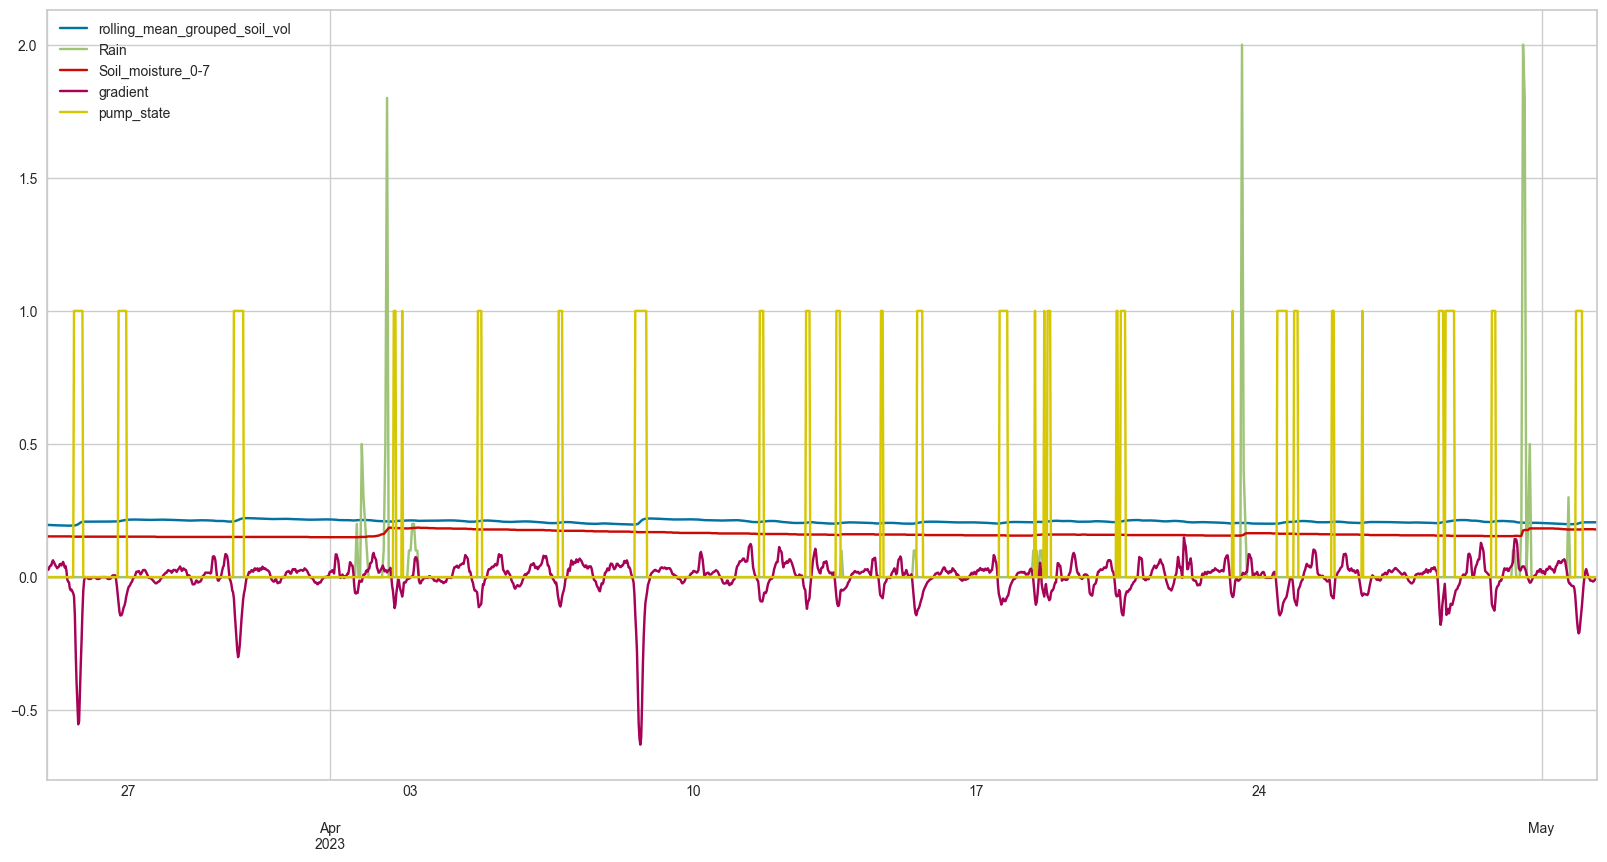

In [521]:
# visualize areas with downward slope
data_for_plot = data[['rolling_mean_grouped_soil_vol', 'Rain', 'Soil_moisture_0-7', 'gradient', 'pump_state']]#, 'Précipitations de la semaine(mm)', 'Précipitations du mois(mm)']]
#data_for_plot.reset_index(drop=True, inplace=True)
ax = data_for_plot.plot(figsize = (20,10)) #'grouped_resistance

In [522]:
data.dtypes

Temperature                       float64
Humidity                          float64
Rain                              float64
Cloudcover                        float64
Shortwave_Radiation               float64
Windspeed                         float64
Winddirection                     float64
Soil_temperature_7-28             float64
Soil_moisture_0-7                 float64
Et0_evapotranspiration            float64
grouped_soil                      float64
grouped_resistance                float64
grouped_soil_temp                 float64
rolling_mean_grouped_soil         float64
rolling_mean_grouped_soil_temp    float64
hour                                int64
minute                              int64
date                                int64
month                               int64
day_of_year                         int64
rolling_mean_grouped_soil_vol     float64
gradient                          float64
pump_state                          int64
NumericalIndex                    

In [523]:
data[['rolling_mean_grouped_soil_vol', 'Soil_moisture_0-7', 'Rain', data['rolling_mean_grouped_soil'].]].loc['2023-04-01 00:00:00':'2023-04-30 00:00:00'].plot(figsize = (20,10))

SyntaxError: invalid syntax (4174719262.py, line 1)

In [599]:
# Split dataset into train and test set
def split_data(data, split_date):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

train, test = split_data(data, pd.to_datetime('2023-04-25 15:30')) # splitting the data for training before 15th June

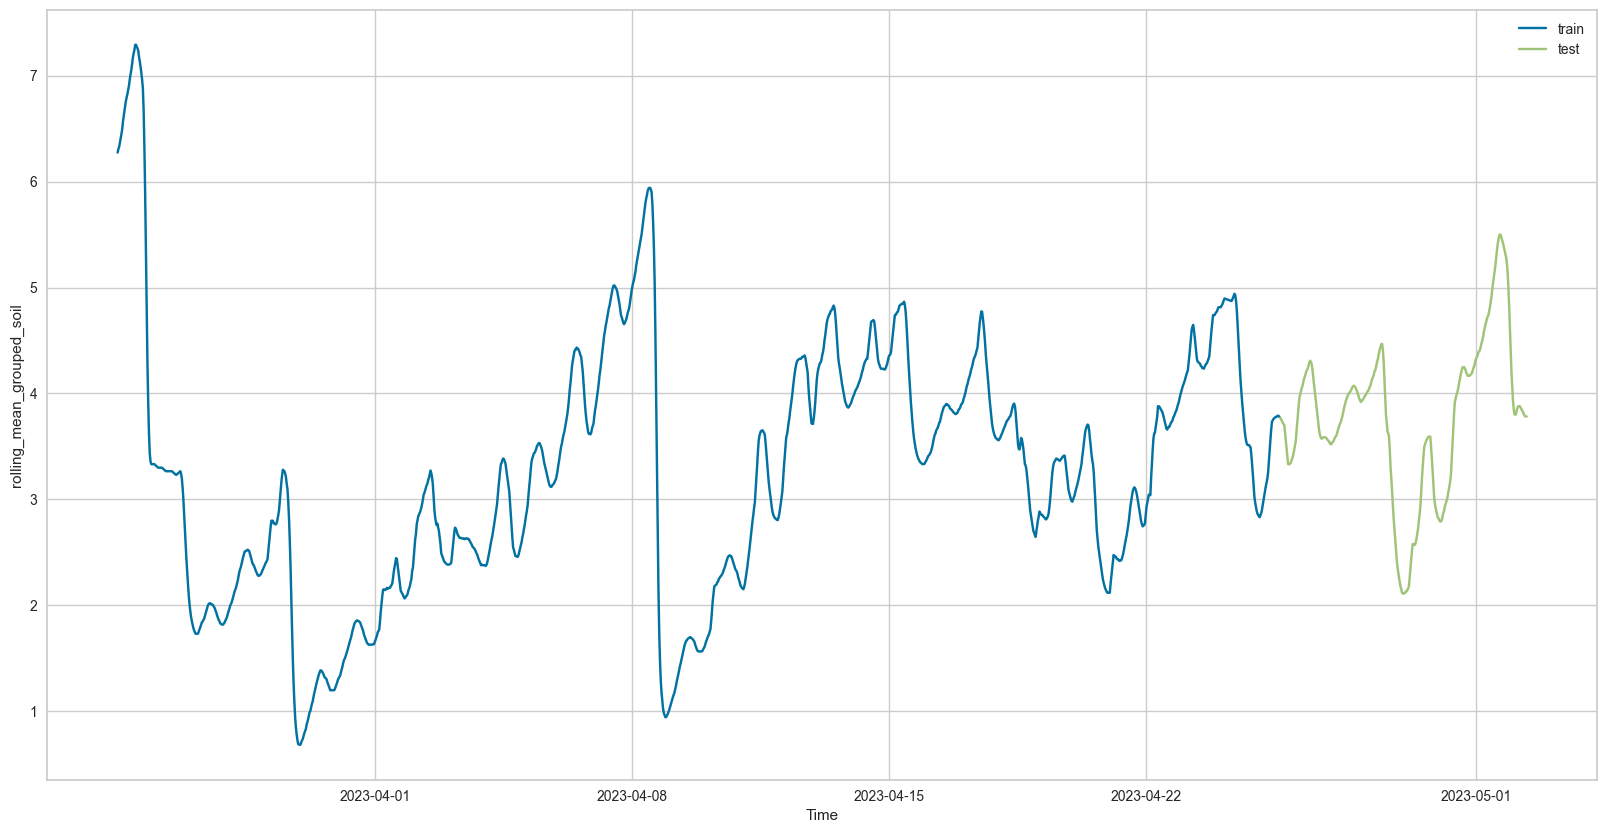

In [600]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('rolling_mean_grouped_soil')
plt.plot(train.index,train['rolling_mean_grouped_soil'],label='train')
plt.plot(test.index,test['rolling_mean_grouped_soil'],label='test')
plt.legend()
plt.show()

## Create lag features 
In this section lag features are created to increase the models performance with former soil drying examples.

### TODO: Omit lag features that are shorter than current dataframe or series.

## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. `Setup` has only one required parameter i.e. `data`. All the other parameters are optional.

Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Approach:**  Univariate or multivariate. <br/>
<br/>
- **Exogenous Variables:**  Exogeneous variables to be used in model. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [ ]:
data.dtypes

You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

In [ ]:
# import TSForecastingExperiment and init the class
#from pycaret.regression import *
from pycaret.time_series import *

exp = TSForecastingExperiment()
folds = 3     

# init setup on exp
exp.setup(
    data,#train, 
    target = 'rolling_mean_grouped_soil', 
    enforce_exogenous = True, 
    fold_strategy='sliding', 
    fh = 48, 
    session_id = 123, 
    fold = folds,
    use_gpu = False, # with GPU 3x longer times for compare_model() function
    ignore_features = ['NumericalIndex', 'minute'],#, 'grouped_soil', 'grouped_resistance', 'grouped_soil_temp', 'gradient'],#, 'hour', 'minute', 'date', 'month', 'day_of_year'],
    ignore_seasonality_test=False,
    #numeric_imputation_exogenous = 'mean'
)

In [ ]:
# compare baseline models
best = []

best = exp.compare_models(
    n_select = 10, 
    fold = folds, 
    sort = 'R2',# 
    verbose = 1#, 
    #exclude = ['lar_cds_dt', 'lr_cds_dt', 'auto_arima', 'arima', 'ridge_cds_dt', 'br_cds_dt', 'grand_means', 'croston', 'omp_cds_dt', 'theta', 'naive', 'snaive','ada_cds_dt', 'en_cds_dt'],
)

In [ ]:
for i in range(len(best)):
    print(best[i])

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only. 

___

# Regression pipeline

In [601]:
data_re = train
#data_re['Timestamp'] = data_re.index#data.index
data_re = data_re.drop(['NumericalIndex'],axis=1)
data_re.reset_index(drop=False, inplace=True)
data_re.rename(columns={'index': 'Timestamp'}, inplace=True)
#data_re['Timestamp']=pd.to_datetime(data_re['Timestamp'])

In [527]:
from pycaret.regression import *

re_exp = RegressionExperiment()

to_be_dropped = ['minute', 'Timestamp','gradient','grouped_soil','grouped_resistance','grouped_soil_temp']

s = re_exp.setup(data_re, 
              target = 'rolling_mean_grouped_soil', 
              session_id = 123,
              ignore_features = to_be_dropped,
              train_size = 0.8
             )

In [216]:
best_re = re_exp.compare_models(
    n_select = 12, 
    fold = 10, 
    sort = 'R2',
    verbose = 1,
    exclude=['lar']
)

Processing:   0%|          | 0/92 [00:00<?, ?it/s]

In [ ]:
# Train only catboost
catboost_model = re_exp.create_model('catboost')

In [602]:
# TODO: make variable timestaps work (sample_rate) 
forcast_horizon = 5 #days

start = data_re['Timestamp'].iloc[0]
print("start: ", start)
train_end = data_re['Timestamp'].iloc[-1]
print("train end before adding: ", train_end)
end = train_end+pd.Timedelta(days=forcast_horizon)
print("end after adding: ", end,"\n")
all_dates = pd.date_range(start=train_end, end=end, freq='60T') #str(sample_rate)+'T')    
print("all dates: ", all_dates,"\n")

start:  2023-03-25 00:00:00
train end before adding:  2023-04-25 15:30:00
end after adding:  2023-04-30 15:30:00 

all dates:  DatetimeIndex(['2023-04-25 15:30:00', '2023-04-25 16:00:00',
               '2023-04-25 16:30:00', '2023-04-25 17:00:00',
               '2023-04-25 17:30:00', '2023-04-25 18:00:00',
               '2023-04-25 18:30:00', '2023-04-25 19:00:00',
               '2023-04-25 19:30:00', '2023-04-25 20:00:00',
               ...
               '2023-04-30 11:00:00', '2023-04-30 11:30:00',
               '2023-04-30 12:00:00', '2023-04-30 12:30:00',
               '2023-04-30 13:00:00', '2023-04-30 13:30:00',
               '2023-04-30 14:00:00', '2023-04-30 14:30:00',
               '2023-04-30 15:00:00', '2023-04-30 15:30:00'],
              dtype='datetime64[ns]', length=241, freq='30T') 



In [603]:
data_weather_api_cut = (data_weather_api.loc[train_end:end])
print("Length of data_weather_api_cut:",len(data_weather_api_cut))
print(data_weather_api_cut.head(1))
print(data_weather_api_cut.tail(1))
data_weather_api_cut.head(10)

Length of data_weather_api_cut: 241
                     Temperature  Humidity  Rain  Cloudcover  \
date                                                           
2023-04-25 15:30:00         29.5      16.0   0.0        47.5   

                     Shortwave_Radiation  Windspeed  Winddirection  \
date                                                                 
2023-04-25 15:30:00                447.5        7.9          162.5   

                     Soil_temperature_7-28  Soil_moisture_0-7  \
date                                                            
2023-04-25 15:30:00                   20.4              0.161   

                     Et0_evapotranspiration  
date                                         
2023-04-25 15:30:00                    0.39  
                     Temperature  Humidity  Rain  Cloudcover  \
date                                                           
2023-04-30 15:30:00        24.35      43.5   0.1        53.0   

                     Shortwave_Ra

Temperature  Humidity  Rain  Cloudcover  \
date                                                           
2023-04-25 15:30:00        29.50      16.0   0.0        47.5   
2023-04-25 16:00:00        29.20      16.0   0.0        42.0   
2023-04-25 16:30:00        28.80      17.0   0.0        30.0   
2023-04-25 17:00:00        28.40      18.0   0.0        18.0   
2023-04-25 17:30:00        27.25      19.5   0.0        22.0   
2023-04-25 18:00:00        26.10      21.0   0.0        26.0   
2023-04-25 18:30:00        24.50      23.5   0.0        19.5   
2023-04-25 19:00:00        22.90      26.0   0.0        13.0   
2023-04-25 19:30:00        21.95      30.0   0.0        12.0   
2023-04-25 20:00:00        21.00      34.0   0.0        11.0   

                     Shortwave_Radiation  Windspeed  Winddirection  \
date                                                                 
2023-04-25 15:30:00                447.5       7.90          162.5   
2023-04-25 16:00:00                344.0       8.60            2.0   
2023-04-25 16:30:00                266.5       9.90           11.5   
2023-04-25 17:00:00                189.0      11.20           21.0   
2023-04-25 17:30:00                119.5      12.30           24.0   
2023-04-25 18:00:00                 50.0      13.40           27.0   
2023-04-25 18:30:00                 25.0      12.05           37.5   
2023-04-25 19:00:00                  0.0      10.70           48.0   
2023-04-25 19:30:00                  0.0       9.15           59.5   
2023-04-25 20:00:00                  0.0       7.60           71.0   

                     Soil_temperature_7-28  Soil_moisture_0-7  \
date                                                            
2023-04-25 15:30:00                   20.4             0.1610   
2023-04-25 16:00:00                   20.5             0.1610   
2023-04-25 16:30:00                   20.6             0.1610   
2023-04-25 17:00:00                   20.7             0.1610   
2023-04-25 17:30:00                   20.8             0.1610   
2023-04-25 18:00:00                   20.9             0.1610   
2023-04-25 18:30:00                   20.9             0.1605   
2023-04-25 19:00:00                   20.9             0.1600   
2023-04-25 19:30:00                   20.9             0.1600   
2023-04-25 20:00:00                   20.9             0.1600   

                     Et0_evapotranspiration  
date                                         
2023-04-25 15:30:00                   0.390  
2023-04-25 16:00:00                   0.330  
2023-04-25 16:30:00                   0.295  
2023-04-25 17:00:00                   0.260  
2023-04-25 17:30:00                   0.225  
2023-04-25 18:00:00                   0.190  
2023-04-25 18:30:00                   0.150  
2023-04-25 19:00:00                   0.110  
2023-04-25 19:30:00                   0.090  
2023-04-25 20:00:00                   0.070

In [604]:
new_data = (pd.DataFrame())

# weather forecast 
new_data.index = all_dates
new_data = pd.concat([new_data, data_weather_api_cut], axis=1)
new_data.reset_index(inplace=True)  # Reset the index
new_data.rename(columns={'index': 'Timestamp'}, inplace=True)

# dates
new_data['hour'] = [i.hour for i in new_data['Timestamp']]
# new_data['minute'] = [i.minute for i in new_data.index] #minute is not important
new_data['date'] = [i.day for i in new_data['Timestamp']]
new_data['month'] = [i.month for i in new_data['Timestamp']]
new_data['day_of_year'] = [i.dayofyear for i in new_data['Timestamp']]

# make up some other data from weatherAPI
new_data['rolling_mean_grouped_soil_vol'] = new_data['Soil_moisture_0-7']
new_data['rolling_mean_grouped_soil_temp'] = new_data['Soil_temperature_7-28']

# also include pump_state
test_timestamp = test.copy()
test_timestamp.loc[train_end:end]
test_timestamp.reset_index(drop=False, inplace=True)
test_timestamp.rename(columns={'index': 'Timestamp'}, inplace=True)
new_data = pd.merge(new_data, test_timestamp[['Timestamp', 'pump_state']], on='Timestamp', how='inner')

In [605]:
# Identify missing columns in the prediction data
missing_columns = set(data_re.columns) - set(new_data.columns) #data.columns
missing_columns.remove('rolling_mean_grouped_soil') # use array from setup function
#missing_columns.remove('Timestamp')
#missing_columns.remove('NumericalIndex')
#missing_columns.drop(columns=to_be_dropped,inplace=True)
missing_columns.remove('gradient')
missing_columns.remove('grouped_soil')
missing_columns.remove('grouped_resistance')
missing_columns.remove('grouped_soil_temp')
missing_columns.remove('minute')

print(missing_columns)
print(to_be_dropped)

# drop missing
for col in missing_columns:
    new_data.drop(columns = col, inplace=True)

#new_data.head()

set()
['minute', 'Timestamp', 'gradient', 'grouped_soil', 'grouped_resistance', 'grouped_soil_temp']


In [606]:
print(new_data.columns)
new_data.head()

Index(['Timestamp', 'Temperature', 'Humidity', 'Rain', 'Cloudcover',
       'Shortwave_Radiation', 'Windspeed', 'Winddirection',
       'Soil_temperature_7-28', 'Soil_moisture_0-7', 'Et0_evapotranspiration',
       'hour', 'date', 'month', 'day_of_year', 'rolling_mean_grouped_soil_vol',
       'rolling_mean_grouped_soil_temp', 'pump_state'],
      dtype='object')


Timestamp  Temperature  Humidity  Rain  Cloudcover  \
0 2023-04-25 16:00:00        29.20      16.0   0.0        42.0   
1 2023-04-25 16:30:00        28.80      17.0   0.0        30.0   
2 2023-04-25 17:00:00        28.40      18.0   0.0        18.0   
3 2023-04-25 17:30:00        27.25      19.5   0.0        22.0   
4 2023-04-25 18:00:00        26.10      21.0   0.0        26.0   

   Shortwave_Radiation  Windspeed  Winddirection  Soil_temperature_7-28  \
0                344.0        8.6            2.0                   20.5   
1                266.5        9.9           11.5                   20.6   
2                189.0       11.2           21.0                   20.7   
3                119.5       12.3           24.0                   20.8   
4                 50.0       13.4           27.0                   20.9   

   Soil_moisture_0-7  Et0_evapotranspiration  hour  date  month  day_of_year  \
0              0.161                   0.330    16    25      4          115   
1              0.161                   0.295    16    25      4          115   
2              0.161                   0.260    17    25      4          115   
3              0.161                   0.225    17    25      4          115   
4              0.161                   0.190    18    25      4          115   

   rolling_mean_grouped_soil_vol  rolling_mean_grouped_soil_temp  pump_state  
0                          0.161                            20.5           0  
1                          0.161                            20.6           0  
2                          0.161                            20.7           0  
3                          0.161                            20.8           0  
4                          0.161                            20.9           0

In [607]:
# calculate predictions with new data
predictions = []
for i in range(len(best_re)):
    predictions.append(re_exp.predict_model(best_re[i], data=new_data))

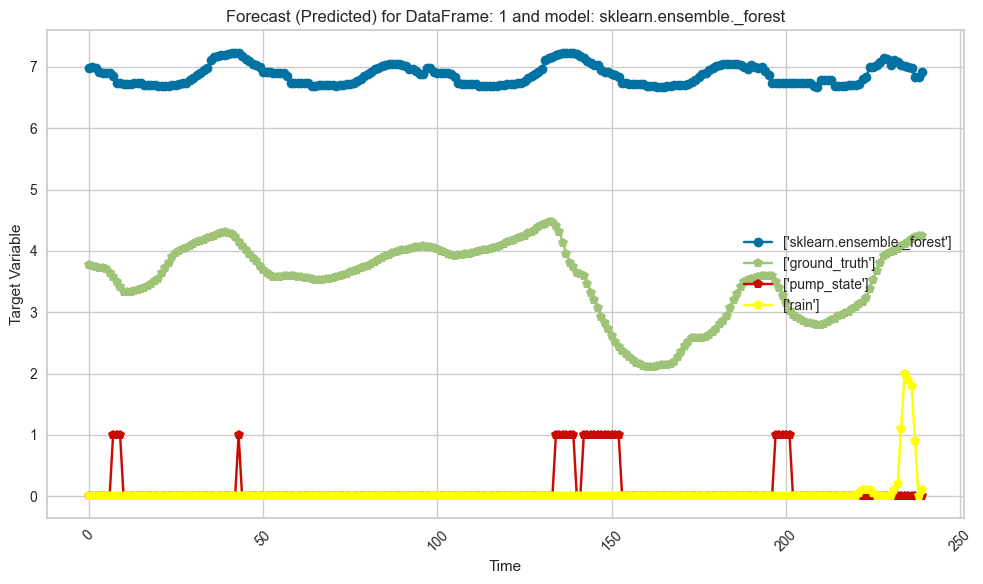

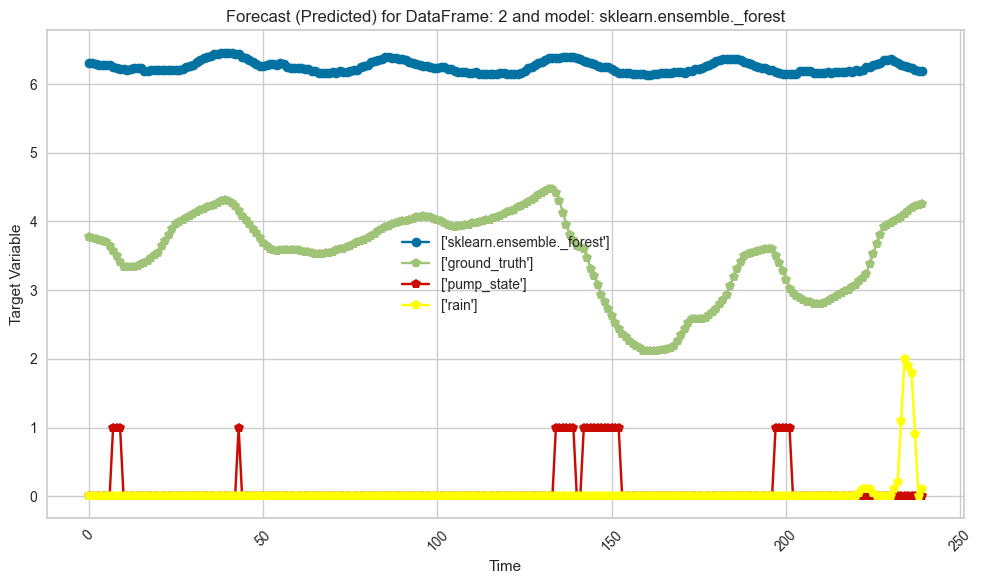

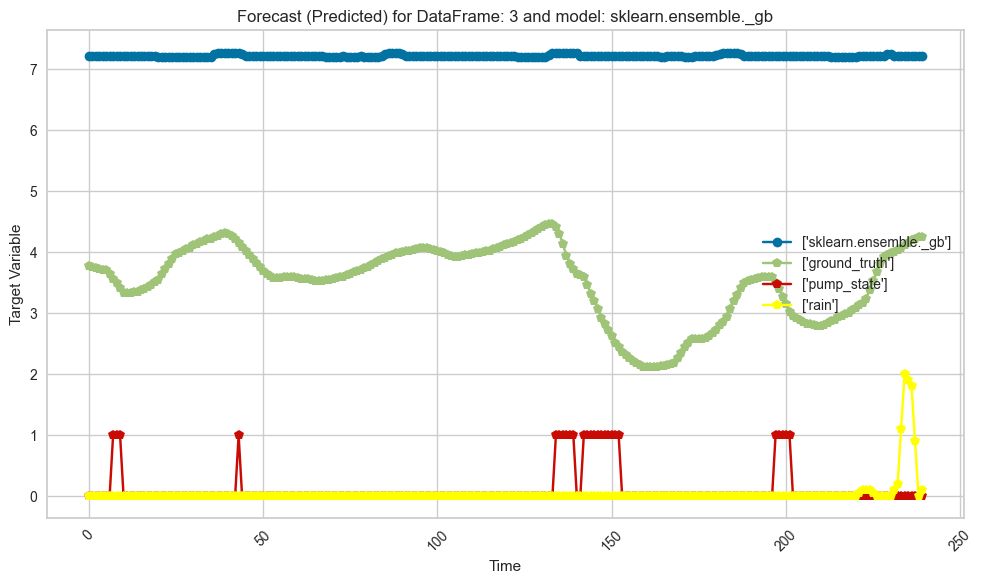

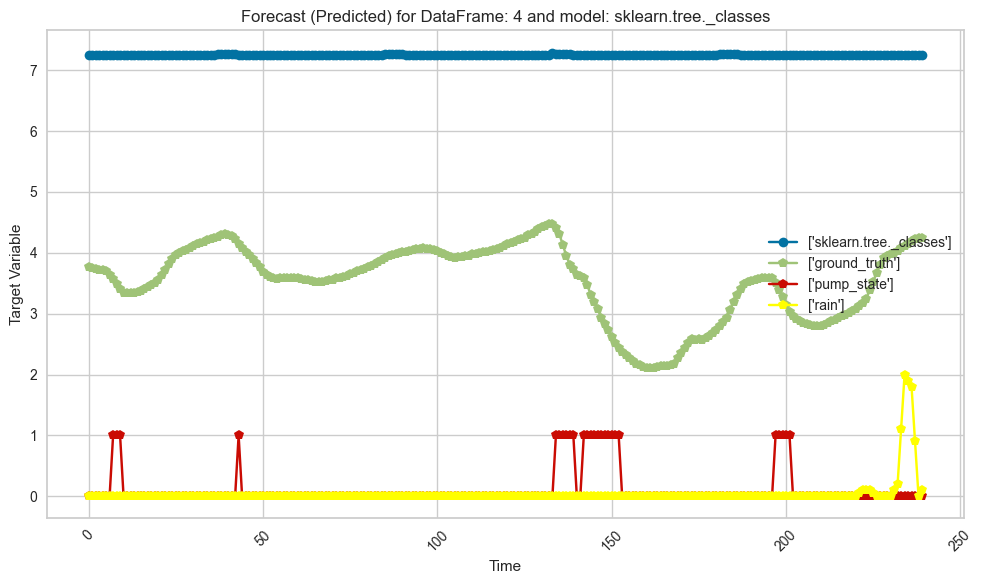

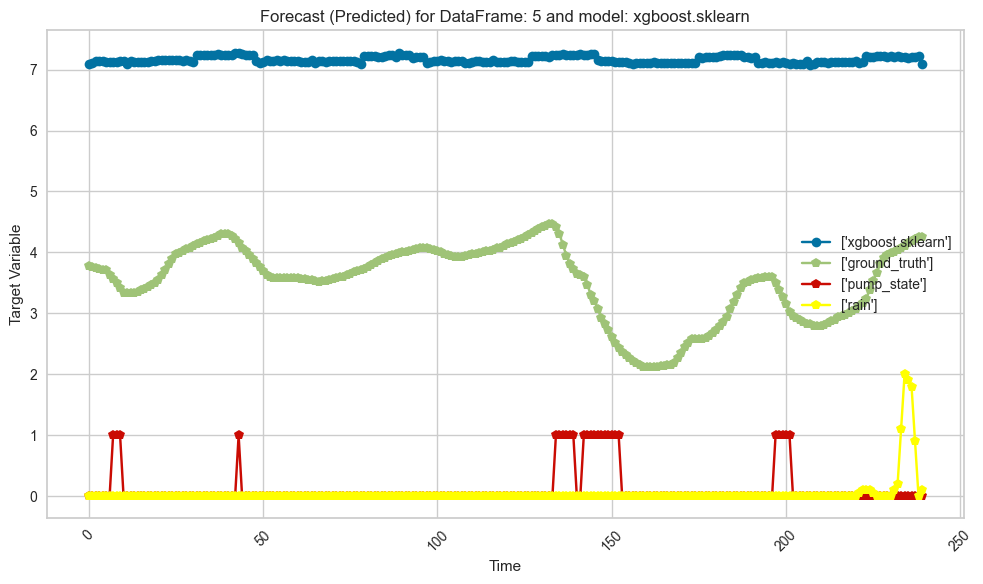

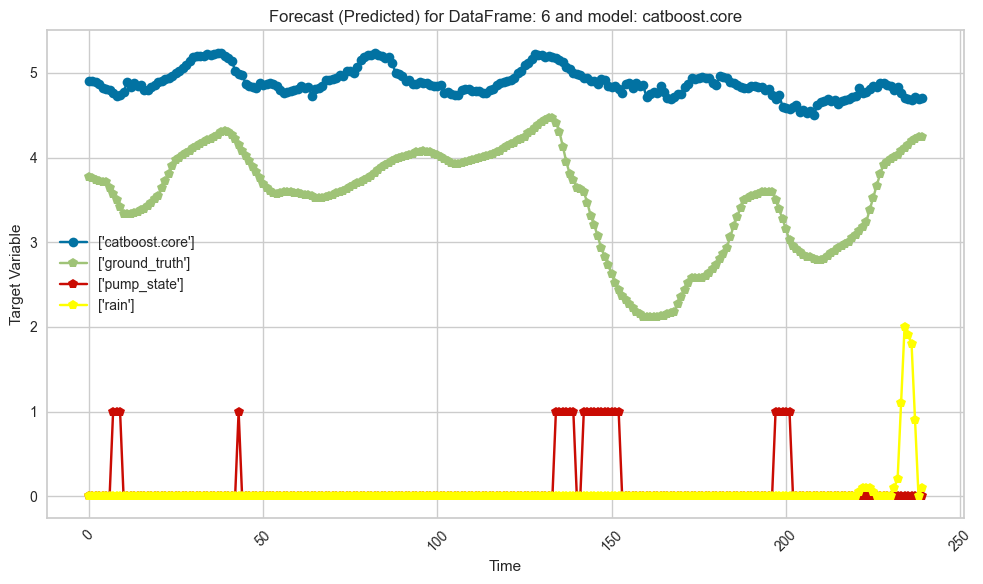

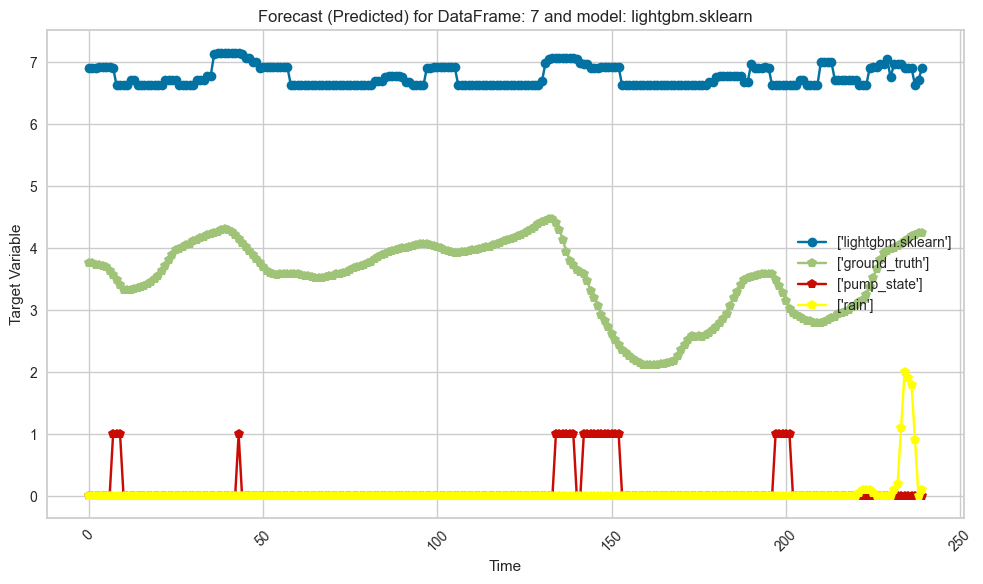

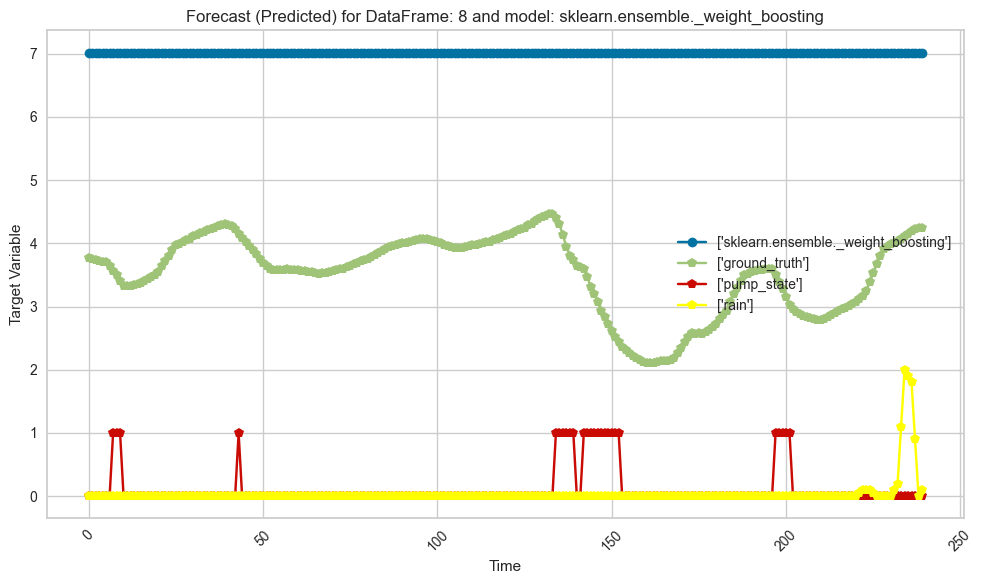

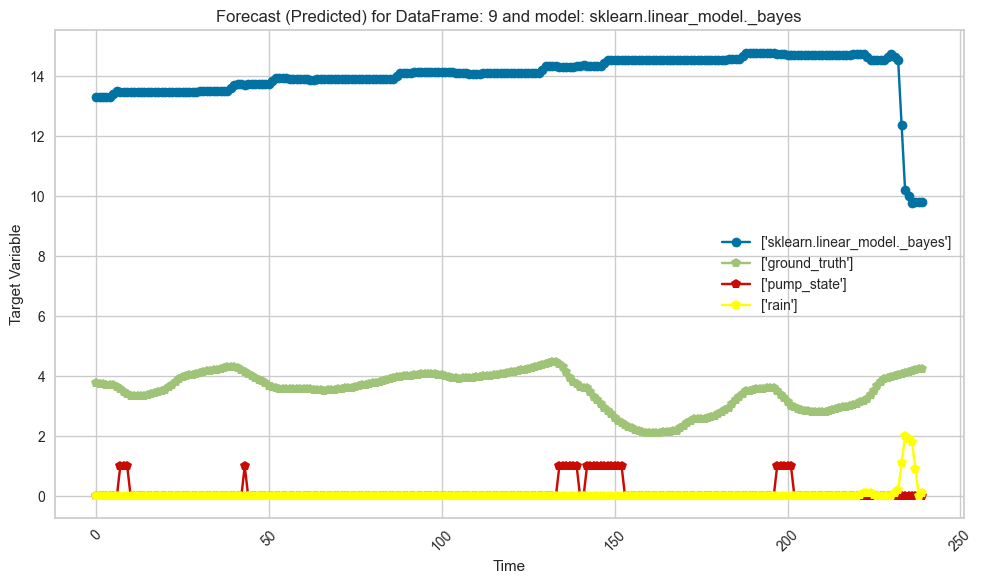

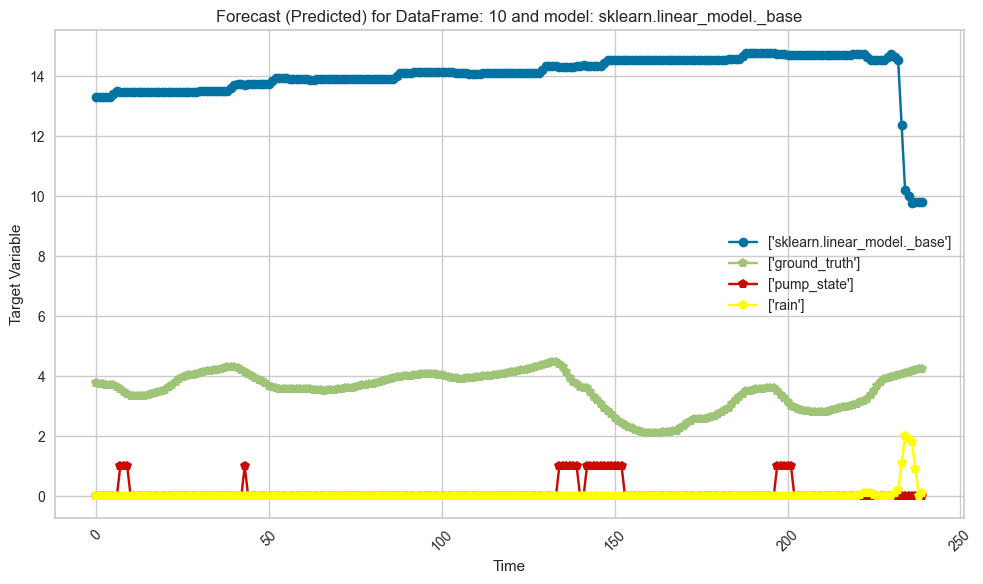

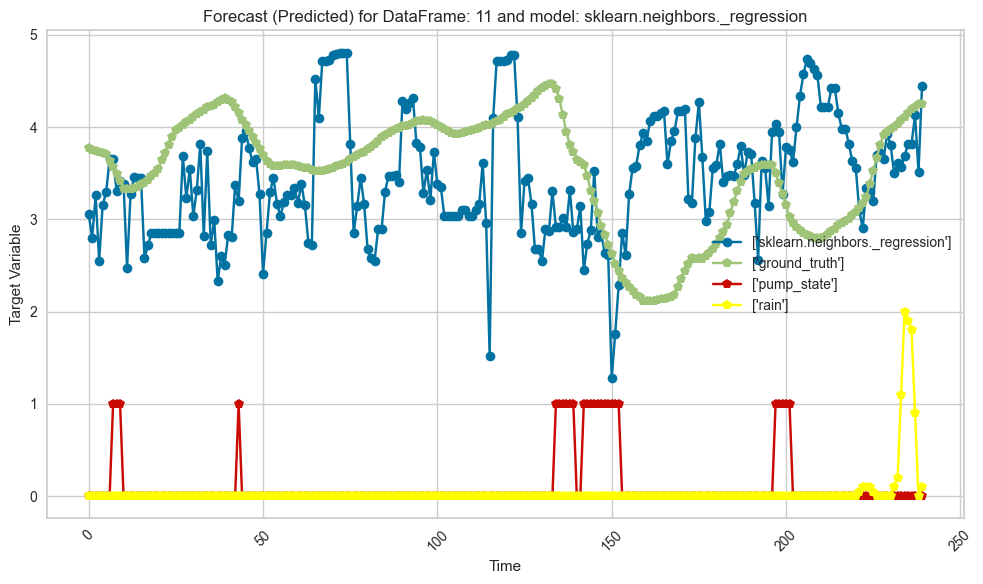

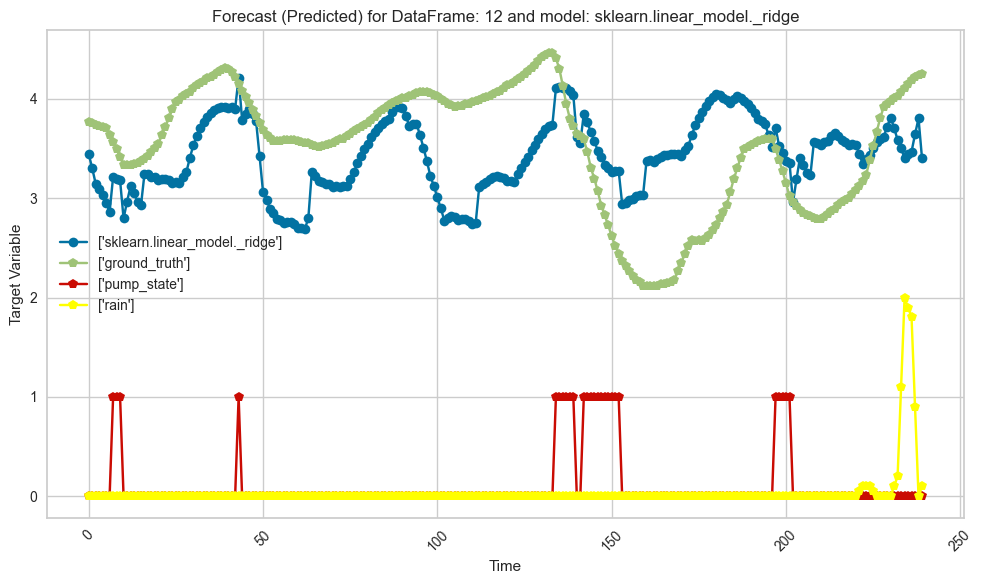

In [608]:
for i in range(len(best_re)):
    plt.figure(figsize=(10, 6))
    plt.plot(predictions[i].index, predictions[i]['prediction_label'], label=[best_re[i].__module__], marker='o')
    plt.plot(predictions[i].index, test['rolling_mean_grouped_soil'].iloc[:len(predictions[i]['prediction_label'])], label=['ground_truth'], marker='p')
    plt.plot(predictions[i].index, test['pump_state'].iloc[:len(predictions[i]['prediction_label'])], label=['pump_state'], marker='p')
    plt.plot(predictions[i].index, test['Rain'].iloc[:len(predictions[i]['prediction_label'])], label=['rain'], marker='p', color='yellow')
    plt.xlabel('Time')
    plt.ylabel('Target Variable')
    plt.title('Forecast (Predicted) for DataFrame: '+ str(i+1) + ' and model: ' + best_re[i].__module__)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [609]:
test = test.loc[train_end:end]
test.reset_index(drop=False, inplace=True)
test.rename(columns={'index': 'Timestamp'}, inplace=True)

In [610]:
test.head()

Timestamp  Temperature  Humidity  Rain  Cloudcover  \
0 2023-04-25 16:00:00        29.20      16.0   0.0        42.0   
1 2023-04-25 16:30:00        28.80      17.0   0.0        30.0   
2 2023-04-25 17:00:00        28.40      18.0   0.0        18.0   
3 2023-04-25 17:30:00        27.25      19.5   0.0        22.0   
4 2023-04-25 18:00:00        26.10      21.0   0.0        26.0   

   Shortwave_Radiation  Windspeed  Winddirection  Soil_temperature_7-28  \
0                344.0        8.6            2.0                   20.5   
1                266.5        9.9           11.5                   20.6   
2                189.0       11.2           21.0                   20.7   
3                119.5       12.3           24.0                   20.8   
4                 50.0       13.4           27.0                   20.9   

   Soil_moisture_0-7  ...  rolling_mean_grouped_soil_temp  hour  minute  date  \
0              0.161  ...                       22.970522    16       0    25   
1              0.161  ...                       23.142484    16      30    25   
2              0.161  ...                       23.279739    17       0    25   
3              0.161  ...                       23.418625    17      30    25   
4              0.161  ...                       23.540856    18       0    25   

   month  day_of_year  rolling_mean_grouped_soil_vol  gradient  pump_state  \
0      4          115                       0.206144 -0.010765           0   
1      4          115                       0.206222 -0.016133           0   
2      4          115                       0.206306 -0.015600           0   
3      4          115                       0.206378 -0.012866           0   
4      4          115                       0.206434 -0.009478           0   

   NumericalIndex  
0            1520  
1            1521  
2            1522  
3            1523  
4            1524  

[5 rows x 25 columns]

In [613]:
print(predictions[0]['prediction_label'].head())
print(test['rolling_mean_grouped_soil'].head())

0    6.975915
1    7.001780
2    6.986345
3    6.920334
4    6.898070
Name: prediction_label, dtype: float64
0    3.771155
1    3.755556
2    3.738889
3    3.724356
4    3.713156
Name: rolling_mean_grouped_soil, dtype: float64


In [614]:
# evaluate performance of prediction against test part of data
def evaluate_target_variable(series1, series2):
    # drop missing
    values1 = series1.dropna()
    values2 = series2.dropna()

    # calc max length
    min_length = min(len(values1), len(values2))
    values1 = values1[:min_length]
    values2 = values2[:min_length]

    # test print
    #print(values1)
    #print(values2)
    
    # MAE, RMSE, MPE
    diff = np.abs(values1.values - values2.values)
    mae = np.mean(diff)
    rmse = np.sqrt(np.mean(diff ** 2))
    mpe = np.mean(diff / values1.values) * 100

    # R2
    mean_series1 = np.mean(series1)
    ss_total = np.sum((series1 - mean_series1) ** 2)
    ss_residual = np.sum((series1 - series2) ** 2)
    r2_score = 1 - (ss_residual / ss_total)

    # print metrics
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MPE: {mpe:.2f} %")
    print(f"R2 {r2_score:.2f}",'\n')
    #print("df1 len:",len(values1),"df2 len:",len(values2),'\n')

for i in range(len(best_re)):
    print(best_re[i].__module__)
    evaluate_target_variable(test['rolling_mean_grouped_soil'], predictions[i]['prediction_label'])

sklearn.ensemble._forest
MAE: 3.34
RMSE: 3.39
MPE: 101.55 %
R2 -29.75 

sklearn.ensemble._forest
MAE: 2.72
RMSE: 2.78
MPE: 83.50 %
R2 -19.73 

sklearn.ensemble._gb
MAE: 3.69
RMSE: 3.74
MPE: 112.21 %
R2 -36.48 

sklearn.tree._classes
MAE: 3.73
RMSE: 3.78
MPE: 113.38 %
R2 -37.27 

xgboost.sklearn
MAE: 3.64
RMSE: 3.68
MPE: 110.48 %
R2 -35.34 

catboost.core
MAE: 1.36
RMSE: 1.46
MPE: 43.15 %
R2 -4.73 

lightgbm.sklearn
MAE: 3.24
RMSE: 3.29
MPE: 98.78 %
R2 -28.10 

sklearn.ensemble._weight_boosting
MAE: 3.48
RMSE: 3.54
MPE: 106.18 %
R2 -32.54 

sklearn.linear_model._bayes
MAE: 10.52
RMSE: 10.59
MPE: 315.11 %
R2 -299.58 

sklearn.linear_model._base
MAE: 10.52
RMSE: 10.59
MPE: 315.14 %
R2 -299.64 

sklearn.neighbors._regression
MAE: 0.79
RMSE: 0.96
MPE: 24.52 %
R2 -1.49 

sklearn.linear_model._ridge
MAE: 0.59
RMSE: 0.69
MPE: 18.39 %
R2 -0.29 



### Notes:
Catboost seems to be the most promising, use it..

With normalization the metrics are better, but the curve is not represented in a articulated way.

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [ ]:
# plot forecast
exp.plot_model(best, plot = 'forecast')

In [ ]:
# plot forecast for 36 months in future
exp.plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 240})

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

X = data_re.drop(['rolling_mean_grouped_soil', 'minute', 'grouped_soil', 'grouped_resistance', 'grouped_soil_temp', 'gradient', 'Timestamp'],axis=1)
y = data_re['rolling_mean_grouped_soil']

# Assuming you have already trained the XGBoost model
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X, y)  # Replace X and y with your training data

# Plot feature importance
xgb.plot_importance(xgboost_model)
plt.show()

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

## Prediction
The `predict_model` function returns `y_pred`. When data is `None` (default), it uses `fh` as defined during the `setup` function. 

In [ ]:
# predict on test set
holdout_pred = []
for i in range(len(best)):
    holdout_pred.append(exp.predict_model(best[i], fh = 240)) # 5 (days) * 2 (readings per hour) * 24 (hours) = 240 (readings in five days)

In [ ]:
# show predictions df
for i in range(len(holdout_pred)):
    print("Model: " + str(i+1))
    print(holdout_pred[i].head(100))
    print(holdout_pred[i].tail(100))

In [ ]:
len(holdout_pred[len(holdout_pred)-1]) # same as forecast_horizon!!!

In [ ]:
was_reached = False
last_df = holdout_pred[len(holdout_pred)-1]
last_df_len = len(last_df) # same as forecast horizon

# calculate 
for i in range(last_df_len):
    if last_df['y_pred'][i] > tension_threshold:
        print("Threshold will be reached on", last_df.index[i], "With a value of:", last_df['y_pred'][i])
        was_reached = True
        break
    if was_reached == False and last_df_len-1 == i:
        print("Threshold is not expected to reached in the coming 5 days!")
        break

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
for i in range(len(best)):
    exp.save_model(best[i], 'all_in_one' + str(i))

In [ ]:
# load pipeline
loaded_best_pipeline = []
for i in range(len(best)): # TODO: exp will not work if it is not set before, use OS later
    loaded_best_pipeline.append(load_model('my_weather_SPLIT_pipeline_TS_' + str(i)))
    loaded_best_pipeline

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. `Setup` has only one required parameter i.e. `data`. All the other parameters are optional.

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [ ]:
# check all available config
print(dir(exp.get_config()))
#exp[0].get_config('memory')

In [ ]:
# lets access y_train_transformed
print(exp.get_config('y_train_transformed'))
print(exp.get_config('X_train'))

In [ ]:
# another example: let's access seed
#print("The current seed is: {}".format(exp[0].get_config('seed')))

# now lets change it using set_config
#set_config('seed', 786)
#print("The new seed is: {}".format(get_config('seed')))

All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

## ✅  Check Stats
The `check_stats` function is used to get summary statistics and run statistical tests on the original data or model residuals.

In [ ]:
# check stats on original data, swap index of exp to see stats-> otherwise use print->ugly
exp.check_stats()

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# train a dt model with default params
#dt = create_model('dt_cds_dt')
for i in range(len(best)):
    print("Model: ", i+1)
    print(best[i])

In [ ]:
best[0].__module__

In [ ]:
# tune hyperparameters of best without grid
def tune_all_without_grid(best):
    tuned_best_models_array = []
    for j in range(len(exp)):
        tuned_best_models = []
        for i in range(len(best[j])):
            if re.search(r"^pycaret", best[j][i].__module__):
                print("This is for DataFrame", j+1, "This is for the",i+1,".best model:",best[j][i])
                tuned_best_models.append(exp[j].tune_model(best[j][i])) #TODO: Problem: not all estimators allow tuning without grid
            else:
                print("Cannot tune without grid:",best[j][i])
        tuned_best_models_array.append(tuned_best_models)
    return tuned_best_models_array
        
tuned_best_models_array = tune_all_without_grid(best)

Metric to optimize can be defined in `optimize` parameter (default = 'MASE'). Also, a custom tuned grid can be passed with `custom_grid` parameter. 

In [ ]:
len(tuned_best_models_array)

In [ ]:
for j in range(len(tuned_best_models_array)):
    print("Dataset: ",j+1,"\n------------")
    for i in range(len(tuned_best_models_array[j])):
        print(i+1,". :",tuned_best_models_array[j][i])

In [ ]:
current = best[0][0]
print(str(current.regressor), type(str(current.regressor)))
print(current.get_params().keys())
print(type(current).__name__)
print(type(current).__name__.split('.')[-1])
print(exp[0].models(internal = True).Name)

In [ ]:
for model in best[0]:
    column_reference = data.columns[0]
    print(model.__class__.__name__, column_reference)

In [ ]:
models = {'huber_cds_dt': 'HuberRegressor',
          'naive': 'NaiveBayes',
          'snaive': 'SeasonalNaiveBayes',
          'dt_cds_dt': 'DecisionTreeRegressor',
          'xgboost_cds_dt': 'XGBoostRegressor',
          'et_cds_dt': 'ExtraTreesRegressor',
          'lightgbm_cds_dt': 'LGBMRegressor',
          'gbr_cds_dt': 'GradientBoostingRegressor',
          'par_cds_dt': 'PassiveAggressiveRegressor',
          'ada_cds_dt': 'AdaBoostRegressor',
          'rf_cds_dt': 'RandomForestRegressor',
          'knn_cds_dt': 'KNeighborsRegressor',
          'catboost_cds_dt': 'catboost',
          'en_cds_dt': 'ElasticNet',
          'lasso_cds_dt': 'Lasso',
          'llar_cds_dt': 'LassoLars',
          'xgboost_cds_dt': 'XGBRegressor' 
}

models_dict = {v: k for k, v in models.items()}

print("Original dictionary:")
print(models)
print("\nSwapped dictionary:")
print(models_dict)

In [ ]:
# define tuning grid -> no grid for model defined, TODO: come back later
#grid = {'regressor__max_depth' : [None, 2, 4, 6, 8, 10, 12]}
#sp = {'regressor__max_depth' : [None, 2, 4, 6, 8, 10, 12]}
# define the custom grid
param_grid_linear = {
    'degree': [1, 2, 3],
    'deseasonal_model': ['multiplicative', 'additive'],
    #'fe_target_rr': [True, False],
    #'regressor__copy_X': [True, False],
    #'regressor__fit_intercept': [True, False],
    'regressor__n_jobs': [-1, 1, 2],
    #'regressor__normalize': [True, False],
    'regressor__positive': [True, False],
    'sp': [1, 2, 3],
    'window_length': [10, 20, 30]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

params_grid = {
    'naive_bayes': {
        'alpha': [0.1, 0.5, 1.0],
        'fit_prior': [True, False]
    },
    'linear_regression': {
        'fit_intercept': [True, False],
        'normalize': [True, False]
    },
    'ridge': {
        'alpha': [0.1, 0.5, 1.0],
        'fit_intercept': [True, False],
        'normalize': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'lasso': {
        'alpha': [0.1, 0.5, 1.0],
        'fit_intercept': [True, False],
        'normalize': [True, False],
        'selection': ['cyclic', 'random']
    },
    'elastic_net': {
        'alpha': [0.1, 0.5, 1.0],
        'l1_ratio': [0.1, 0.5, 0.9],
        'fit_intercept': [True, False],
        'normalize': [True, False],
        'selection': ['cyclic', 'random']
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [15, 20, 30, 40]
    },
    'decision_tree': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'random_forest': {
        'n_estimators': [10, 50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'gradient_boosting': {
        'n_estimators': [10, 50, 100],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.5, 0.7, 1],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'support_vector': {
        'C': [0.1, 0.5, 1.0],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }
}

In [ ]:
# TODO: add content to the missing ones
params_grid_idNames = {
    'huber_cds_dt': {
        'regressor__epsilon': [1.35, 1.5, 1.75],
        'regressor__max_iter': [100, 200, 300],
        'regressor__alpha': [0.0001, 0.001, 0.01],
        'regressor__warm_start': [True, False]
    },
    'naive': { #not used, adpot
        'estimator__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'snaive': { #not used, adpot
        'estimator__sp': [2, 3, 4, 5, 6],
        'estimator__window_length': [2, 3, 4, 5, 6],
        'alpha': [0.1, 0.5, 1.0],
        'fit_intercept': [True, False],
        'normalize': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'dt_cds_dt': {
        'regressor__ccp_alpha': [0.0, 0.1, 0.2],
        'regressor__criterion': ['poisson', 'friedman_mse', 'squared_error', 'absolute_error'],
        'regressor__max_depth': [None, 5, 10, 15, 20],
        'regressor__max_features': ['auto', 'sqrt', 'log2'],
        'regressor__max_leaf_nodes': [None, 5, 10, 15, 20],
        'regressor__min_impurity_decrease': [0.0, 0.1, 0.2],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
        'regressor__random_state': [None, 123],
        'regressor__splitter': ['best', 'random'],
        'degree': [1, 2, 3],
        'deseasonal_model': ['multiplicative', 'additive'],
        'sp': [1, 2, 3],
        'window_length': [2, 3, 4],
    },
#    'xgboost_cds_dt': {
#        'alpha': [0.1, 0.5, 1.0],
#        'l1_ratio': [0.1, 0.5, 0.9],
#        'fit_intercept': [True, False],
#        'normalize': [True, False],
#        'selection': ['cyclic', 'random']
#    },
    'et_cds_dt': {
        'regressor__n_estimators': [10, 50, 100],
        'regressor__criterion': ['poisson', 'friedman_mse', 'squared_error', 'absolute_error'],
        'regressor__max_depth': [None, 5, 10, 20],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__bootstrap': [True, False]
    },
    'lightgbm_cds_dt': {
        'regressor__learning_rate': [0.01, 0.1, 0.3],
        'regressor__n_estimators': [50, 100, 150],
        'regressor__max_depth': [3, 5, 7],
        'regressor__num_leaves': [10, 20, 30],
        'regressor__min_child_samples': [1, 5, 10],
        'regressor__subsample': [0.5, 0.7, 0.9],
        'regressor__colsample_bytree': [0.5, 0.7, 0.9],
        'regressor__reg_alpha': [0, 0.1, 0.5, 1],
        'regressor__reg_lambda': [0, 0.1, 0.5, 1],
        'regressor__min_split_gain': [0, 0.1, 0.5],
        'regressor__max_bin': [100, 200, 300]
    },
    'gbr_cds_dt': {
        'regressor__n_estimators': [50, 100, 150],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.1, 0.3],
        'regressor__subsample': [0.5, 0.7, 0.9],
        'regressor__max_features': ['auto', 'sqrt', 'log2'],
        'regressor__alpha': [0.1, 0.3, 0.5],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__max_leaf_nodes': [None, 5, 10, 20]
    },
    'par_cds_dt': { #not used, adpot
        'C': [0.1, 1, 10],
        'fit_intercept': [True, False],
        'max_iter': [1000, 2000, 3000],
        'tol': [1e-3, 1e-4, 1e-5],
        'early_stopping': [True, False],
        'validation_fraction': [0.1, 0.2, 0.3],
        'n_iter_no_change': [5, 10, 15],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']

    },
    'ada_cds_dt': {#Valid parameters are: ['base_estimator', 'estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'].
        #'regressor__base_estimator': ['None'],
        'regressor__n_estimators': [10, 50, 100],
        'regressor__learning_rate': [0.01, 0.1, 1],
        'regressor__loss': ['linear', 'square', 'exponential'],
        'regressor__random_state': [123],
        'regressor__base_estimator': [None]
    },
    'rf_cds_dt': {
        'regressor__ccp_alpha': [0.0, 0.1, 0.2],
        'regressor__criterion': ['poisson', 'friedman_mse', 'squared_error', 'absolute_error'],
        'regressor__max_depth': [None, 5, 10, 15, 20],
        'regressor__max_features': ['auto', 'sqrt', 'log2'],
        'regressor__max_leaf_nodes': [None, 5, 10, 15, 20],
        'regressor__min_impurity_decrease': [0.0, 0.1, 0.2],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
        'regressor__random_state': [None, 123],
    },
    'knn_cds_dt': { #not used, adpot
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [15, 20, 30, 40]
    },
    'catboost_cds_dt': {
        'regressor__iterations': [100, 200, 300],
        'regressor__learning_rate': [0.01, 0.1, 0.5],
        'regressor__depth': [4, 6, 8],
        'regressor__l2_leaf_reg': [1, 3, 5],
        'regressor__subsample': [0.5, 0.7, 1],
        'regressor__random_strength': [0.1, 0.5, 1],
        'regressor__eval_metric': ['RMSE', 'MAE', 'Poisson'],
        'regressor__iterations': [100, 200, 300],
        'regressor__learning_rate': [0.01, 0.1, 0.5],
        'regressor__depth': [4, 6, 8],
        'regressor__l2_leaf_reg': [1, 3, 5],
        'regressor__subsample': [0.5, 0.7, 1],
        'regressor__random_strength': [0.1, 0.5, 1],
    },
    'en_cds_dt': { #not used, adpot
        'n_estimators': [10, 50, 100],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.5, 0.7, 1],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'lasso_cds_dt': { #not used, adpot
        'C': [0.1, 0.5, 1.0],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    },
    'llar_cds_dt': { #not used, adpot
        'n_estimators': [10, 50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'xgboost_cds_dt': {
        'regressor__learning_rate': [0.01, 0.1, 0.3],
        'regressor__n_estimators': [50, 100, 150],
        'regressor__max_depth': [3, 5, 7],
        'regressor__subsample': [0.5, 0.7, 0.9],
        'regressor__colsample_bytree': [0.5, 0.7, 0.9],
        'regressor__gamma': [0, 0.1, 0.5],
        'regressor__min_child_weight': [1, 5, 10],
        'regressor__reg_alpha': [0, 0.1, 0.5, 1],
        'regressor__reg_lambda': [0, 0.1, 0.5, 1],
        'regressor__max_delta_step': [0, 1, 2],
        'regressor__scale_pos_weight': [1, 2, 5]
    },
    'par_cds_dt': {
        'regressor__C': [0.1, 1, 10],
        'regressor__fit_intercept': [True, False],
        'regressor__max_iter': [1000, 2000, 3000],
        'regressor__tol': [1e-3, 1e-4, 1e-5],
        'regressor__early_stopping': [True, False],
        'regressor__validation_fraction': [0.1, 0.2, 0.3],
        'regressor__n_iter_no_change': [5, 10, 15]
    },
}

In [ ]:
#print( str(best[1][1].regressor))
match = re.match(r'<([A-Za-z]+)', str(best[1][6].regressor))
if match:
    print(match.group(1))


In [ ]:
# tune model with custom grid and metric = MAE
tuned_best_models_grid_all = []
for i in range(len(exp)):
    tuned_best_models_grid_exp = []
    print("This is for Dataset number: ",i+1)
    if i<0:
        print("...skipped Dataset!!!!")
        continue 
    for j in range(len(best[i])):
        print("This is for the",j+1,". best model:",best[i][j])
        if j<0:
            print("...skipped!!!!")
            tuned_best_models_grid_exp.append(best[i][j])
            continue
        if re.match(r'<([A-Za-z]+)', str(best[i][j].regressor)): # For Catboost
            tuned_best_models_grid_exp.append(
                exp[i].tune_model(
                    best[i][j], 
                    custom_grid = params_grid_idNames[
                        models_dict[re.search(r"([A-Za-z]+)", str(best[i][j].regressor)).group(1)]
                    ], 
                    choose_better = True)
            )
        else:
            tuned_best_models_grid_exp.append(
                exp[i].tune_model(
                    best[i][j], 
                    custom_grid = params_grid_idNames[
                        models_dict[re.match(r"([A-Za-z]+)", str(best[i][j].regressor)).group(0)]
                    ], 
                    choose_better = True)
            )
        print("Done!!!!")
        
        
#        if str(best[i][j].regressor) == "LinearRegression(n_jobs=-1)":
#            tuned_best_models_grid_exp.append(exp[i].tune_model(best[i][j], custom_grid = param_grid_linear, optimize = 'MAE'))
#        elif str(best[i][j].regressor) == "KNeighborsRegressor(n_jobs=-1)":
#            tuned_best_models_grid_exp.append(exp[i].tune_model(best[i][j], custom_grid = param_grid_knn, optimize = 'MAE'))
    tuned_best_models_grid_all.append(tuned_best_models_grid_exp)

In [ ]:
len(tuned_best_models_grid_all[0])

In [ ]:
# see tuned_dt params
for i in range(len(tuned_best_models_grid_all)):
    print("Dataset :", i+1)
    for j in range(len(tuned_best_models_grid_all[i])):
        print(j+1, ". best model:", tuned_best_models_grid_all[i][j])

In [ ]:
# to access the tuner object you can set return_tuner = True
tuners = []
tuned_best_models_tuner = []

for i in range(len(best)):
    tuned_model, tuner = exp[i].tune_model(best[i][0], custom_grid = params_grid_idNames, return_tuner=True) #tuned_best_models_grid[i] does not work
    tuned_best_models_tuner.append(tuned_model)
    tuners.append(tuner)    

In [ ]:
# model object
for i in range(len(tuned_best_models_tuner)):
    tuned_best_models_tuner[i]

In [ ]:
# tuner object
for i in range(len(tuner)):
    tuner[i]

For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- custom_scorer
- n_iter
- search_algorithm
- optimize

You can check the docstring of the function for more info.

In [ ]:
# help(tune_model)

In [ ]:
# plot forecast
for i in range(len(exp)):
    exp[i].plot_model(tuned_best_models_grid_all[i], plot = 'forecast')
  

In [ ]:
# Extract features using tsfresh
extracted_features = extract_features(cut_sub_dfs[0], column_id="Symbol", column_sort="Datetime")

# Handle missing values
impute(extracted_features)

# Select relevant features
selected_features = select_features(extracted_features, data['Class'])

# Create a model and train it
model = create_model('lightgbm', data=selected_features, cross_validation=False)

# Split the data into features (X) and target variable (y)
X = selected_features.drop('Class', axis=1)
y = selected_features['Class']

# Evaluate the model on the forecasting horizon (fh)
predictions = predict_model(model, data=X, forecast_horizon=y)

# Evaluate the predictions against the actual target variable
evaluate_model(predictions, forecast_horizon=y)

# ✅ Ensemble Models
## ✅ Blend Models

This function trains a `EnsembleForecaster` for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# top 3 models based on mae
for i in range(len(best)):
    print(best[i])

In [ ]:
# minimal working example
blended_model = exp.blend_models(estimator_list=[best[0],best[1],best[2],best[3]])

In [ ]:
# blend top model of every dataset
blended_model = []
best_models = []

for i in range(len(exp)):
    best_models.append(tuned_best_models_grid_all[i][0])
print(best_models)
blended_model = exp[0].blend_models(estimator_list=best_models, choose_better=True, method='voting', weights=[0.5, 0.3, 0.2], verbose=True)



#best_models = [dataset[0] for dataset in tuned_best_models_grid_all]
#print(best_models)
#for i in range(len(best_models)):
#    blended_model = exp[blend_models(estimator_list=best_models[i])

#for i in range(len(tuned_best_models_grid_all)):
#    print(tuned_best_models_grid_all[i][0])
#    blended_model = exp[i].blend_models(estimator_list=[tuned_best_models_grid_all[0][0],tuned_best_models_grid_all[0][1],tuned_best_models_grid_all[0][2]])

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- optimize

You can check the docstring of the function for more info.

In [ ]:
# plot forecast
exp[0].plot_model(blended_model, plot = 'forecast')

In [ ]:
print("Largest forecast_horizon (fh): \n","value :",int(exp[0].get_config('fh')[len(exp[0].get_config('fh'))-1])," type: ",type(int(exp[0].get_config('fh')[len(exp[0].get_config('fh'))-1])))

In [ ]:
refit_blended = blended_model.fit(exp[0].get_config('X_train'), exp[0].get_config('y_train'), fh=int(exp[0].get_config('fh')[len(exp[0].get_config('fh'))-1]))

In [ ]:
from sktime.forecasting.base._fh import ForecastingHorizon

refit_blended.fh[0]

new_fh_obj = ForecastingHorizon(refit_blended.fh[0])

In [ ]:
refit_blended.forecasters

In [ ]:
refit_blended.get_estimator_names()

In [ ]:
blended_model_new = refit_blended(estimators=refit_blended.forecasters, method='soft')
blended_model_new.set_params(fh=720)

In [ ]:
exp[0].plot_model(refit_blended, plot = 'forecast', data_kwargs = {'fh' : 48})

In [ ]:
len(cut_sub_dfs)

In [ ]:
forecasts = blended_model.forecast(data=cut_sub_dfs[2])

In [ ]:
# change forecast horizon
desired_forecast_horizon = 720
blended_model_trained = exp[0].finalize_model(blended_model, forecast_horizon=desired_forecast_horizon)

# plot forecast
exp[0].plot_model(blended_model_trained, plot = 'forecast',data_kwargs = {'fh' : desired_forecast_horizon})

In [ ]:
forecasts = exp[0].predict_model(blended_model)

In [ ]:
help(blend_models)

## ✅ Model Stacking
Model stacking is not available for a time series forecasting experiment!!!!!!!!!!!!!!!! Change pipeline to regression!

In [ ]:
# train a decision tree classifier as the meta-model
dt = DecisionTreeRegressor()
dt.fit(exp[0].get_config('X_train'), exp[0].get_config('y_train'))

In [ ]:
stacked_models = exp[0].stack_models(estimator_list=best_models, optimize='MAE', meta_model=dt)

## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

In [ ]:
blended_model

In [ ]:
# extend forecast horizon

In [ ]:
# plot forecast
#for i in range(len(exp)):
#time_series_forecast()
blended_model.fit(exp.get_config('X_train'), exp.get_config('y_train'),fh=500)
exp.plot_model(blended_model, plot = 'forecast', data_kwargs = {'fh' : 500}) #exp[i].plot_model(best[i], plot = 'forecast', data_kwargs = {'fh' : 500})

In [ ]:
future_df = exp.predict_model(blended_model, fh=48)
print(future_df)

In [ ]:
start=data.index[0]
print("start: ", start)
train_end = train.index[len(train)-1]
print("train end before adding: ", train_end)
end=train_end+pd.Timedelta(days=5)
print("end after adding: ", end)
all_dates = pd.date_range(start=train_end, end=end, freq='30T') #end= cut_sub_dfs[1]['Time'][len(cut_sub_dfs[1])-1]
#print("Dataframe",i,":",all_dates[i])

In [ ]:
print(data.columns)

In [ ]:
data_weather_api_cut = data_weather_api.loc[train_end:end]
print("Length of data_weather_api_cut:",len(data_weather_api_cut))
print(data_weather_api_cut.head(1))
print(data_weather_api_cut.tail(1))
data_weather_api_cut.head(10)

In [ ]:
# create new data (only dates)

new_data = pd.DataFrame()

new_data.index = all_dates
new_data = pd.concat([new_data, data_weather_api_cut], axis=1)


new_data['hour'] = [i.hour for i in new_data.index]
# new_data['minute'] = [i.minute for i in new_data.index] #minute is not important
new_data['date'] = [i.day for i in new_data.index]
new_data['month'] = [i.month for i in new_data.index]
new_data['day_of_year'] = [i.dayofyear for i in new_data.index]
new_data['rolling_mean_grouped_soil_vol'] = new_data['Soil_moisture_0-7']
new_data['rolling_mean_grouped_soil_temp'] = new_data['Soil_temperature_7-28']
new_data['pump_state'] = test['pump_state'].iloc[:len(new_data)]
new_data['pump_state'][0] = 0 #omg I must be stupid, just a quick fix...
# new_data = add_volumetric_col_to_df(new_data,"Soil_moisture_0-7") # already volumetric


# TODO: add weather forecast 
print("Train end:", train_end , "Test start:",new_data.index[0], "Test end:", new_data.index[-1])
print(new_data.dtypes)
new_data.head(30)


In [ ]:
new_data['Soil_moisture_0-7'].plot()

In [ ]:
future_df = []
for i in range(len(best)):
    future_df.append(exp.predict_model(best[i], X=test.loc[train_end:].drop(['rolling_mean_grouped_soil','NumericalIndex','minute'],axis=1), fh=240))

In [ ]:
for i in range(len(best)):
    future_df[i].plot()

In [ ]:
print(test['rolling_mean_grouped_soil'].head())
print(future_df[0].head())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Replace 'target_variable' with the name of your target variable
y_true = test['rolling_mean_grouped_soil']
y_pred = future_df

# Example evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

In [ ]:
# plot acf
# for certain plots you don't need a trained model
exp.plot_model(plot = 'acf')

In [ ]:
# plot diagnostics
# for certain plots you don't need a trained model
exp.plot_model(plot = 'diagnostics')

Some other parameters that you might find very useful in `plot_model` are:

- fig_kwargs
- data_kwargs
- display_format
- return_fig
- return_data
- save

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_best = finalize_model(best) #TODO: for loop

In [ ]:
final_best

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
for i in range(len(best_models)):
    save_model(best_models[i], 'my_first_SPLIT_model' + str(i))

In [ ]:
# load model
for i in range(len(best_models)): # will not work need to know how many models->use os TODO
    loaded_from_disk = load_model('my_first_SPILT_model'+str(i))
    loaded_from_disk

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_SPLIT_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_SPLIT_experiment', data=data)